# DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

**Following actions should be performed:**

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

Check for null and unique values for test and train sets.

Apply label encoder.

Perform dimensionality reduction.

Predict your test_df values using XGBoost.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')

In [53]:
# Load the dataset

benz = pd.read_csv('train.csv')
benz.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# realigned the target value to end

benz_train = benz.iloc[:,np.r_[0,2:378,1]]
benz_train.head()


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,0,k,v,at,a,d,u,j,o,0,...,0,1,0,0,0,0,0,0,0,130.81
1,6,k,t,av,e,d,y,l,o,0,...,0,0,0,0,0,0,0,0,0,88.53
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,1,0,0,0,76.26
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,80.62
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,78.02


In [55]:
benz_test = pd.read_csv('test.csv')
benz_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#  Data preprocessing / Data Cleaning / EDA

In [56]:
# shape of the data

print('Train data shape:{} \nTest data shape:{} '.format(benz_train.shape,benz_test.shape))

Train data shape:(4209, 378) 
Test data shape:(4209, 377) 


In [57]:
# Size of the data
print('Train data size: {} \nTest data size: {} '.format(benz_train.size,benz_test.size))

Train data size: 1591002 
Test data size: 1586793 


In [110]:
# columns exist in data
benz_train.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384', 'X385',
       'y'],
      dtype='object', length=378)

In [59]:
# columns exist in test data
benz_test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [60]:
# train data info

benz_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to y
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [61]:
# test data info
benz_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


# Task 1: If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [62]:
# Train data 
benz_train1 = benz_train.drop(benz_train.var()[benz_train.var() == 0].index.values,axis = 1)

In [63]:
benz_train1.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,0,k,v,at,a,d,u,j,o,0,...,0,1,0,0,0,0,0,0,0,130.81
1,6,k,t,av,e,d,y,l,o,0,...,0,0,0,0,0,0,0,0,0,88.53
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,1,0,0,0,76.26
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,80.62
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,78.02


In [64]:
for index,col in enumerate(benz_train1.columns):
    print(index,col)


0 ID
1 X0
2 X1
3 X2
4 X3
5 X4
6 X5
7 X6
8 X8
9 X10
10 X12
11 X13
12 X14
13 X15
14 X16
15 X17
16 X18
17 X19
18 X20
19 X21
20 X22
21 X23
22 X24
23 X26
24 X27
25 X28
26 X29
27 X30
28 X31
29 X32
30 X33
31 X34
32 X35
33 X36
34 X37
35 X38
36 X39
37 X40
38 X41
39 X42
40 X43
41 X44
42 X45
43 X46
44 X47
45 X48
46 X49
47 X50
48 X51
49 X52
50 X53
51 X54
52 X55
53 X56
54 X57
55 X58
56 X59
57 X60
58 X61
59 X62
60 X63
61 X64
62 X65
63 X66
64 X67
65 X68
66 X69
67 X70
68 X71
69 X73
70 X74
71 X75
72 X76
73 X77
74 X78
75 X79
76 X80
77 X81
78 X82
79 X83
80 X84
81 X85
82 X86
83 X87
84 X88
85 X89
86 X90
87 X91
88 X92
89 X94
90 X95
91 X96
92 X97
93 X98
94 X99
95 X100
96 X101
97 X102
98 X103
99 X104
100 X105
101 X106
102 X108
103 X109
104 X110
105 X111
106 X112
107 X113
108 X114
109 X115
110 X116
111 X117
112 X118
113 X119
114 X120
115 X122
116 X123
117 X124
118 X125
119 X126
120 X127
121 X128
122 X129
123 X130
124 X131
125 X132
126 X133
127 X134
128 X135
129 X136
130 X137
131 X138
132 X139
133 X140
134 X141

In [65]:
for index,col in enumerate(benz_test.columns):
    print(index,col)
    


0 ID
1 X0
2 X1
3 X2
4 X3
5 X4
6 X5
7 X6
8 X8
9 X10
10 X11
11 X12
12 X13
13 X14
14 X15
15 X16
16 X17
17 X18
18 X19
19 X20
20 X21
21 X22
22 X23
23 X24
24 X26
25 X27
26 X28
27 X29
28 X30
29 X31
30 X32
31 X33
32 X34
33 X35
34 X36
35 X37
36 X38
37 X39
38 X40
39 X41
40 X42
41 X43
42 X44
43 X45
44 X46
45 X47
46 X48
47 X49
48 X50
49 X51
50 X52
51 X53
52 X54
53 X55
54 X56
55 X57
56 X58
57 X59
58 X60
59 X61
60 X62
61 X63
62 X64
63 X65
64 X66
65 X67
66 X68
67 X69
68 X70
69 X71
70 X73
71 X74
72 X75
73 X76
74 X77
75 X78
76 X79
77 X80
78 X81
79 X82
80 X83
81 X84
82 X85
83 X86
84 X87
85 X88
86 X89
87 X90
88 X91
89 X92
90 X93
91 X94
92 X95
93 X96
94 X97
95 X98
96 X99
97 X100
98 X101
99 X102
100 X103
101 X104
102 X105
103 X106
104 X107
105 X108
106 X109
107 X110
108 X111
109 X112
110 X113
111 X114
112 X115
113 X116
114 X117
115 X118
116 X119
117 X120
118 X122
119 X123
120 X124
121 X125
122 X126
123 X127
124 X128
125 X129
126 X130
127 X131
128 X132
129 X133
130 X134
131 X135
132 X136
133 X137
134 X138
1

In [66]:
# Test data
benz_test1 = benz_test.drop(['X11', 'X93', 'X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'],axis = 1)
benz_test1.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
benz_train1.shape, benz_test1.shape

((4209, 366), (4209, 365))

after removing variance equal to zero columns in train data, test data has to be mirrored as train data so dropped the columns which is dropped in train data


# Task 2: Check for null and unique values for test and train sets.

In [68]:
# Checking null values
for col in benz_train1.columns:
    print(col,' : ',benz_train1[col].isna().sum())


ID  :  0
X0  :  0
X1  :  0
X2  :  0
X3  :  0
X4  :  0
X5  :  0
X6  :  0
X8  :  0
X10  :  0
X12  :  0
X13  :  0
X14  :  0
X15  :  0
X16  :  0
X17  :  0
X18  :  0
X19  :  0
X20  :  0
X21  :  0
X22  :  0
X23  :  0
X24  :  0
X26  :  0
X27  :  0
X28  :  0
X29  :  0
X30  :  0
X31  :  0
X32  :  0
X33  :  0
X34  :  0
X35  :  0
X36  :  0
X37  :  0
X38  :  0
X39  :  0
X40  :  0
X41  :  0
X42  :  0
X43  :  0
X44  :  0
X45  :  0
X46  :  0
X47  :  0
X48  :  0
X49  :  0
X50  :  0
X51  :  0
X52  :  0
X53  :  0
X54  :  0
X55  :  0
X56  :  0
X57  :  0
X58  :  0
X59  :  0
X60  :  0
X61  :  0
X62  :  0
X63  :  0
X64  :  0
X65  :  0
X66  :  0
X67  :  0
X68  :  0
X69  :  0
X70  :  0
X71  :  0
X73  :  0
X74  :  0
X75  :  0
X76  :  0
X77  :  0
X78  :  0
X79  :  0
X80  :  0
X81  :  0
X82  :  0
X83  :  0
X84  :  0
X85  :  0
X86  :  0
X87  :  0
X88  :  0
X89  :  0
X90  :  0
X91  :  0
X92  :  0
X94  :  0
X95  :  0
X96  :  0
X97  :  0
X98  :  0
X99  :  0
X100  :  0
X101  :  0
X102  :  0
X103  :  0
X104  :  0
X105

In [69]:
# Checking null values for test data
for col in benz_test1.columns:
    print(col,' : ',benz_test1[col].isna().sum())

ID  :  0
X0  :  0
X1  :  0
X2  :  0
X3  :  0
X4  :  0
X5  :  0
X6  :  0
X8  :  0
X10  :  0
X12  :  0
X13  :  0
X14  :  0
X15  :  0
X16  :  0
X17  :  0
X18  :  0
X19  :  0
X20  :  0
X21  :  0
X22  :  0
X23  :  0
X24  :  0
X26  :  0
X27  :  0
X28  :  0
X29  :  0
X30  :  0
X31  :  0
X32  :  0
X33  :  0
X34  :  0
X35  :  0
X36  :  0
X37  :  0
X38  :  0
X39  :  0
X40  :  0
X41  :  0
X42  :  0
X43  :  0
X44  :  0
X45  :  0
X46  :  0
X47  :  0
X48  :  0
X49  :  0
X50  :  0
X51  :  0
X52  :  0
X53  :  0
X54  :  0
X55  :  0
X56  :  0
X57  :  0
X58  :  0
X59  :  0
X60  :  0
X61  :  0
X62  :  0
X63  :  0
X64  :  0
X65  :  0
X66  :  0
X67  :  0
X68  :  0
X69  :  0
X70  :  0
X71  :  0
X73  :  0
X74  :  0
X75  :  0
X76  :  0
X77  :  0
X78  :  0
X79  :  0
X80  :  0
X81  :  0
X82  :  0
X83  :  0
X84  :  0
X85  :  0
X86  :  0
X87  :  0
X88  :  0
X89  :  0
X90  :  0
X91  :  0
X92  :  0
X94  :  0
X95  :  0
X96  :  0
X97  :  0
X98  :  0
X99  :  0
X100  :  0
X101  :  0
X102  :  0
X103  :  0
X104  :  0
X105

### no null value found in train and test data

In [70]:
#  check the unique value of categorical columns in train data
for col in benz_train1.columns:
    if (benz_train1[col].dtype == object):
        print(col, ' : ',benz_train1[col].unique(),'\n')

X0  :  ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 

X1  :  ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 

X2  :  ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 

X3  :  ['a' 'e' 'c' 'f' 'd' 'b' 'g'] 

X4  :  ['d' 'b' 'c' 'a'] 

X5  :  ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 

X6  :  ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'] 

X8  :  ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c'] 



In [71]:
#  check the unique value of categorical columns in test data
for col in benz_test1.columns:
    if (benz_test1[col].dtype == object):
        print(col, ' : ',benz_test1[col].unique(),'\n')

X0  :  ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb'] 

X1  :  ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab'] 

X2  :  ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u'] 

X3  :  ['f' 'a' 'c' 'e' 'd' 'g' 'b'] 

X4  :  ['d' 'b' 'a' 'c'] 

X5  :  ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 

X6  :  ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b'] 

X8  :  ['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x'] 



### Checking for outliers in train and test data

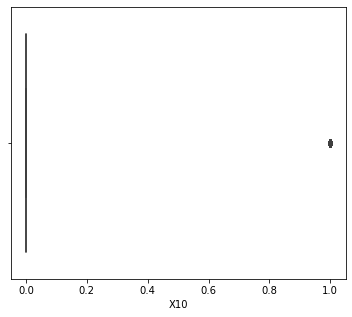

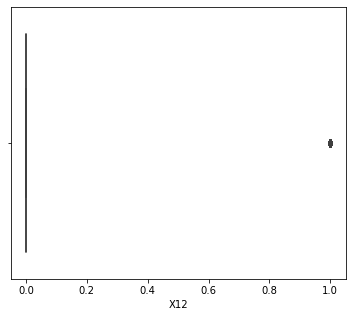

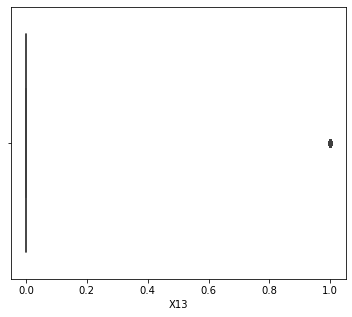

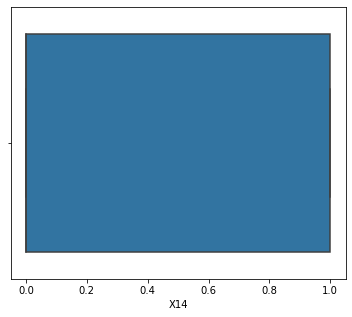

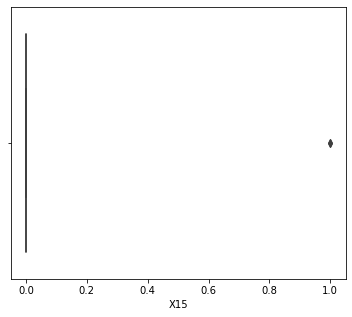

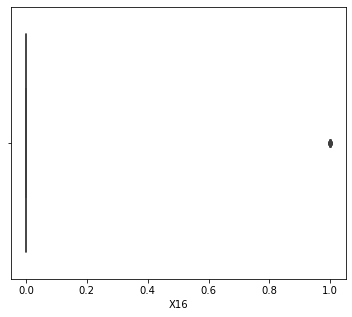

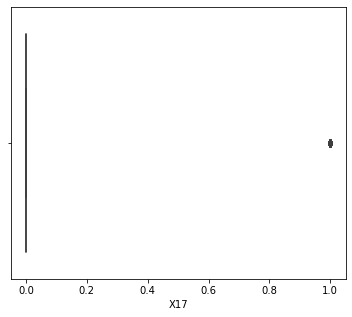

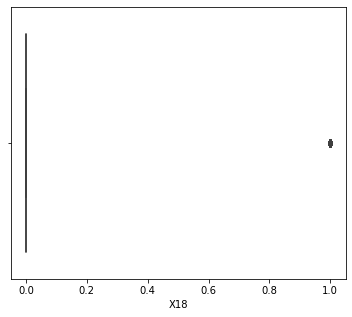

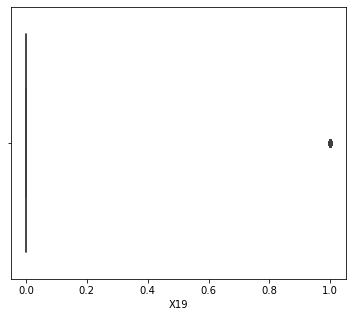

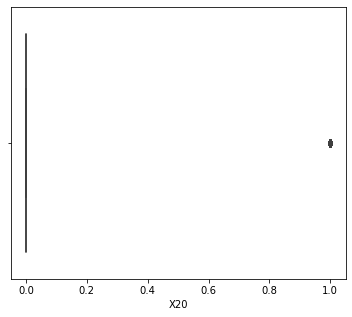

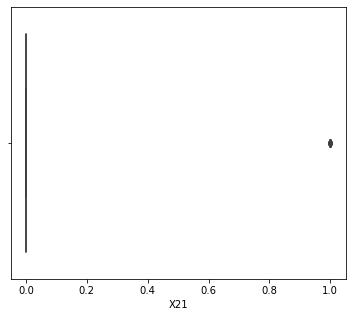

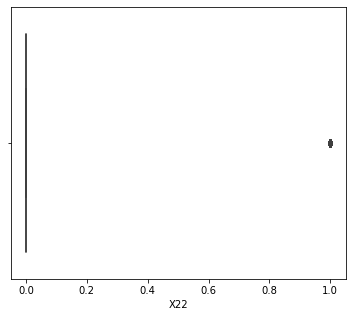

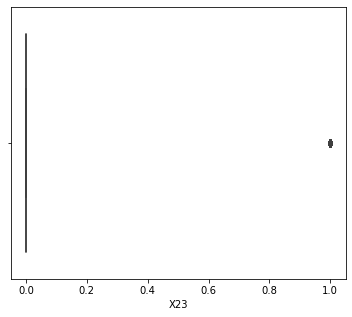

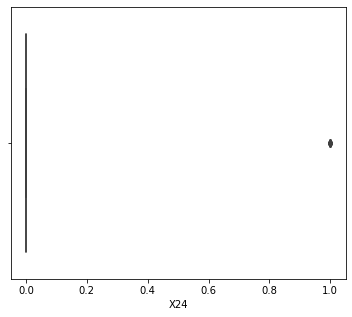

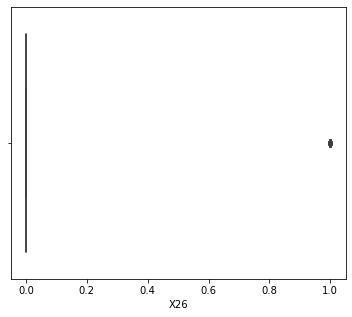

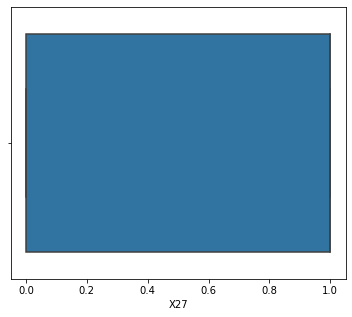

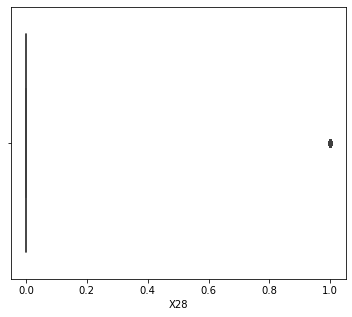

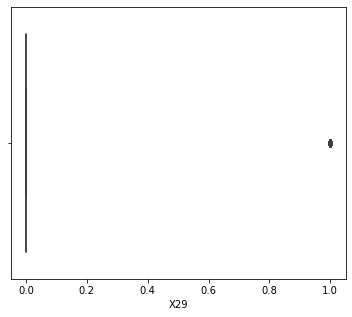

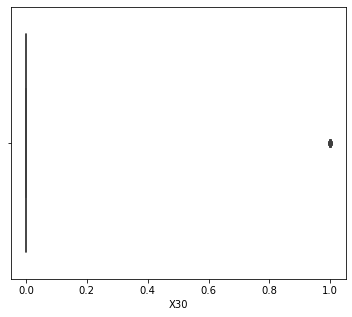

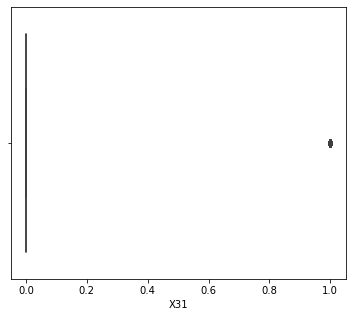

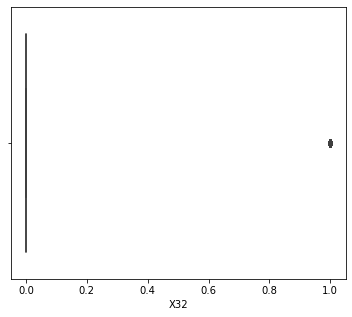

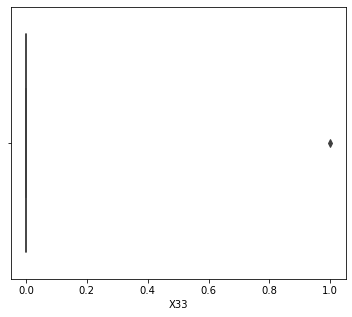

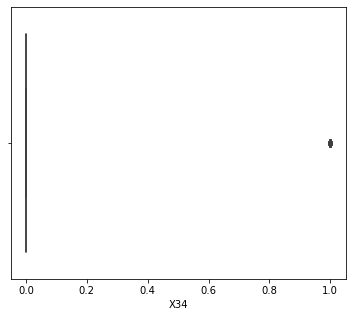

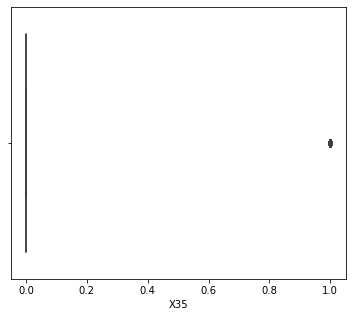

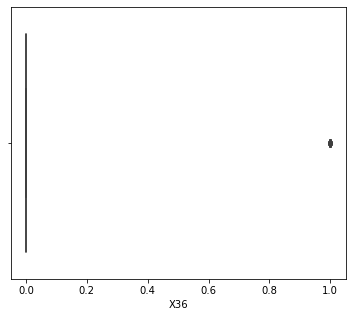

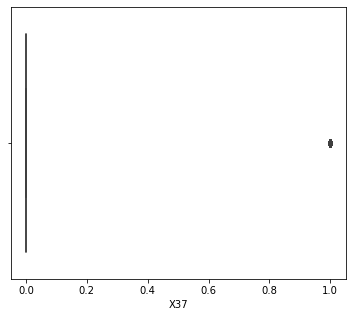

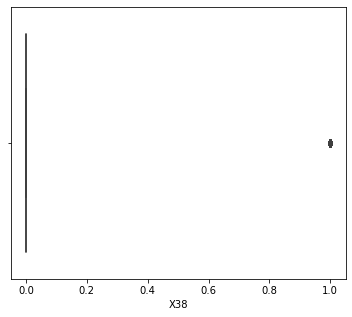

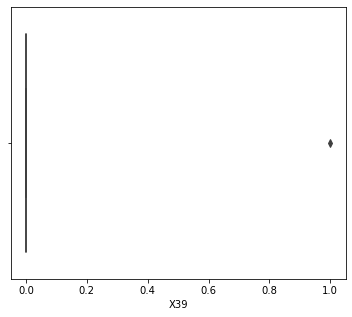

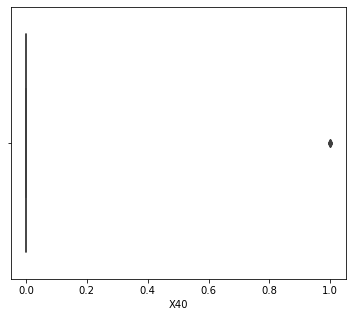

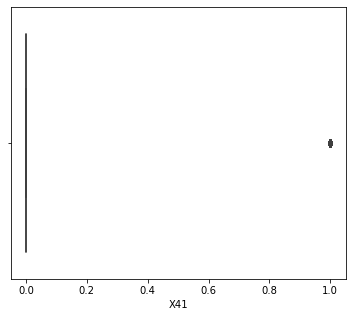

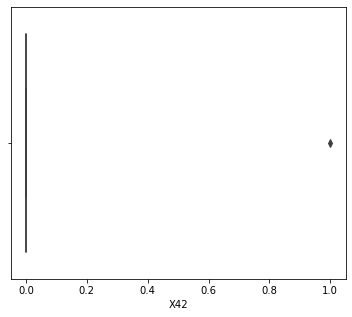

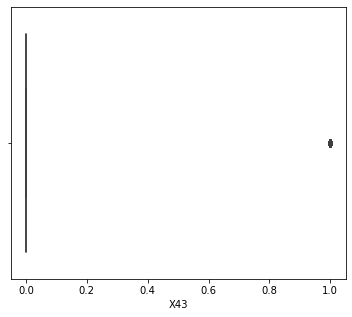

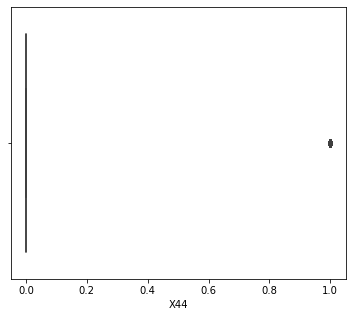

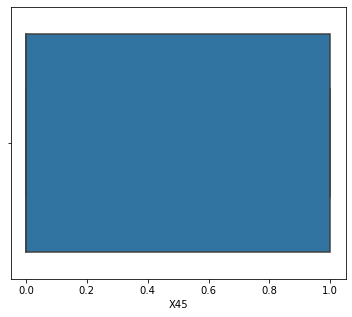

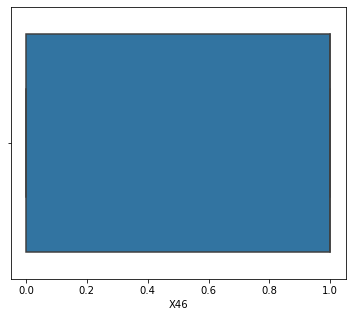

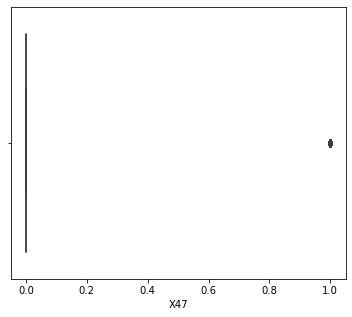

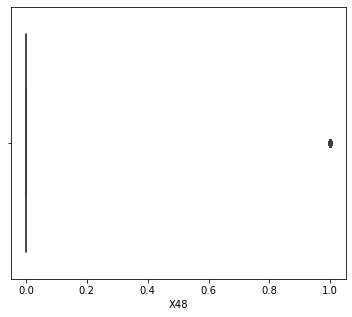

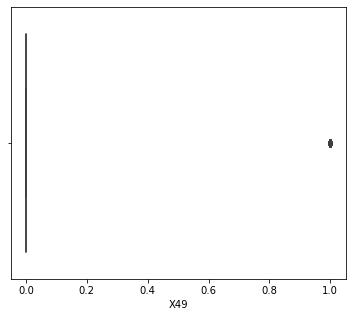

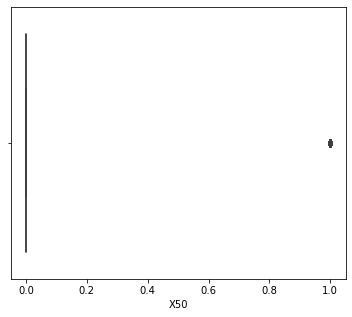

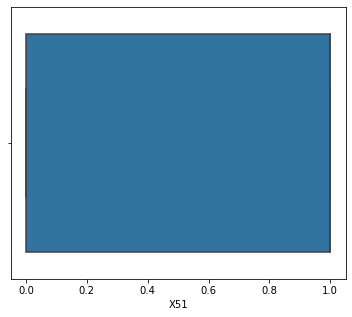

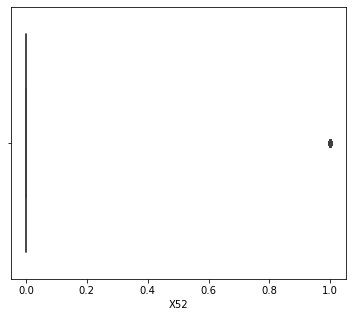

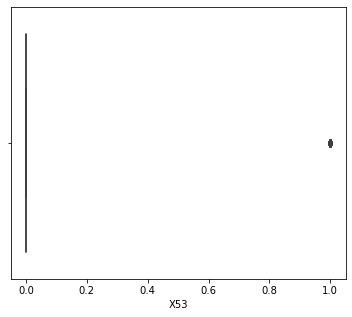

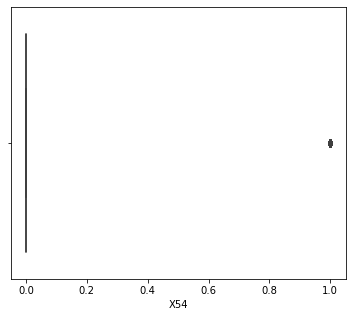

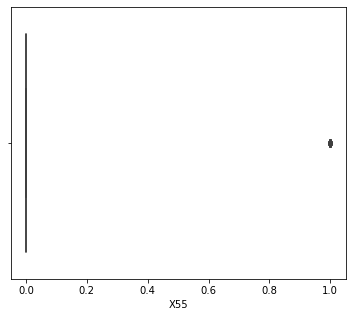

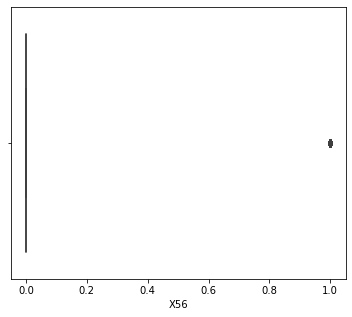

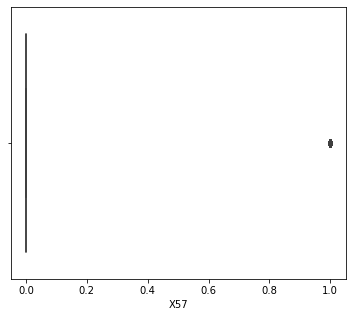

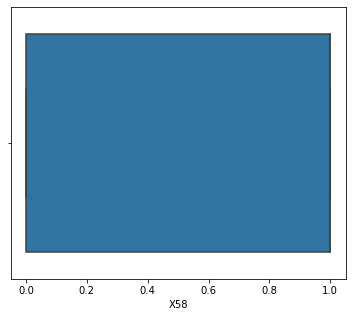

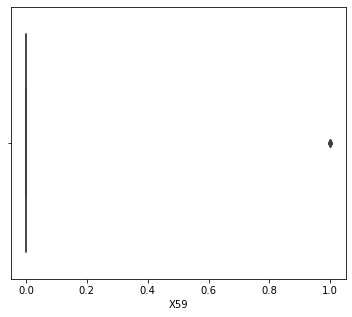

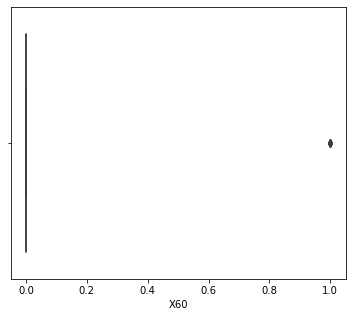

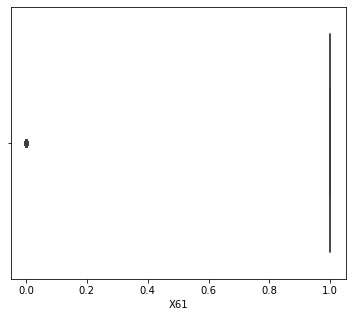

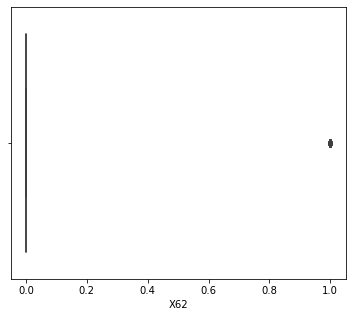

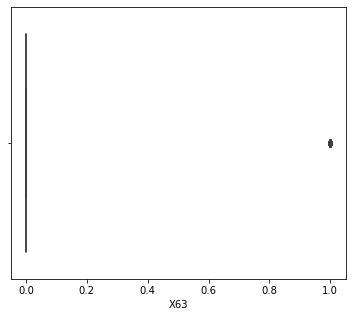

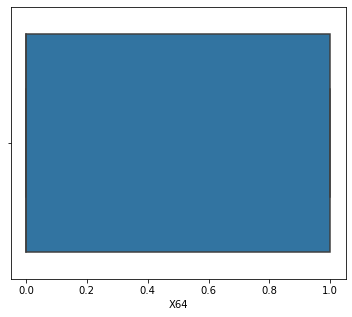

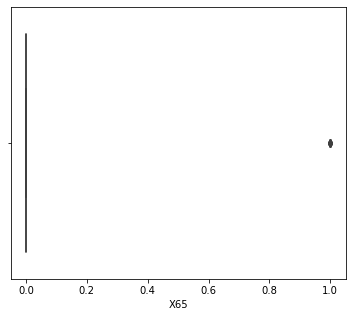

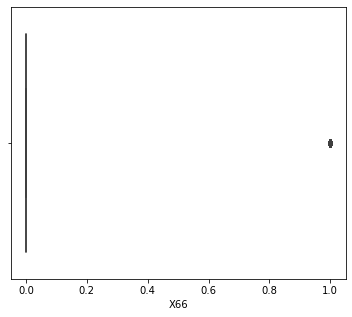

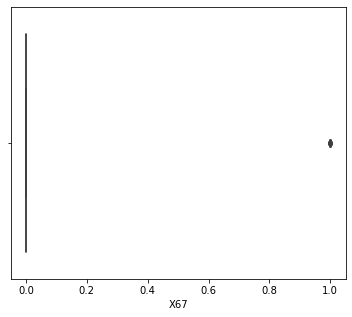

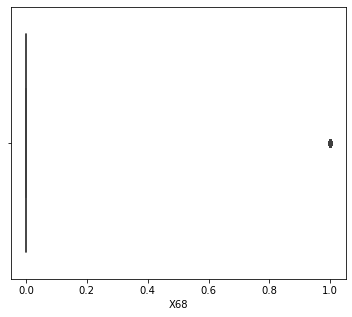

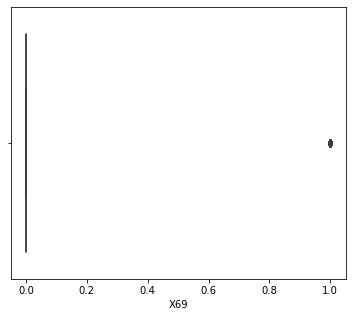

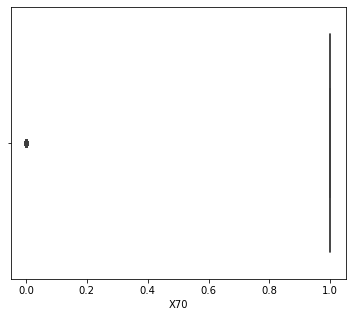

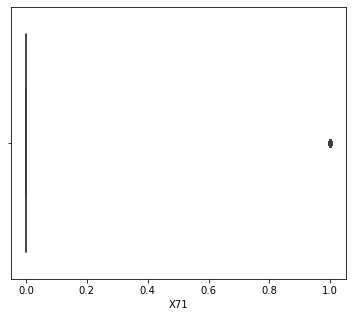

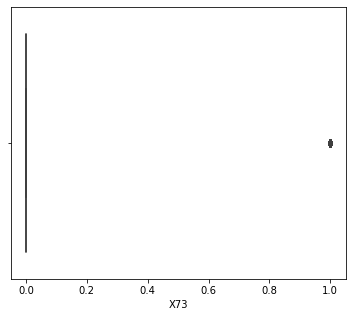

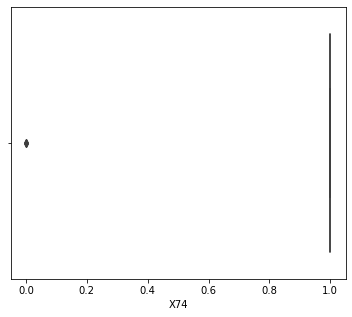

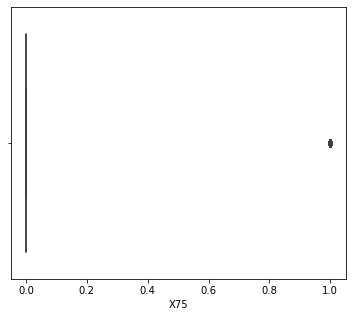

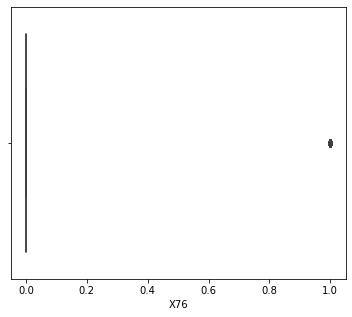

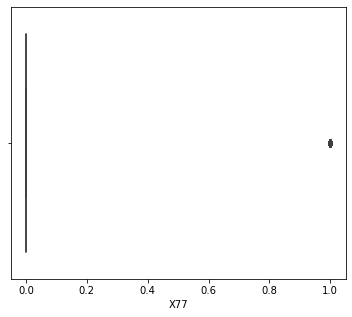

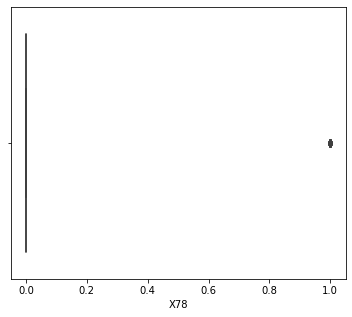

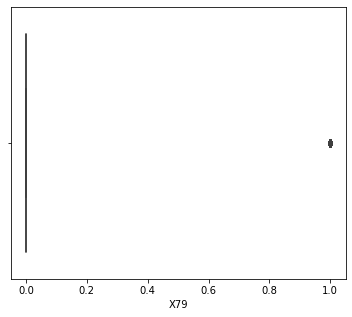

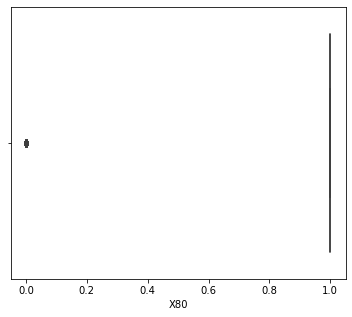

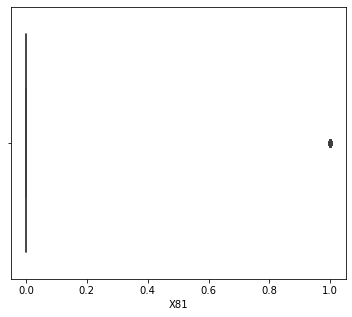

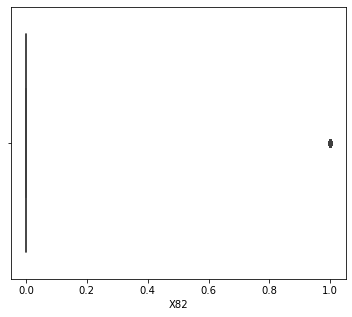

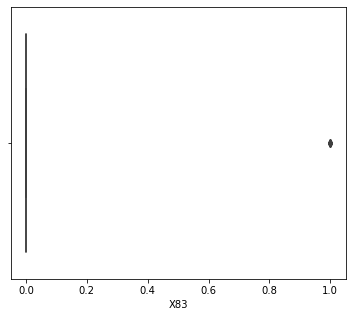

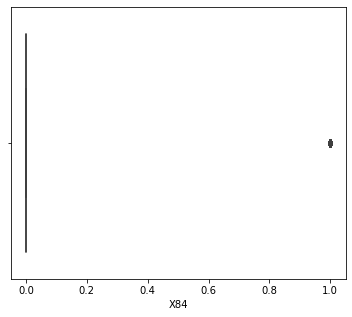

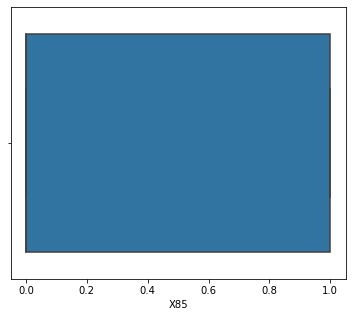

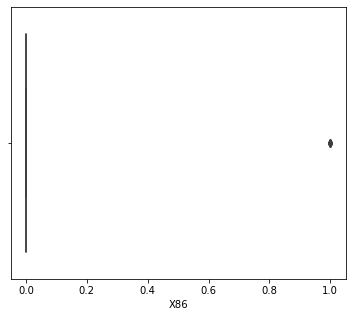

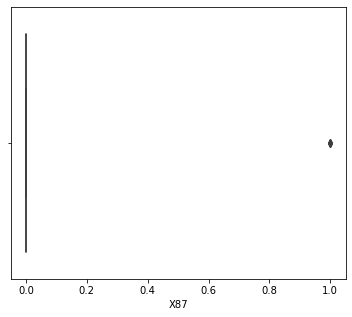

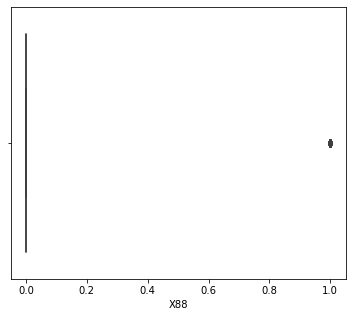

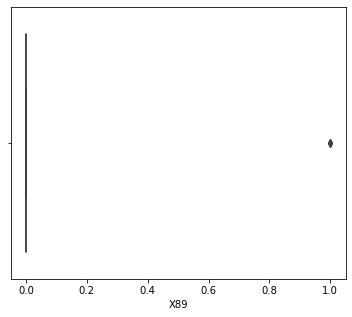

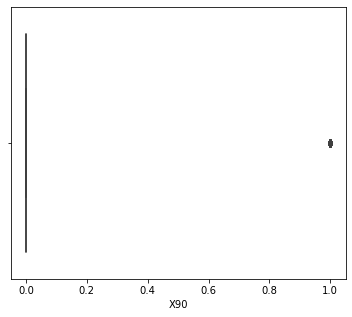

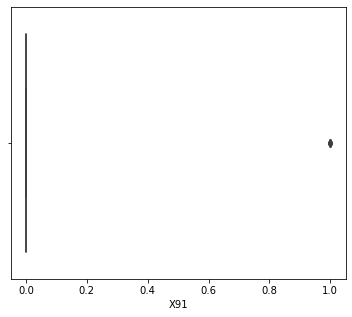

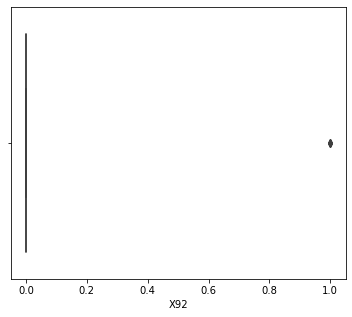

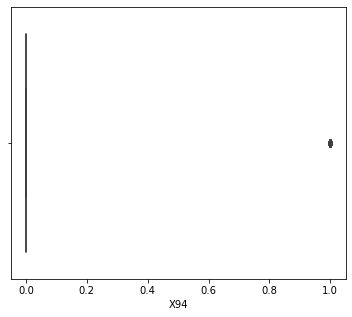

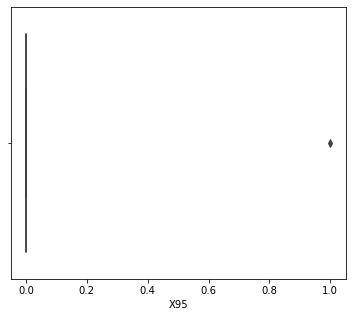

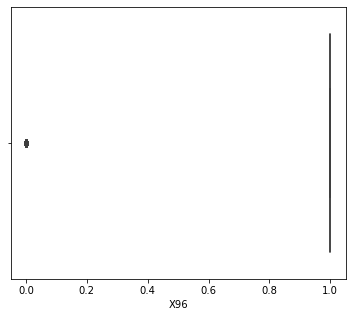

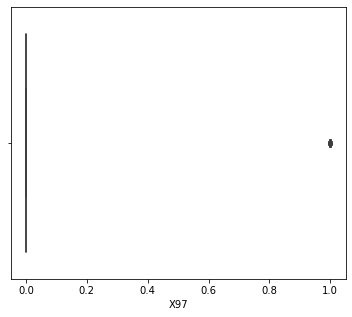

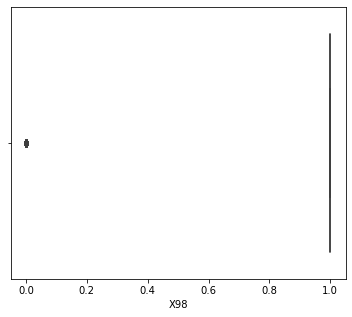

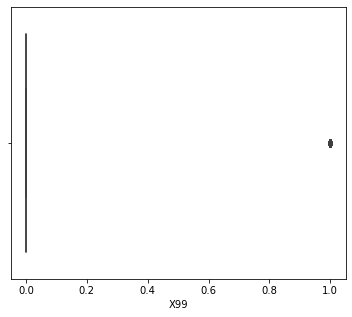

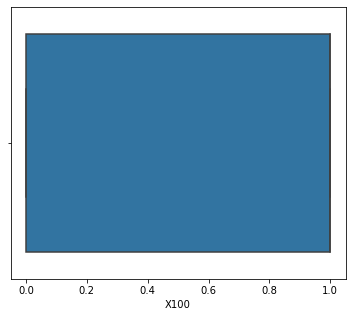

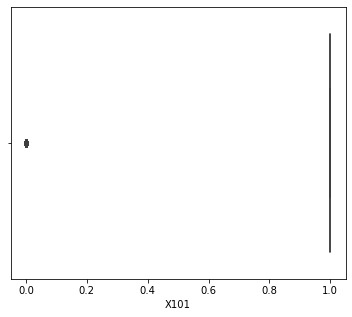

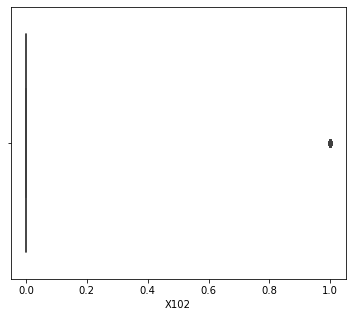

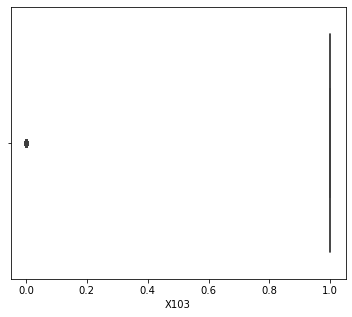

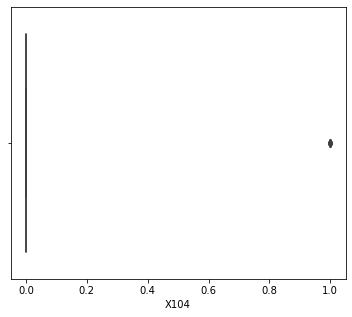

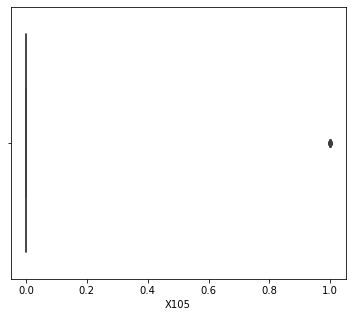

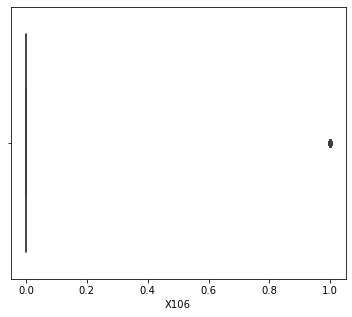

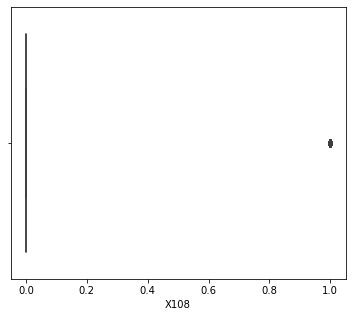

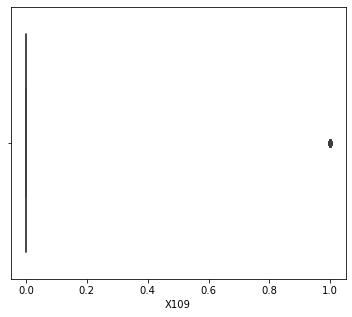

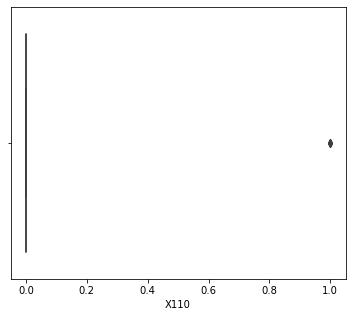

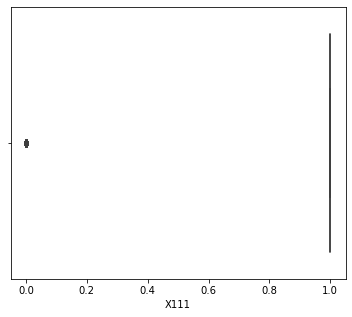

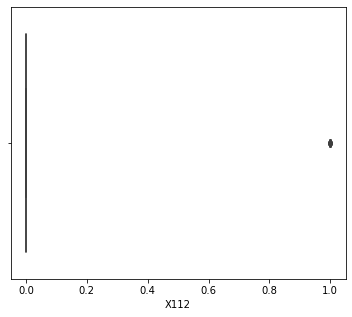

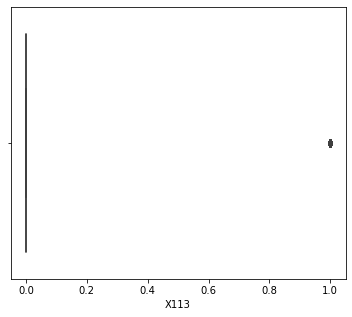

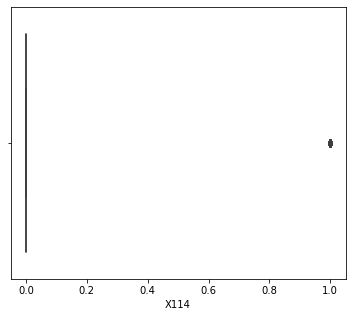

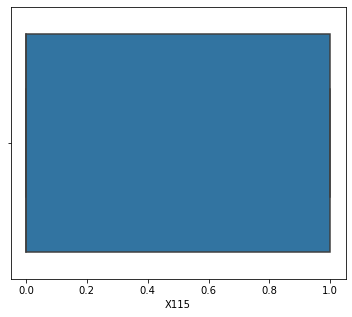

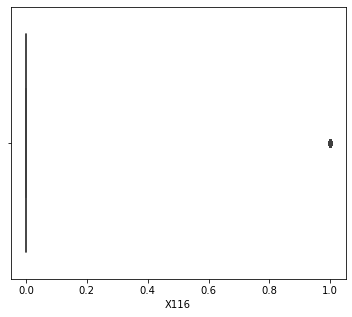

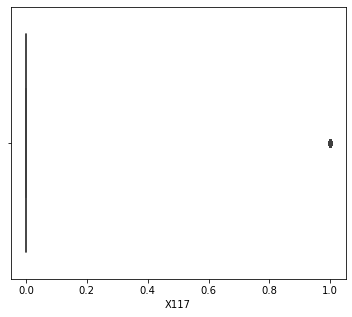

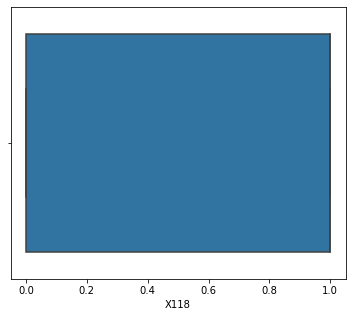

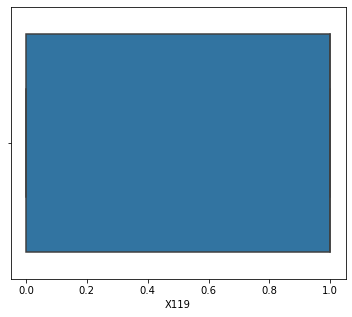

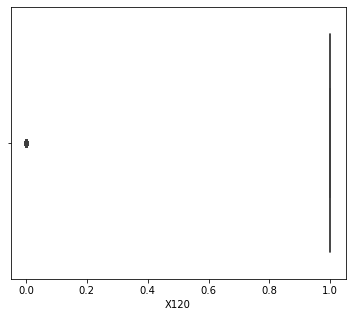

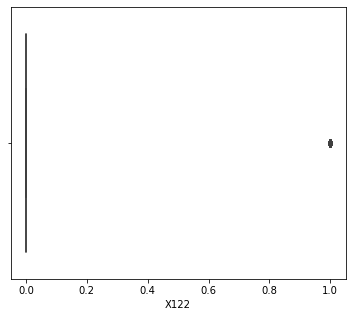

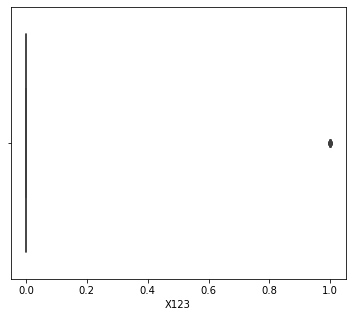

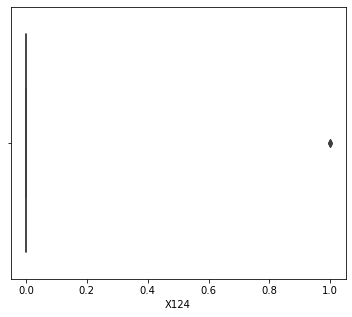

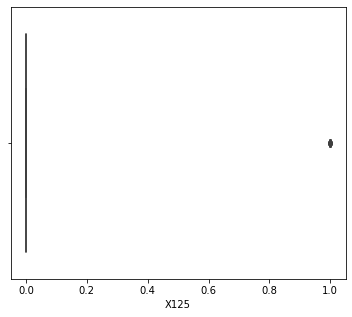

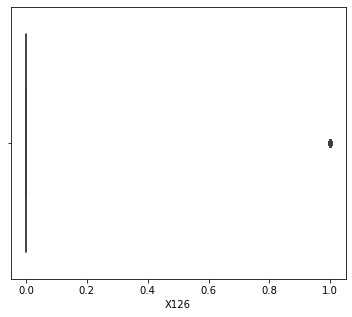

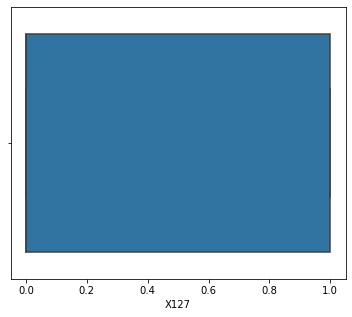

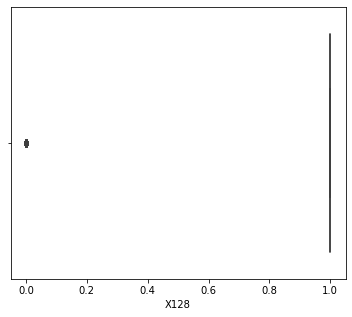

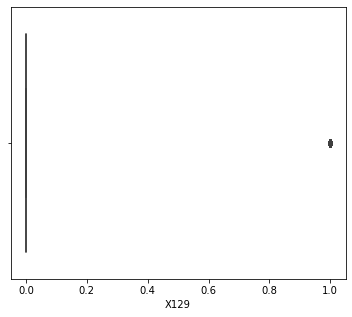

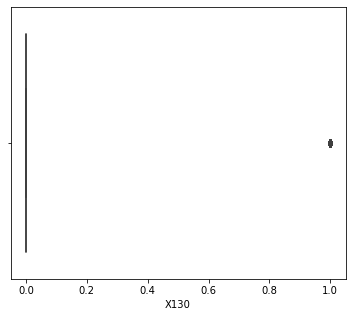

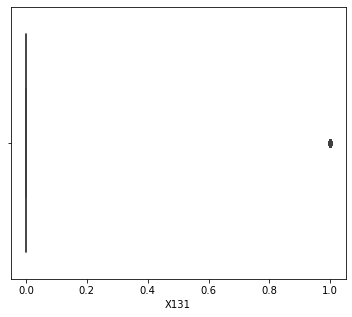

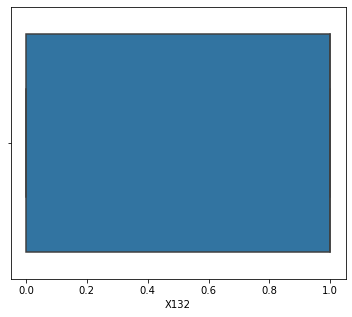

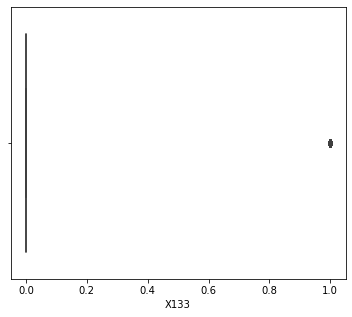

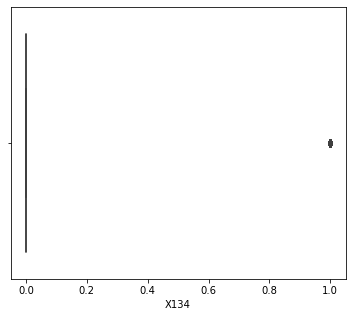

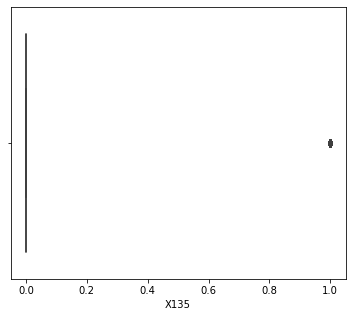

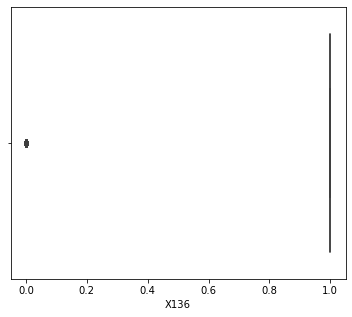

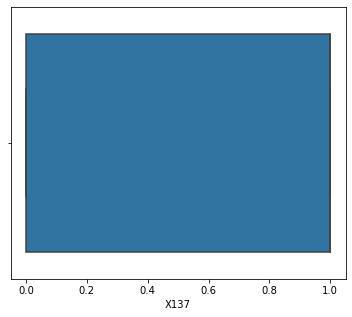

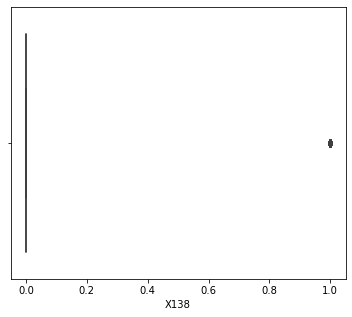

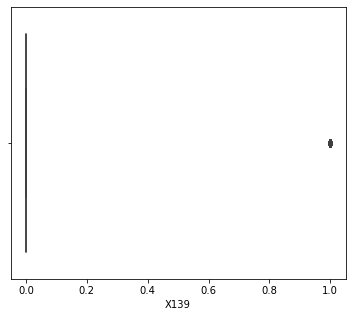

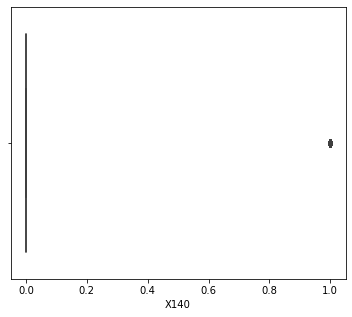

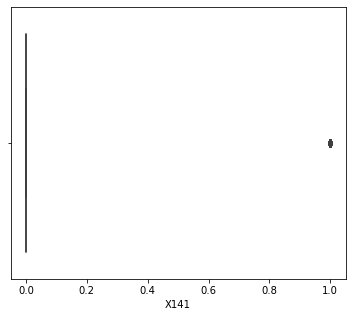

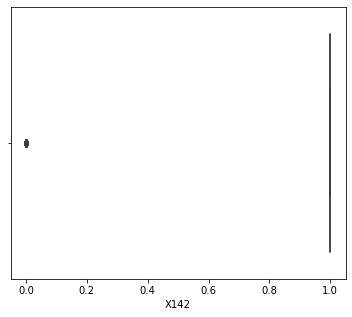

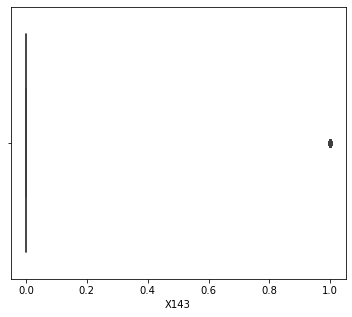

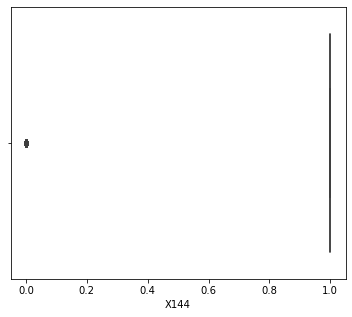

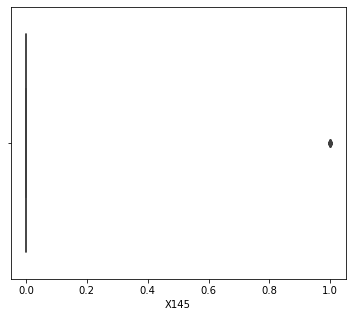

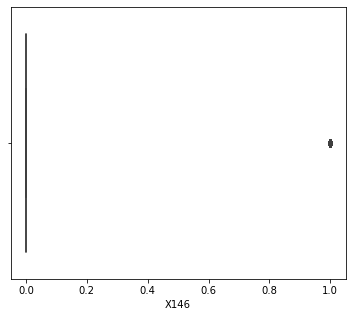

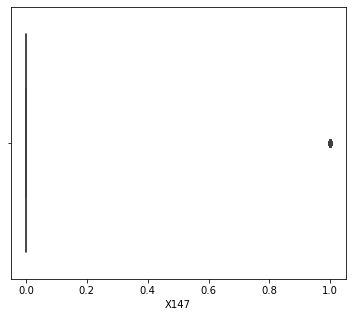

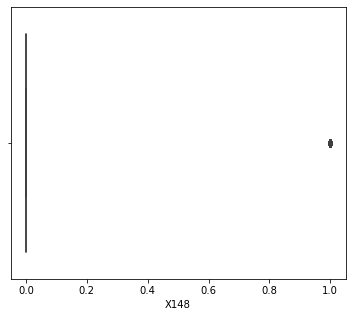

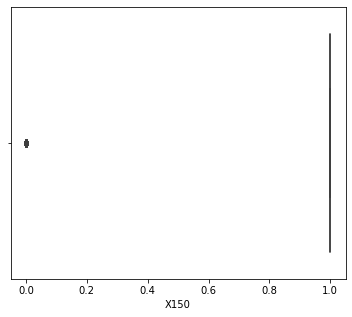

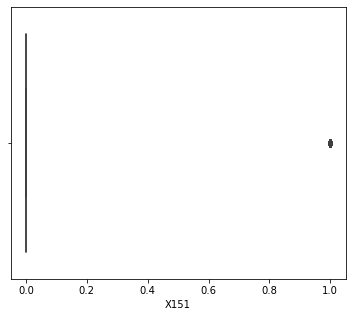

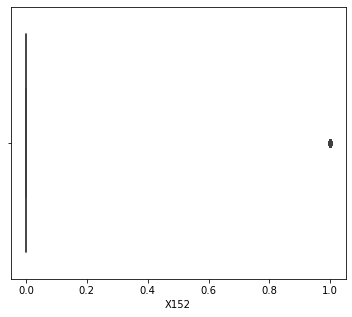

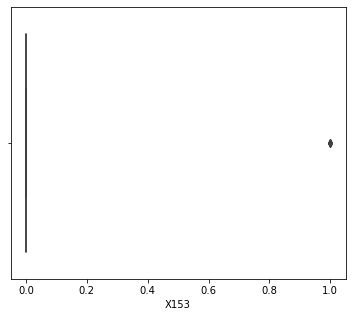

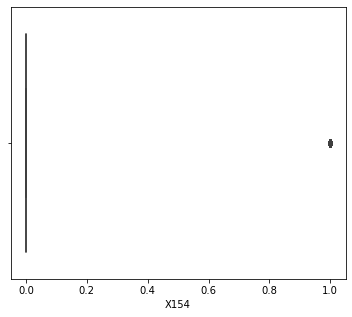

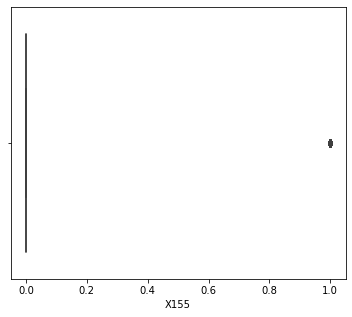

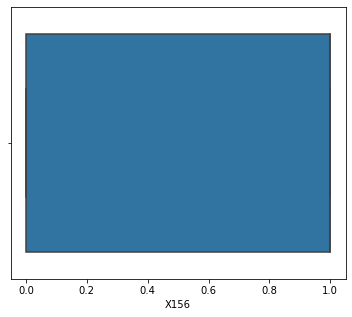

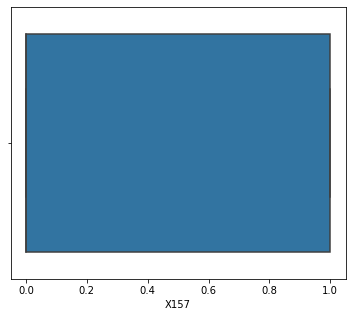

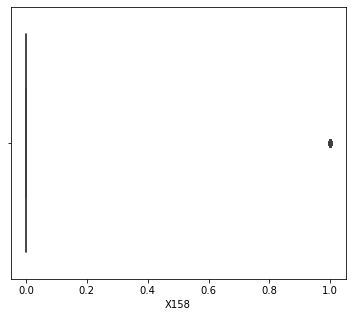

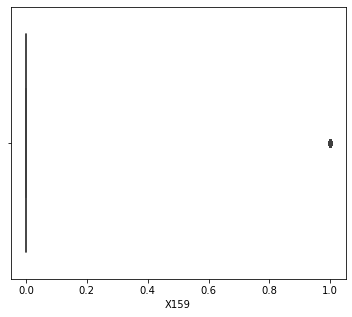

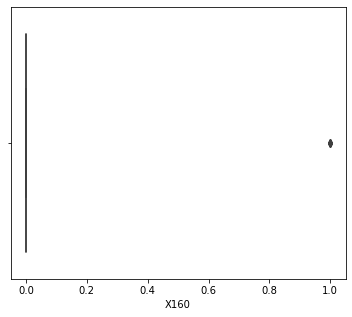

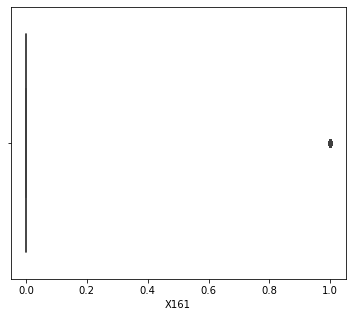

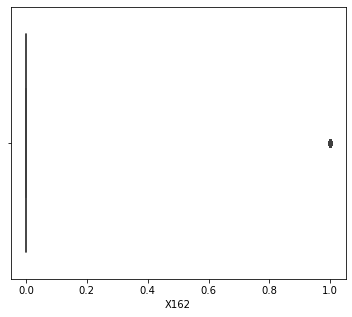

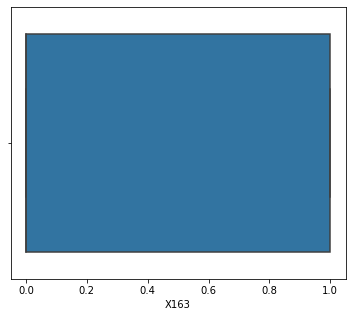

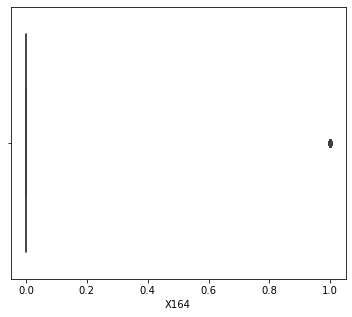

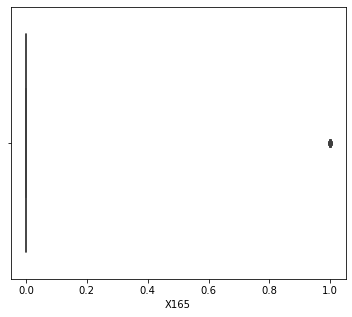

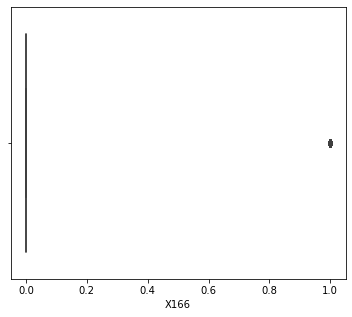

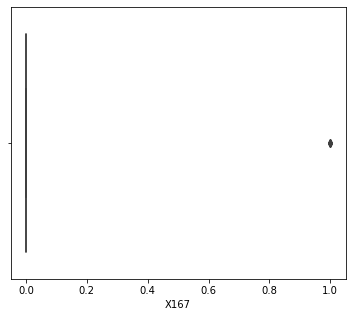

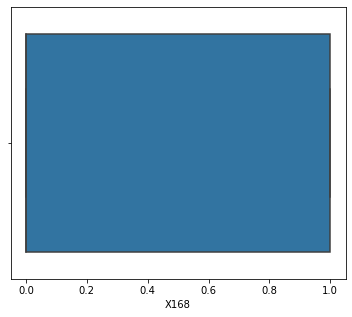

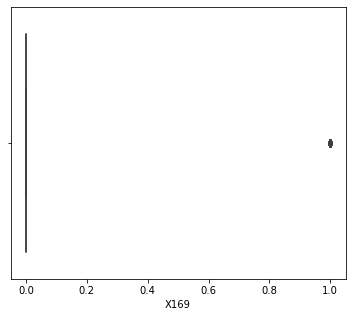

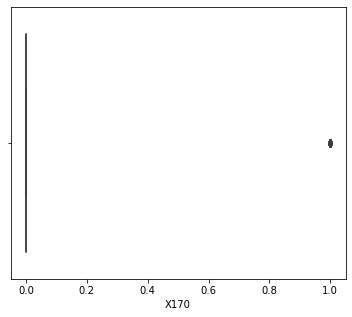

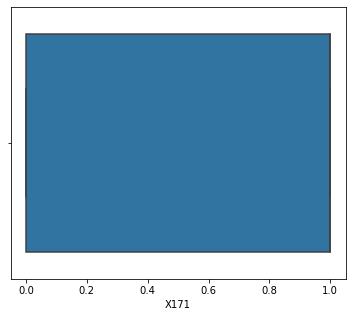

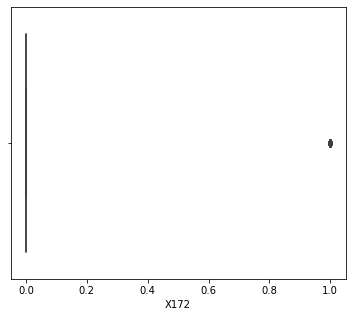

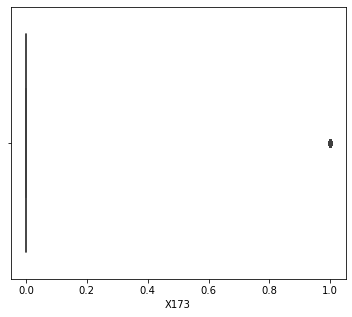

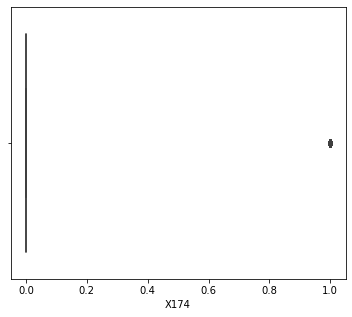

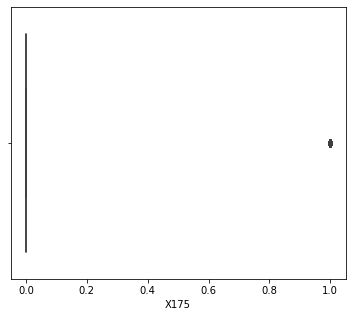

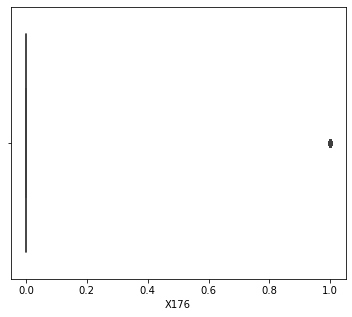

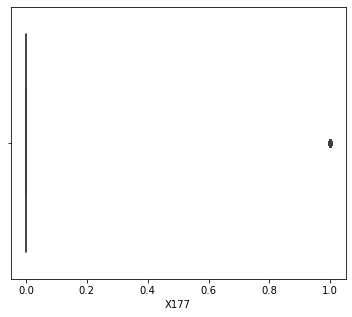

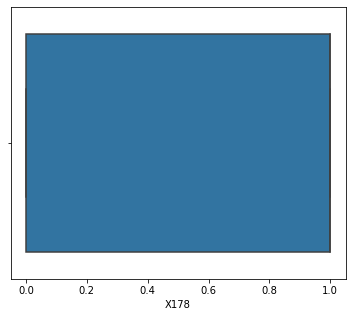

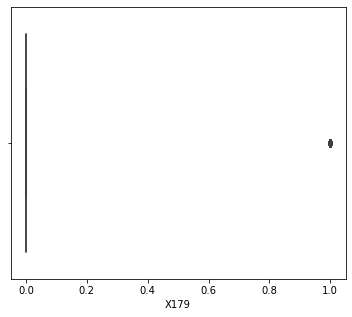

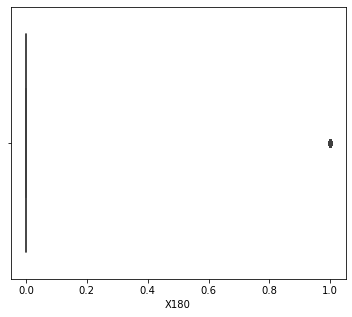

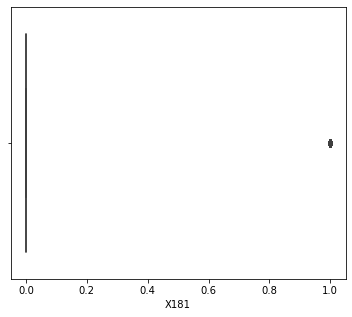

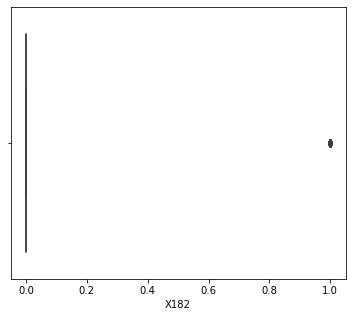

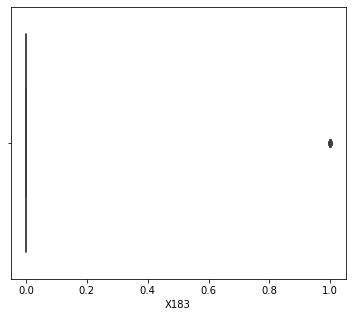

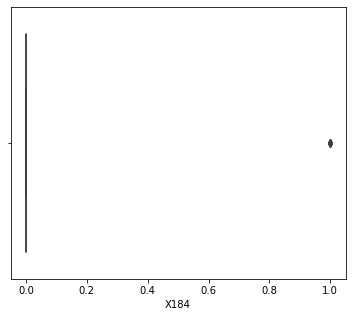

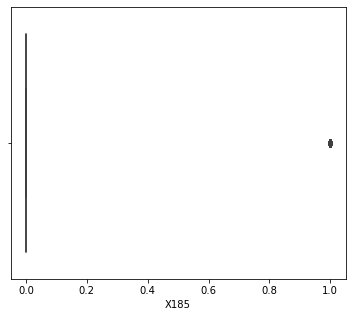

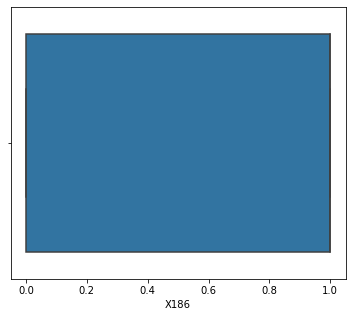

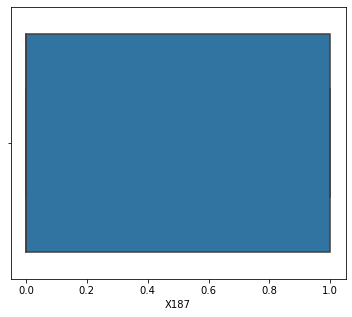

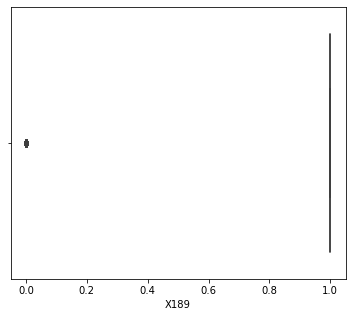

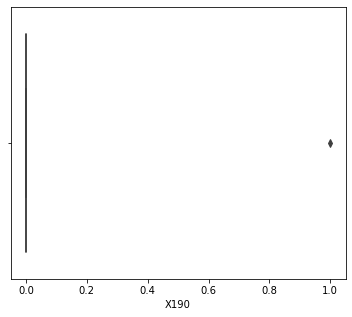

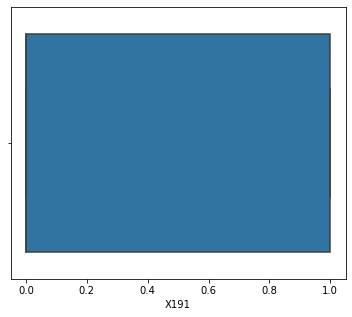

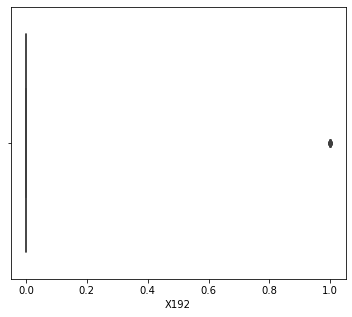

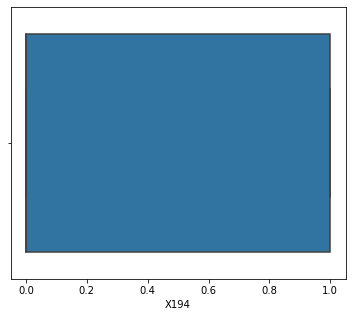

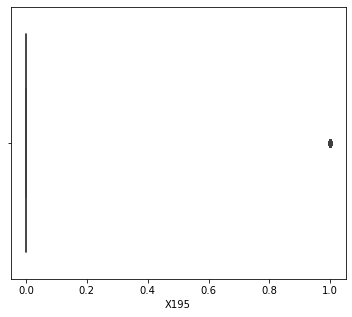

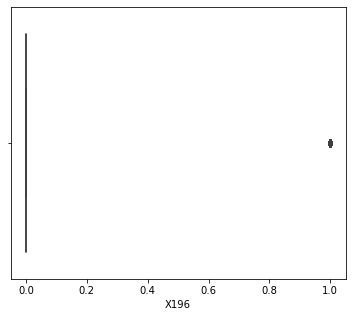

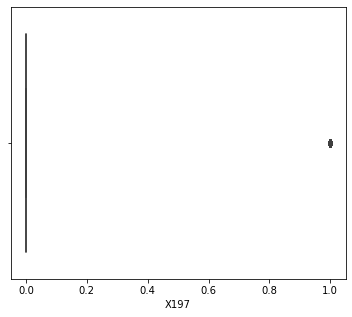

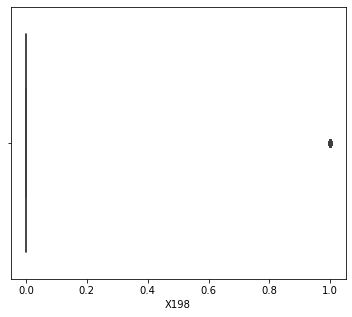

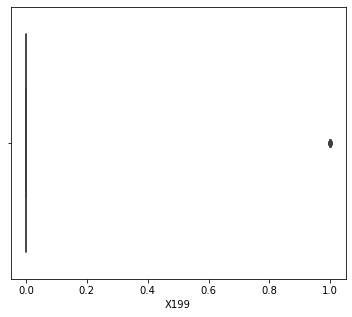

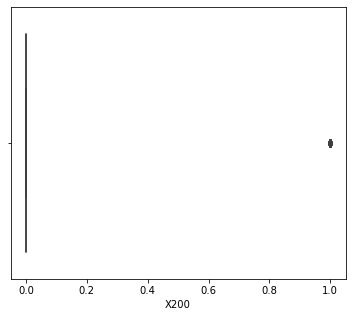

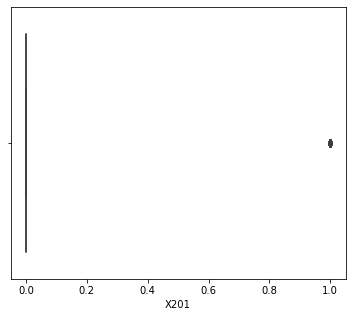

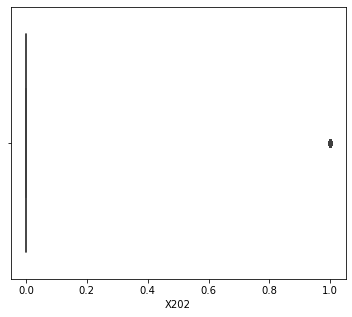

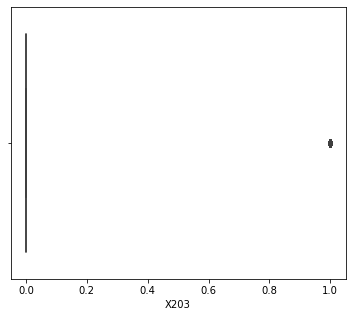

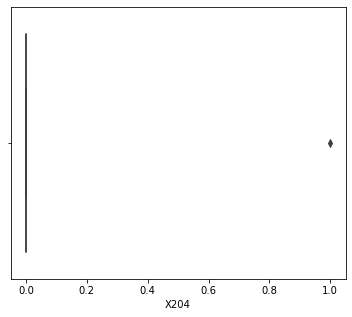

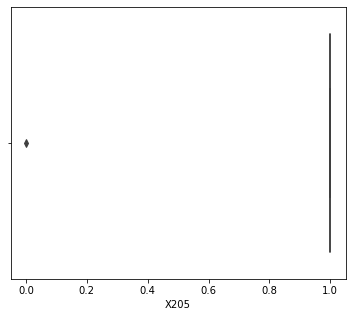

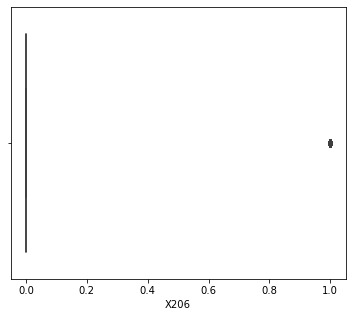

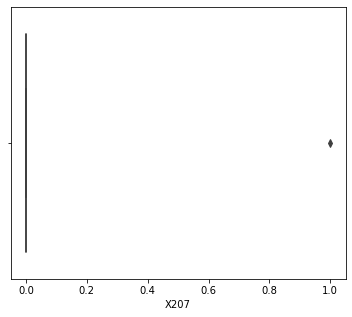

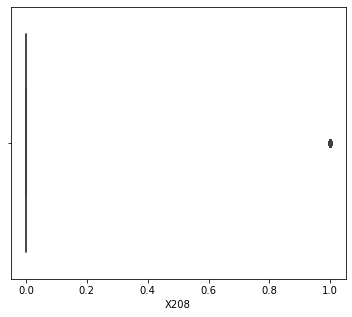

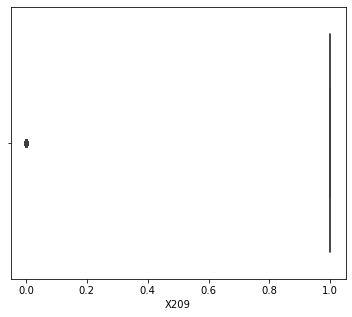

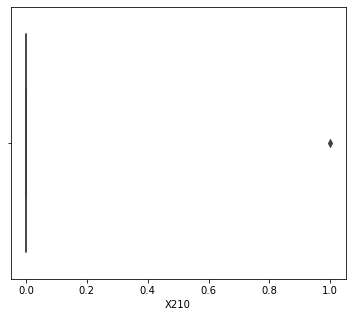

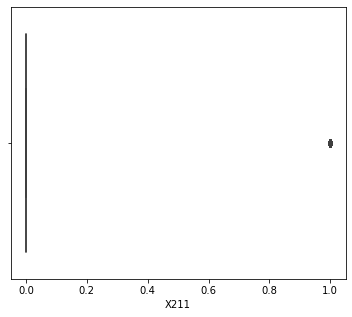

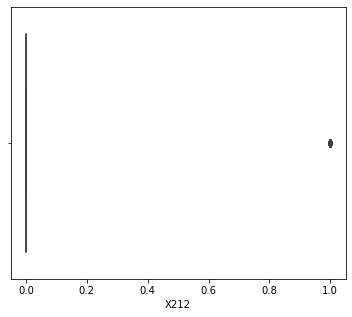

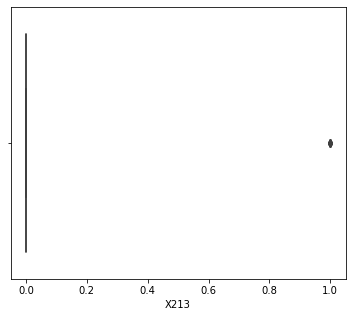

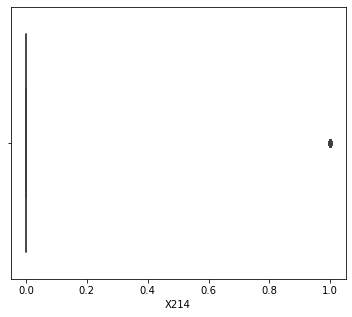

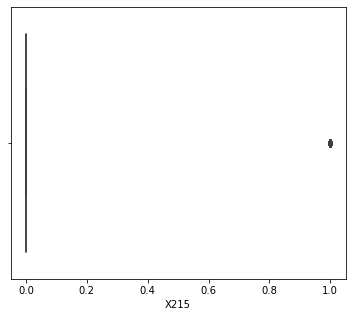

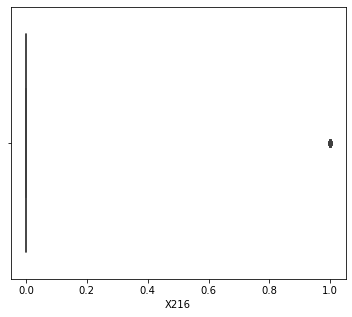

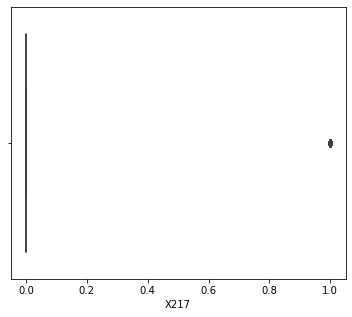

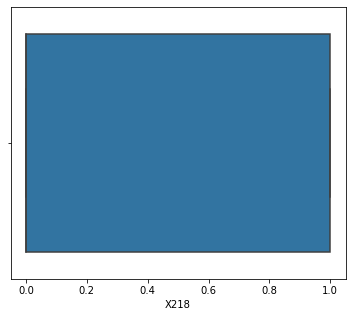

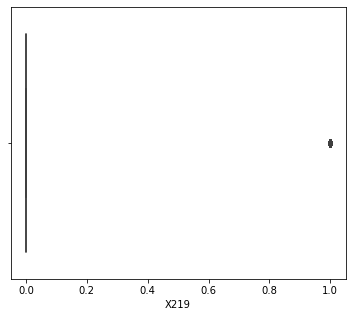

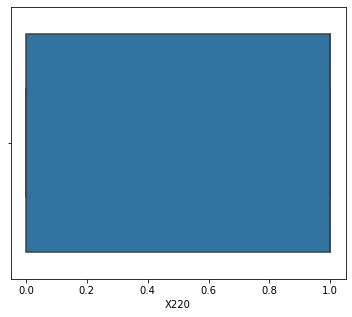

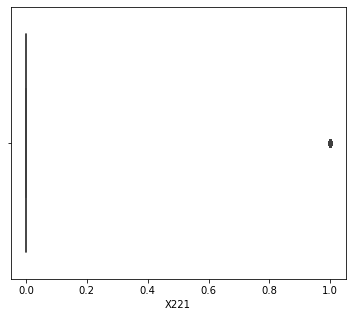

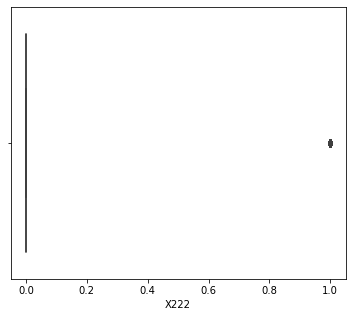

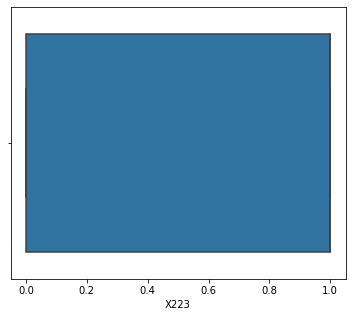

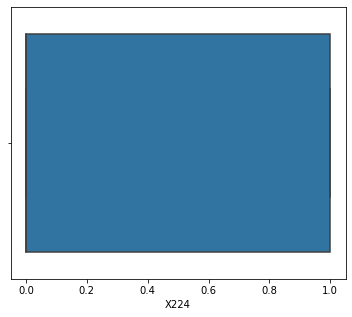

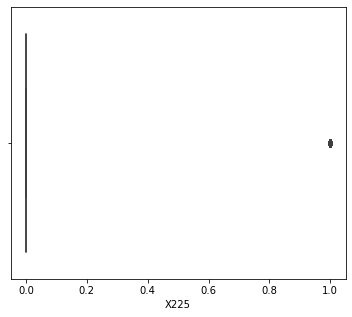

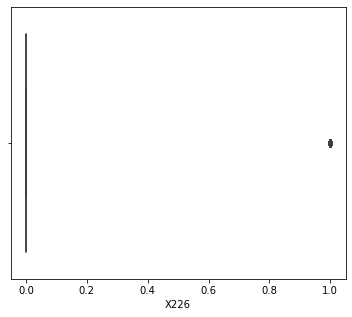

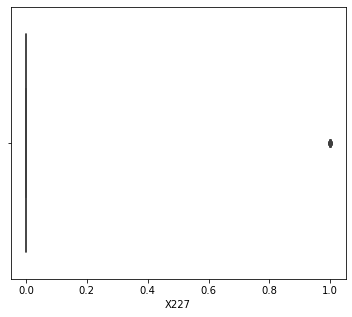

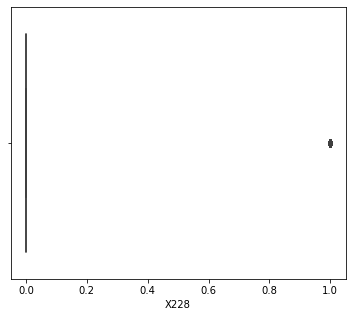

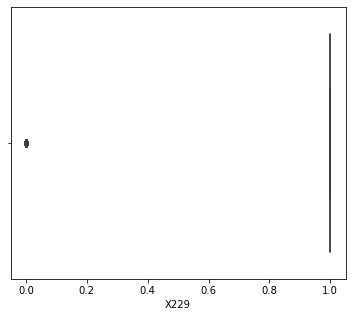

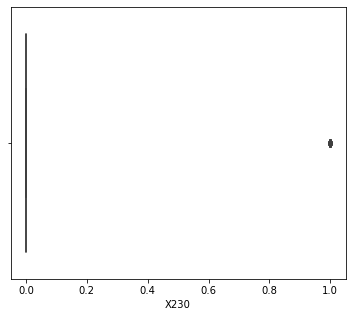

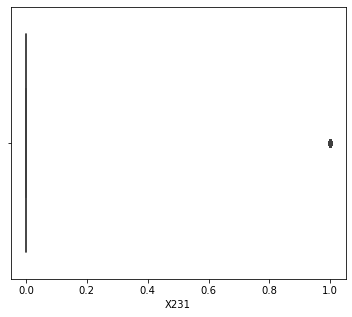

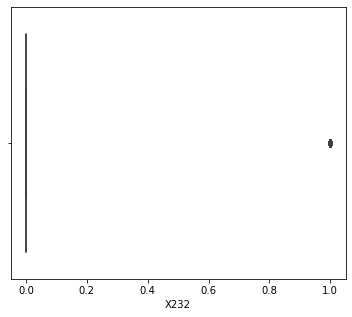

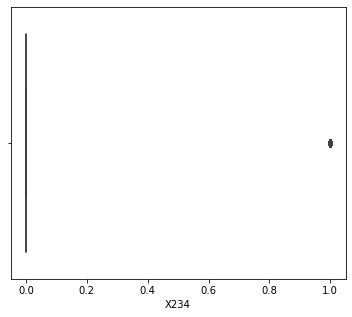

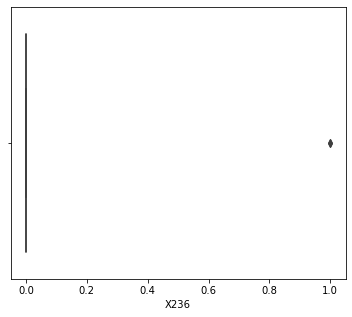

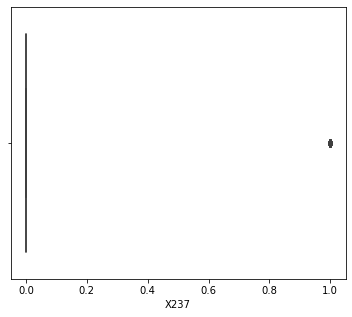

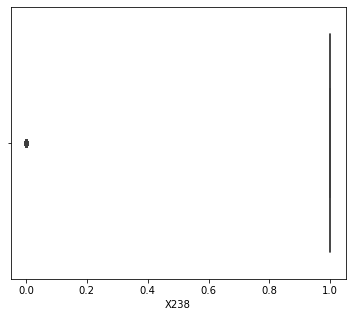

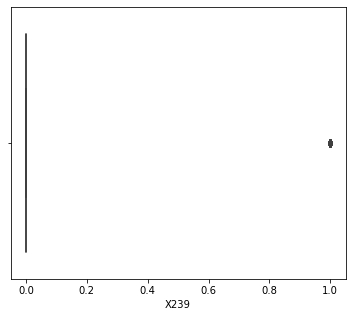

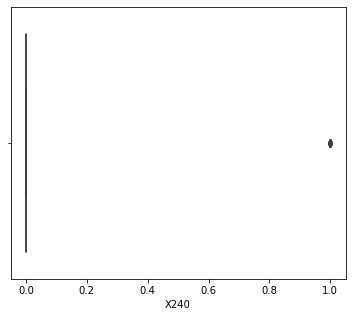

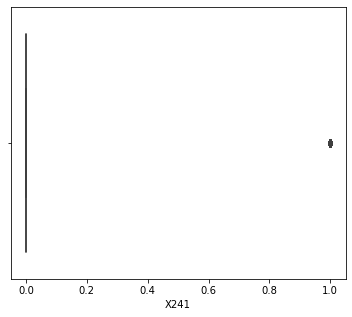

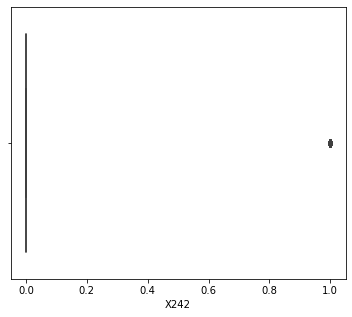

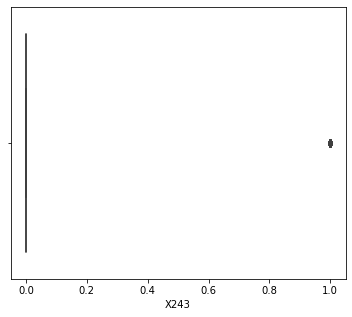

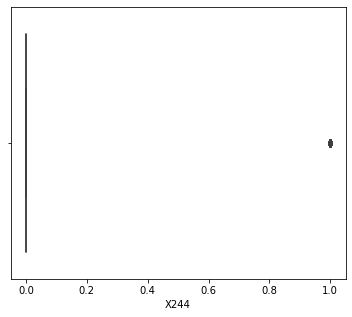

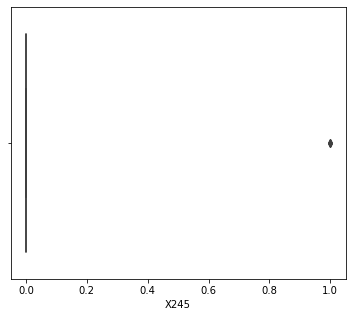

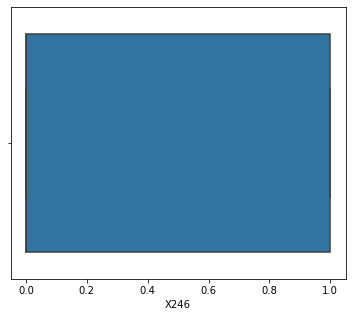

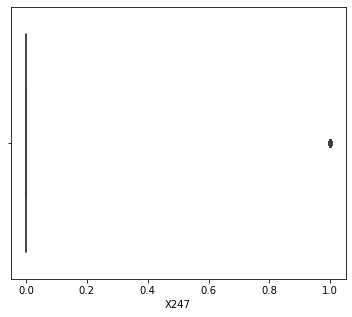

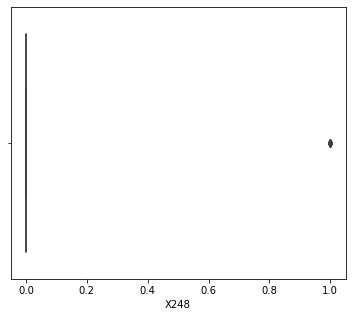

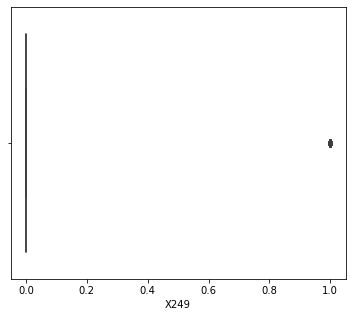

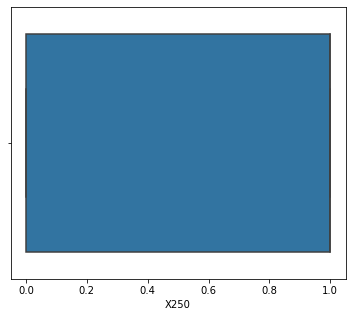

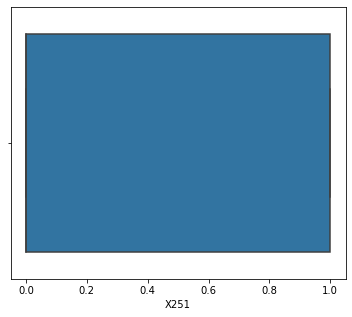

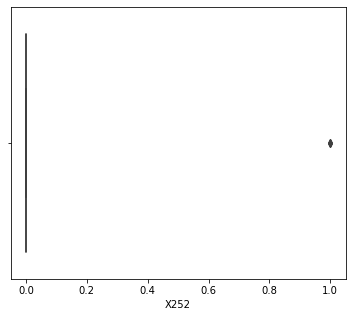

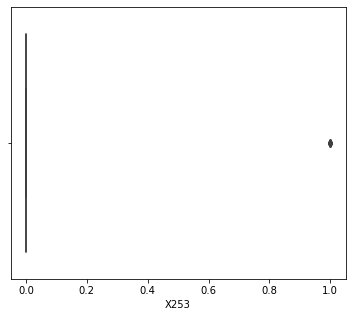

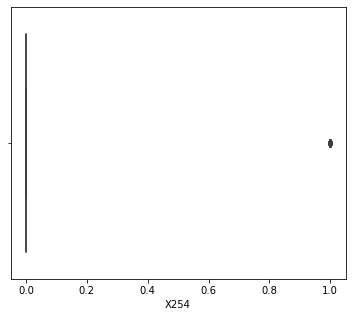

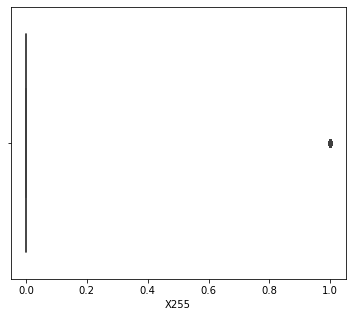

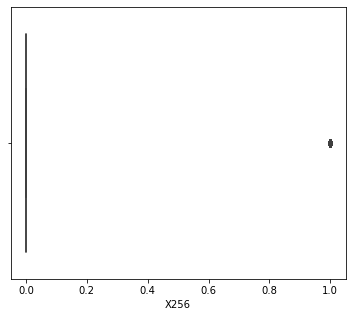

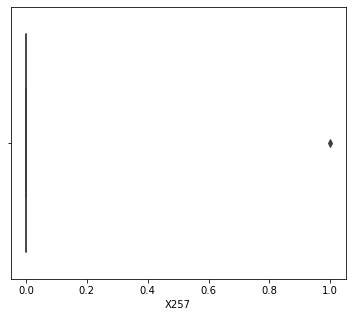

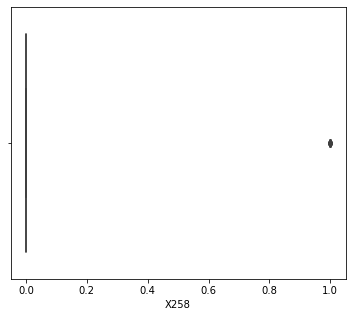

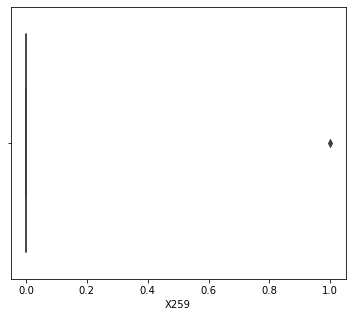

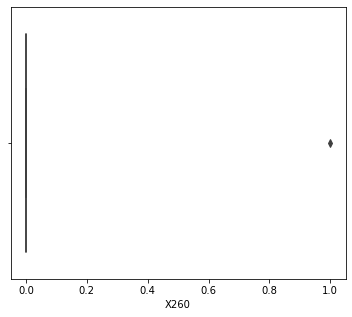

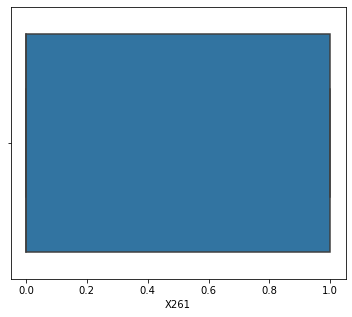

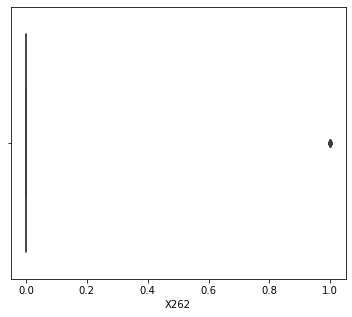

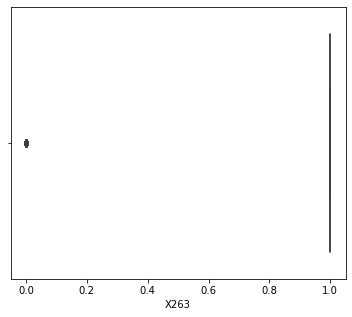

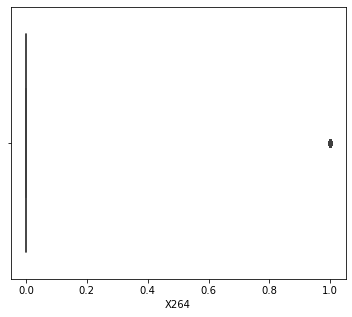

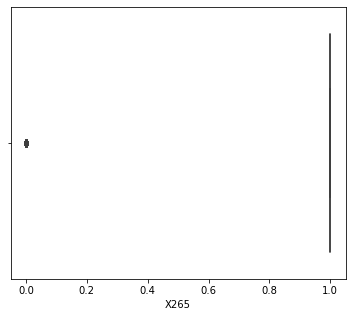

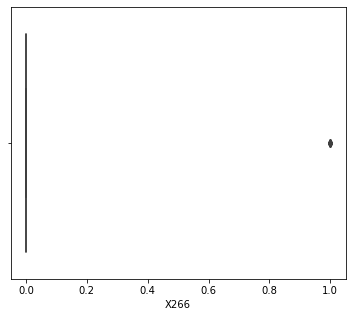

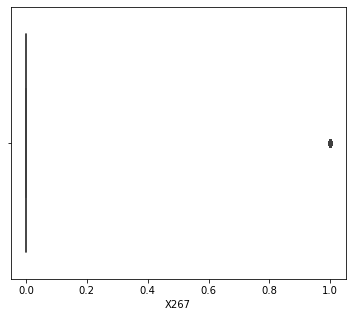

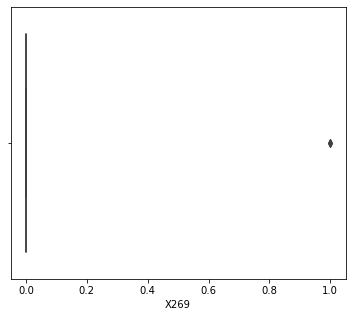

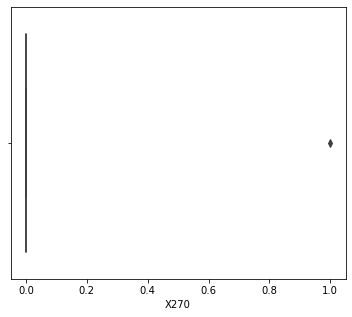

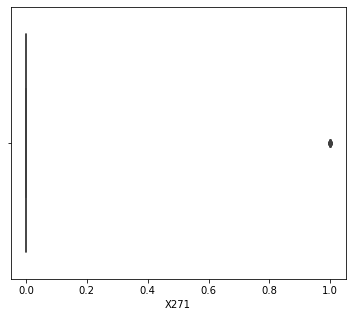

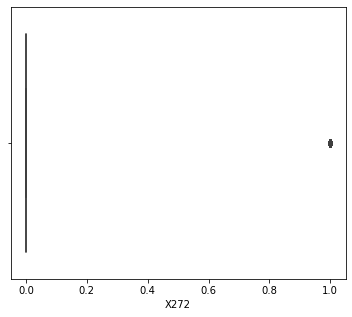

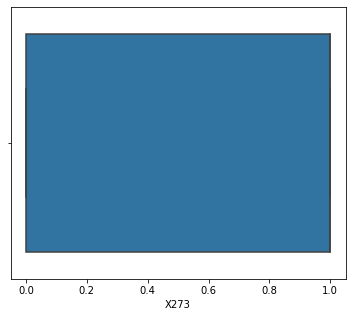

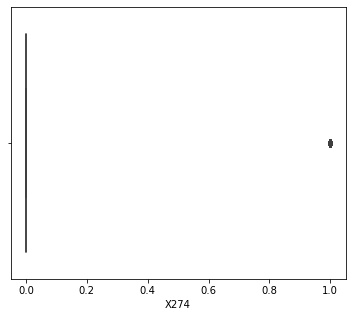

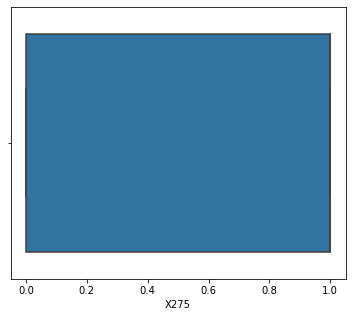

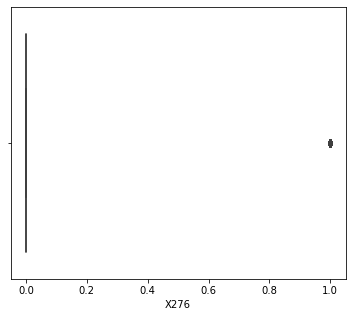

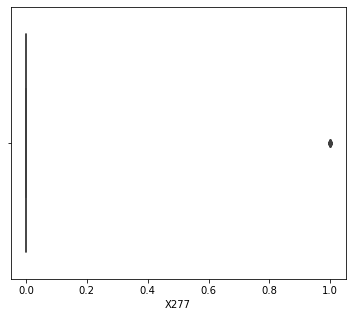

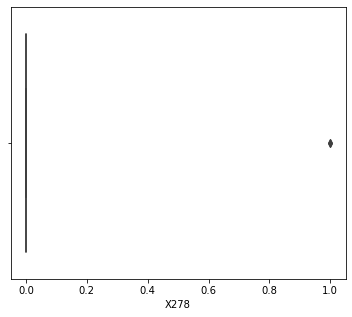

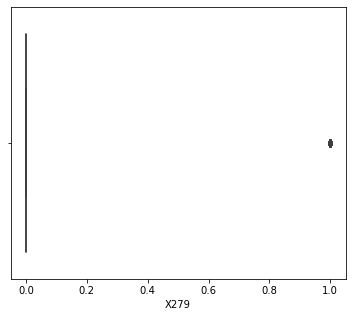

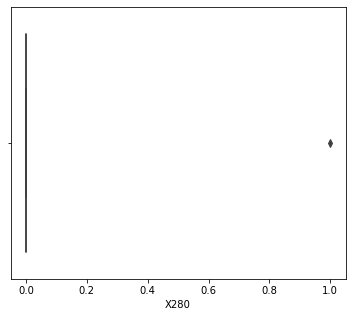

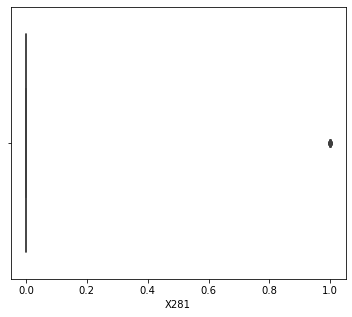

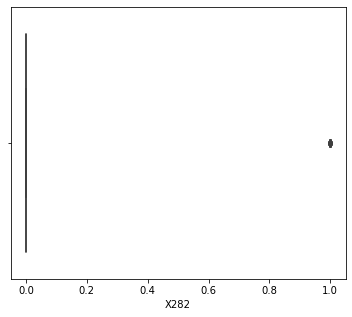

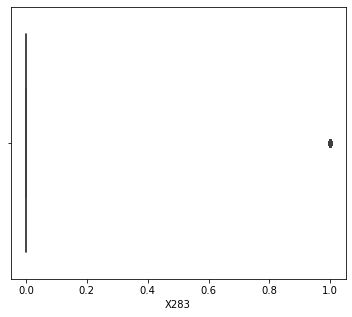

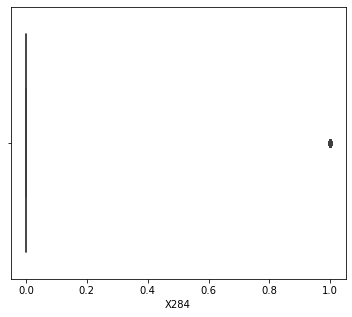

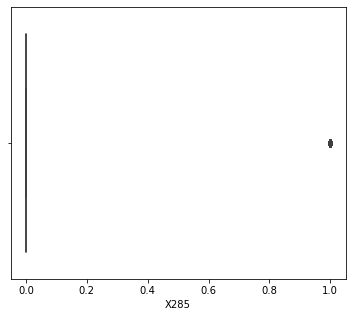

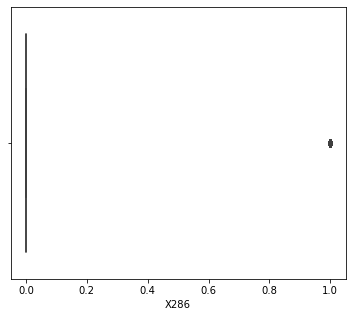

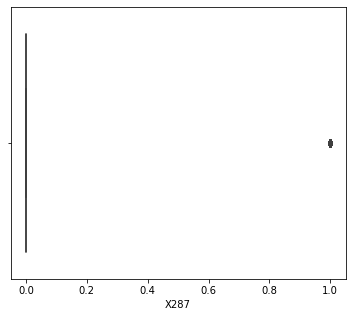

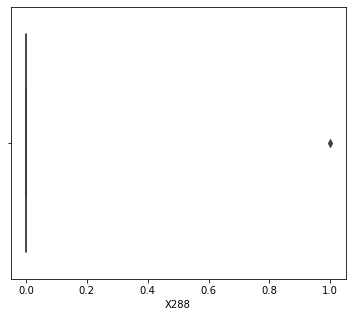

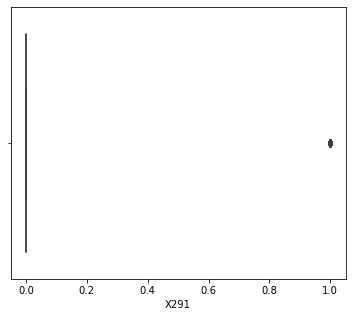

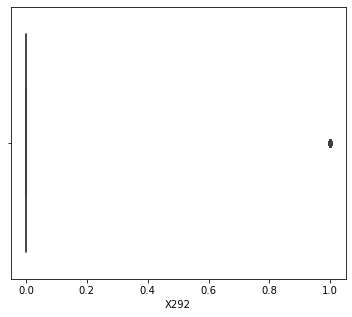

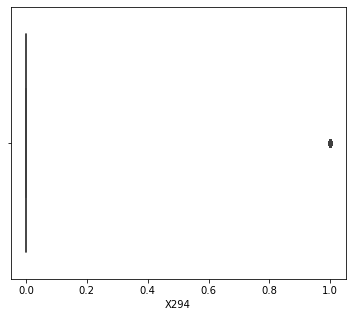

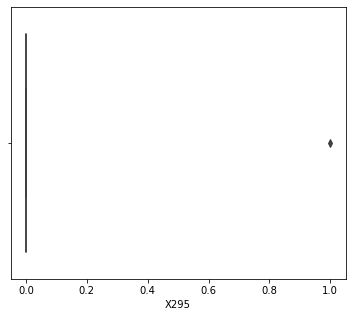

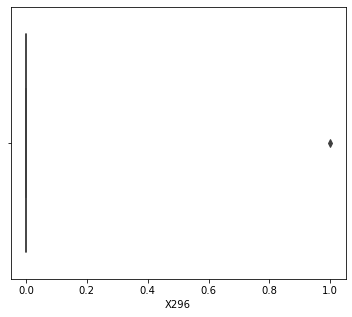

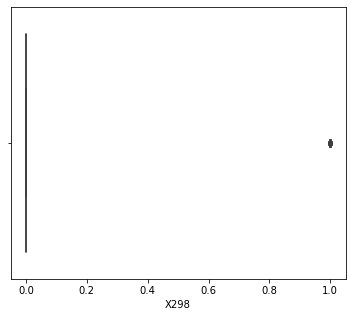

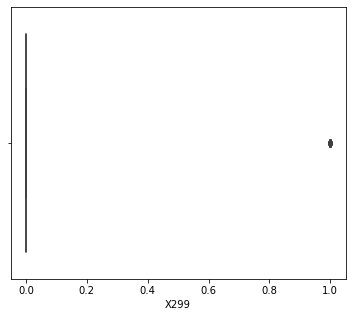

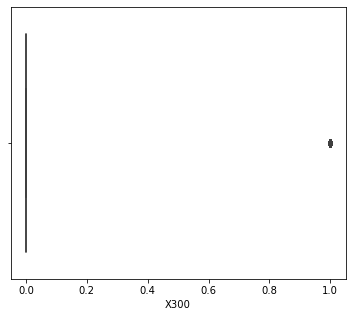

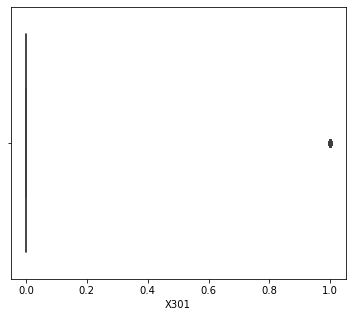

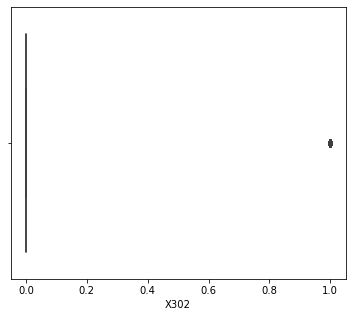

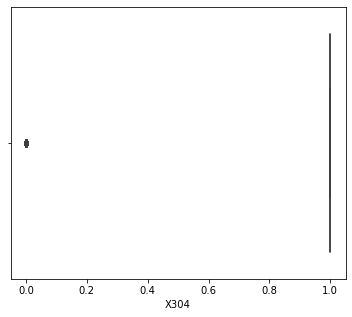

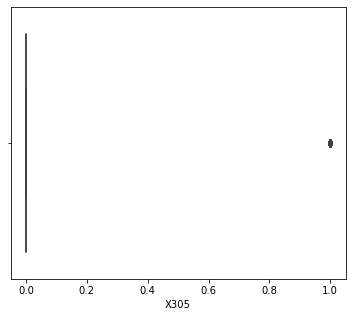

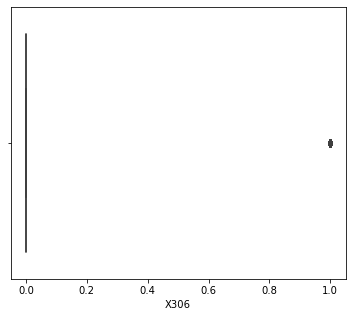

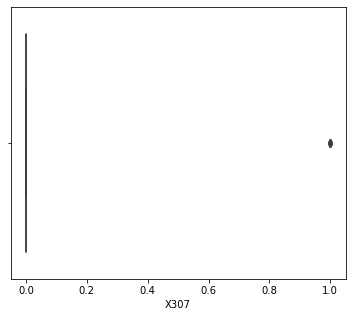

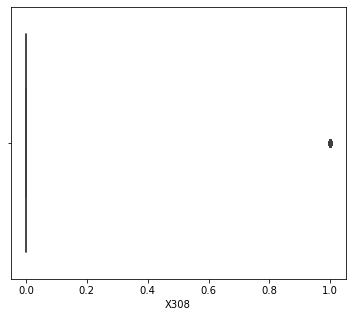

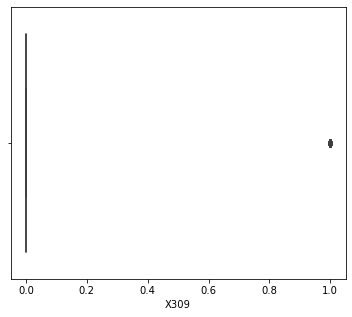

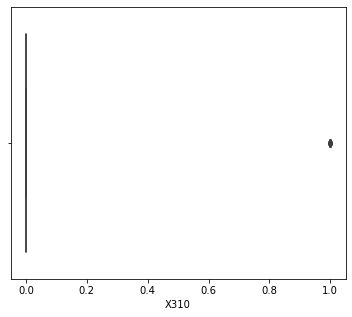

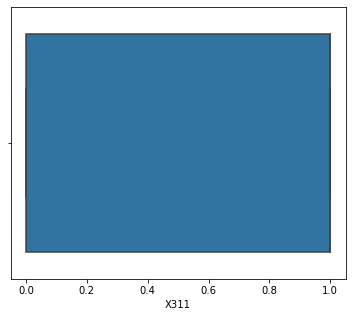

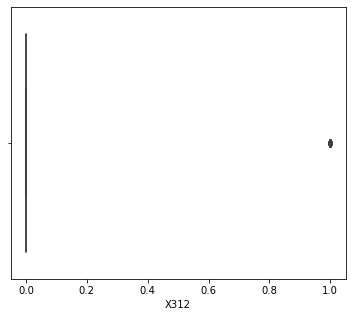

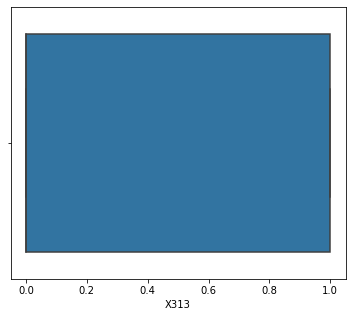

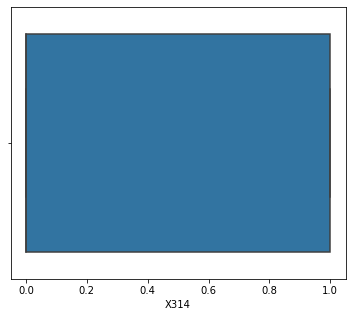

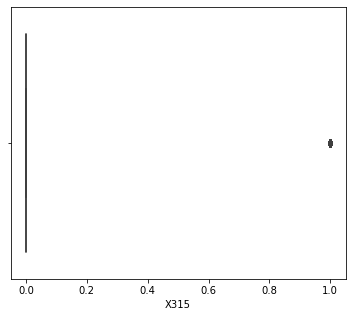

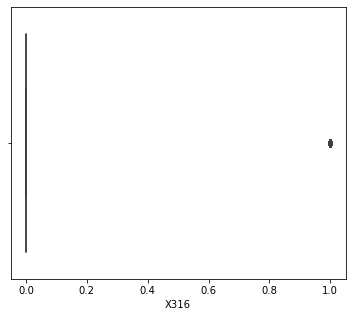

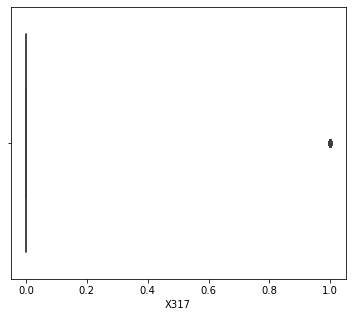

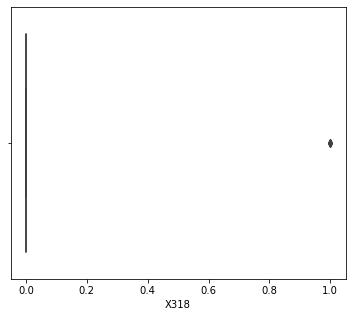

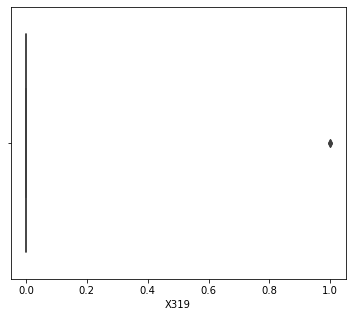

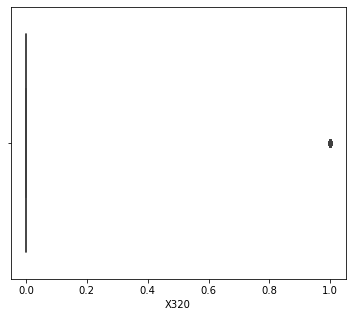

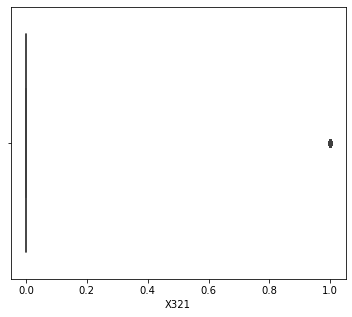

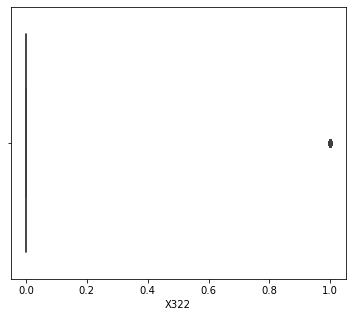

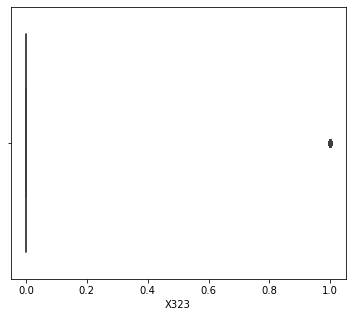

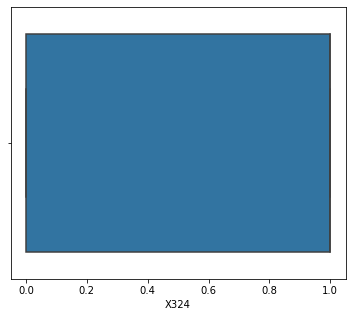

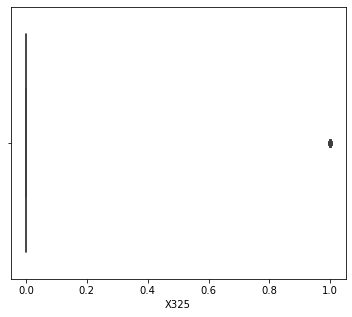

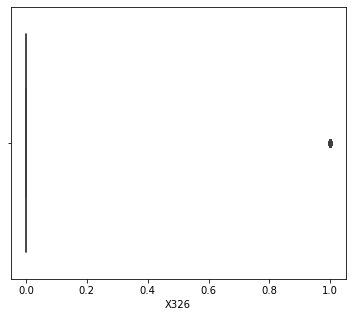

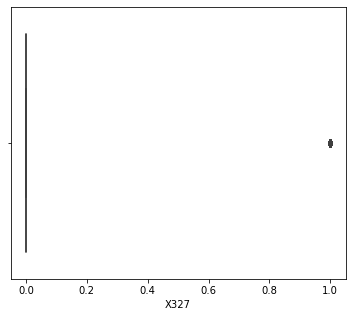

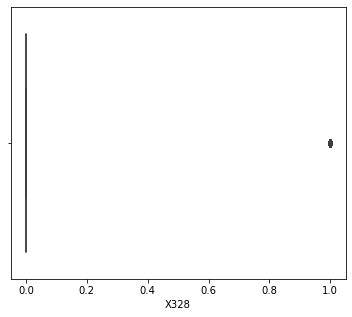

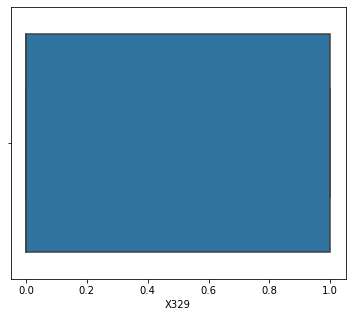

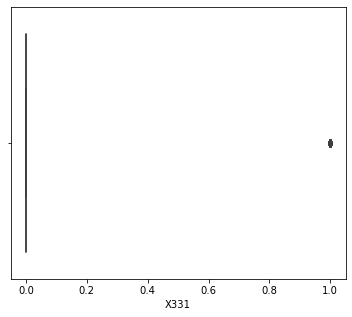

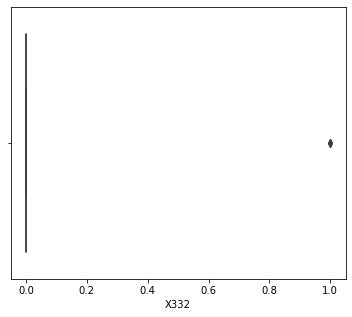

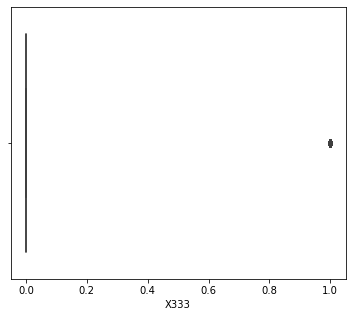

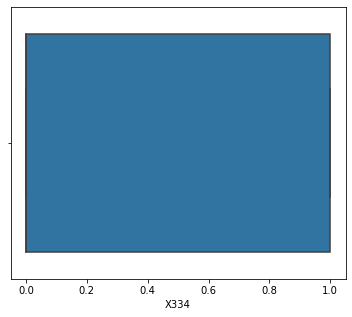

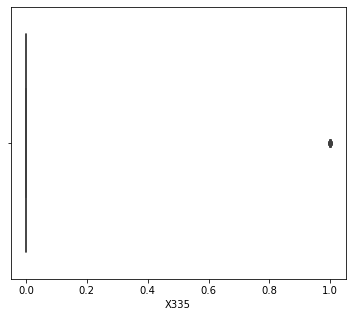

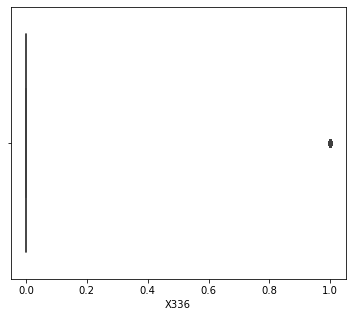

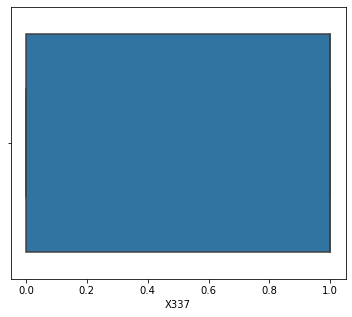

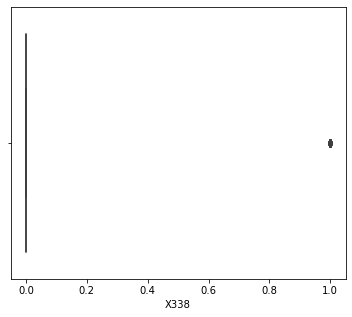

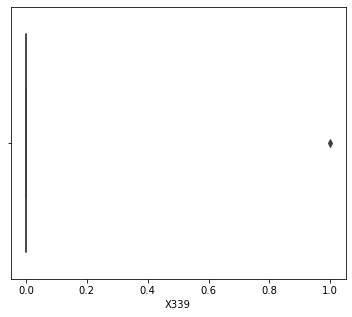

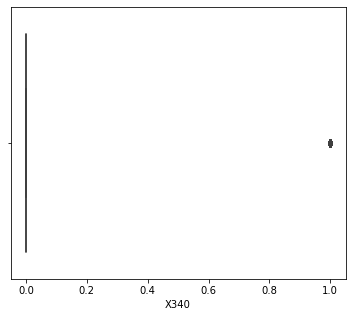

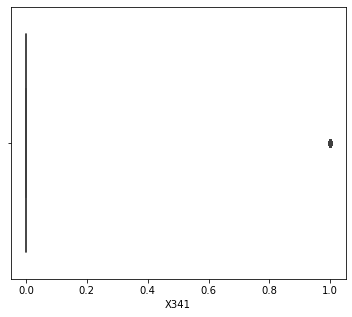

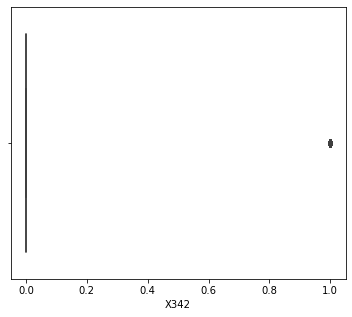

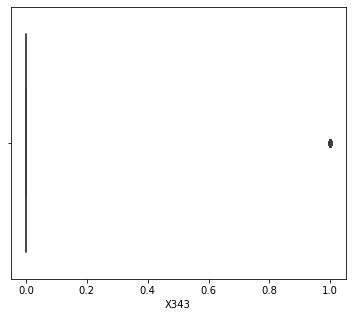

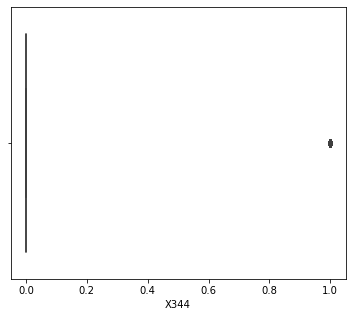

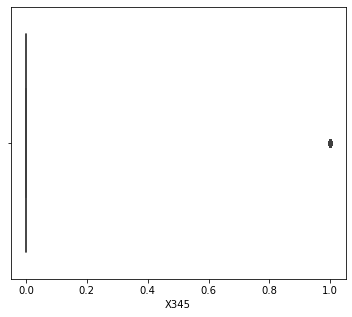

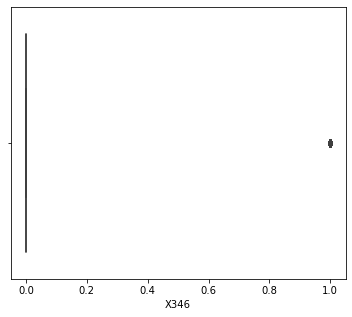

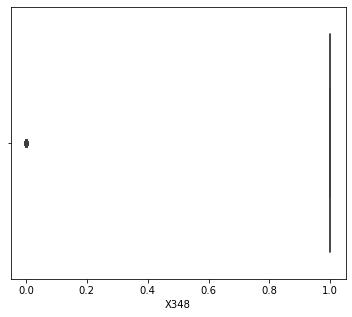

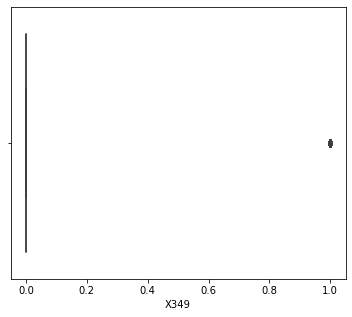

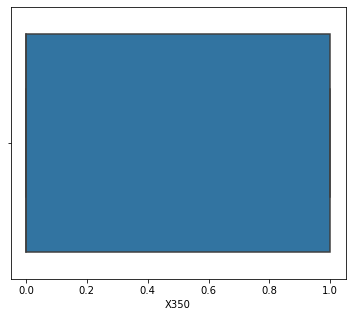

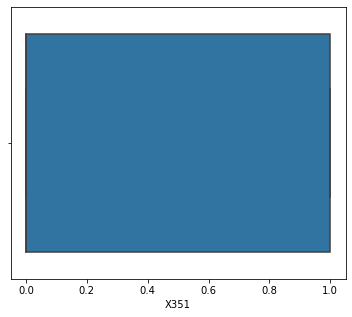

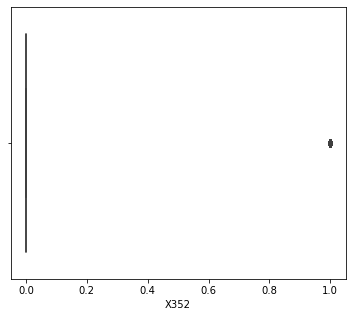

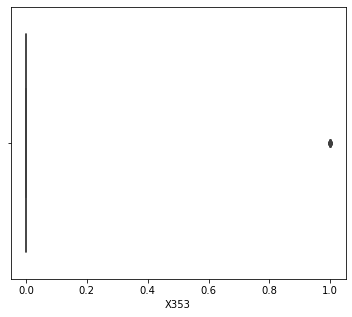

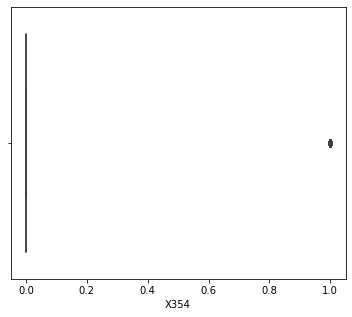

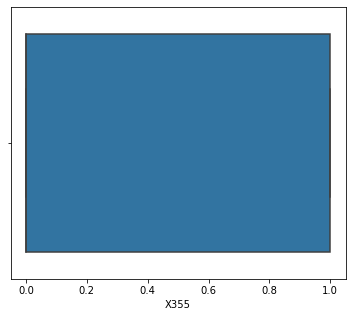

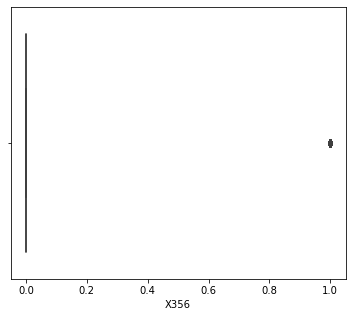

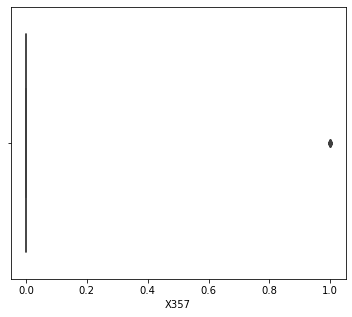

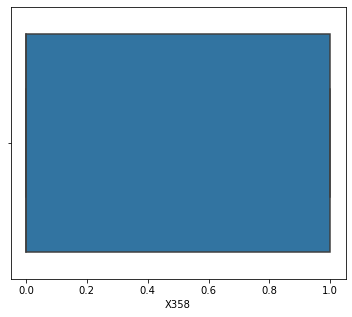

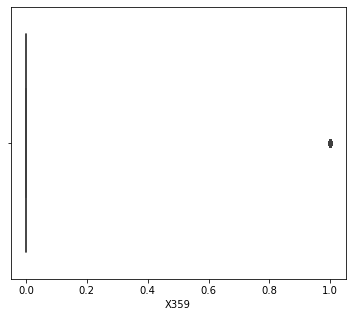

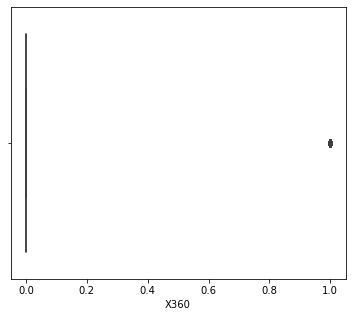

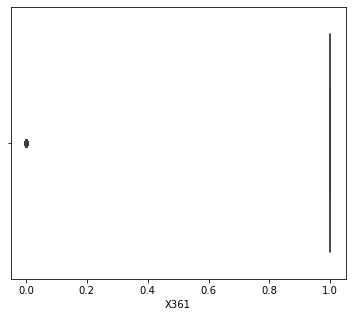

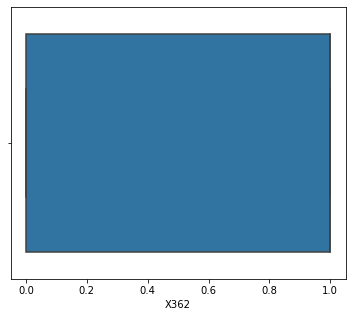

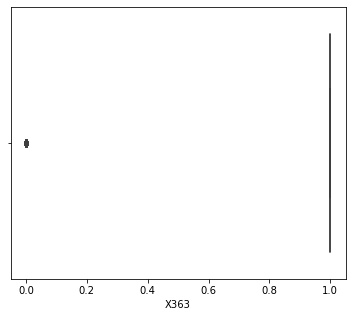

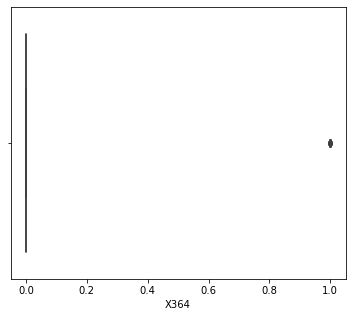

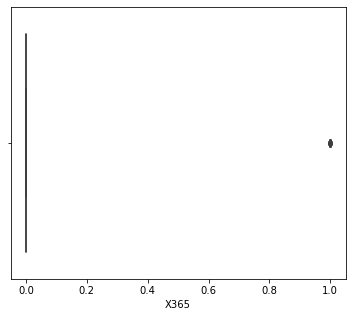

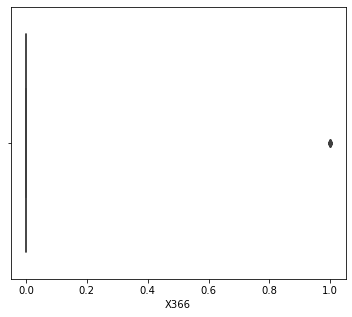

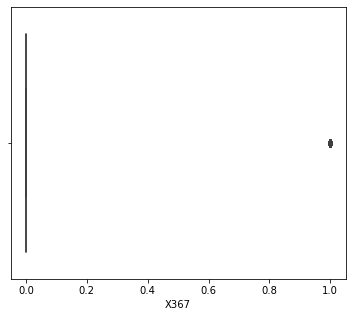

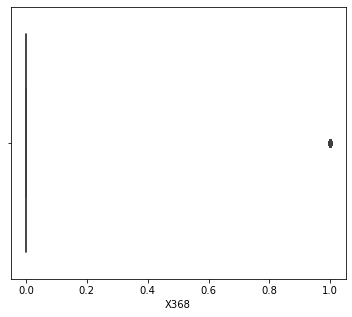

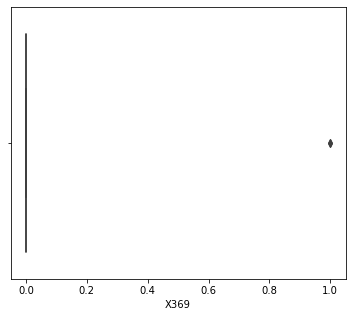

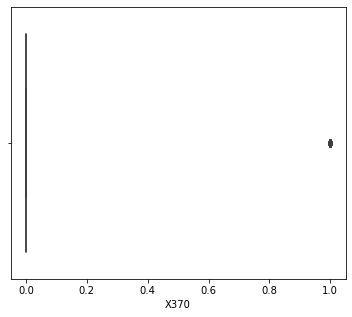

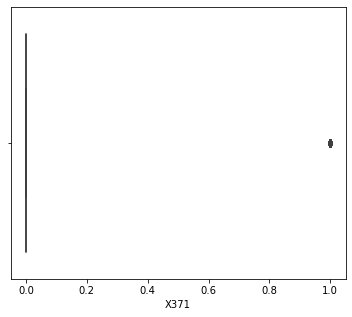

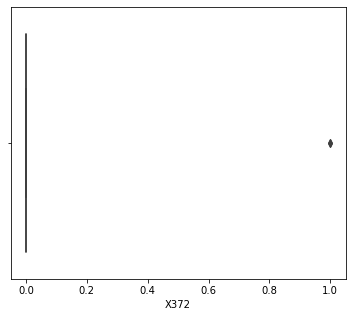

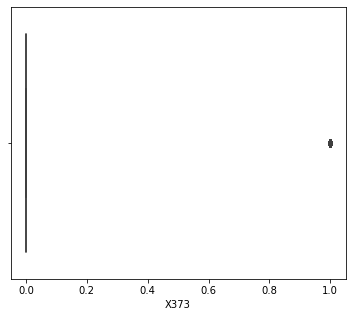

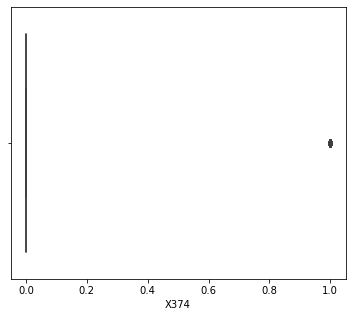

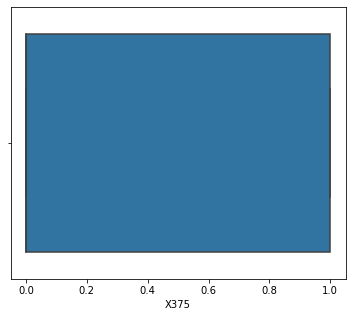

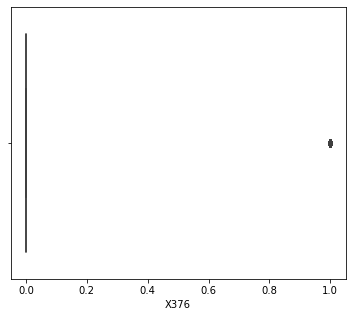

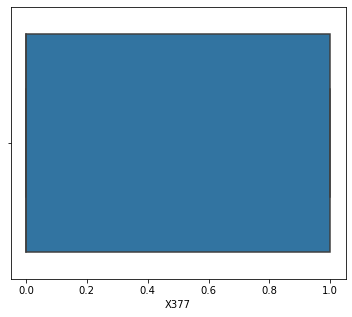

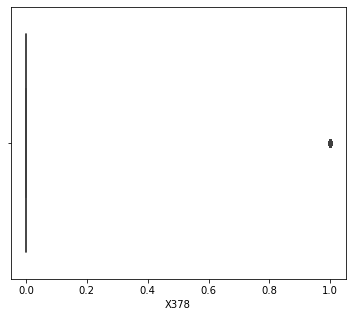

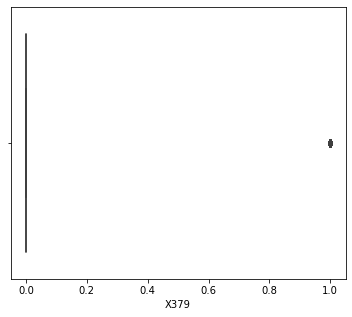

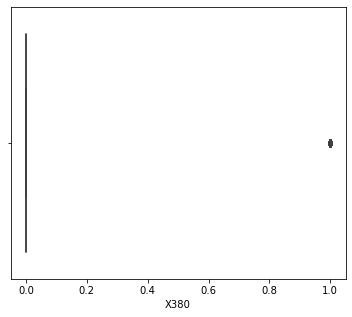

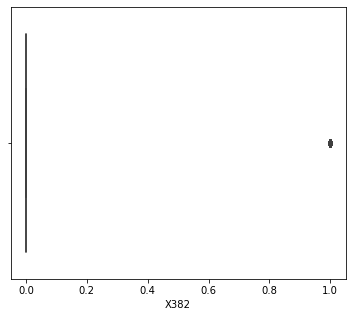

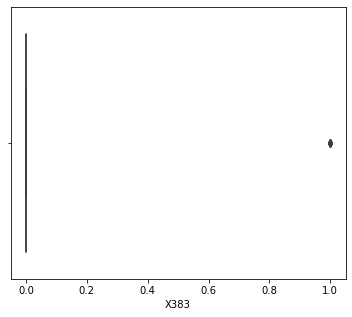

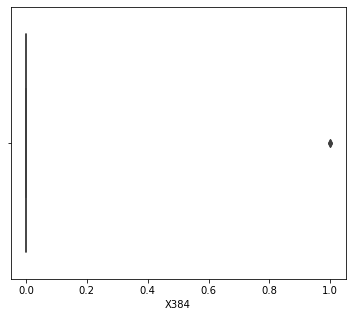

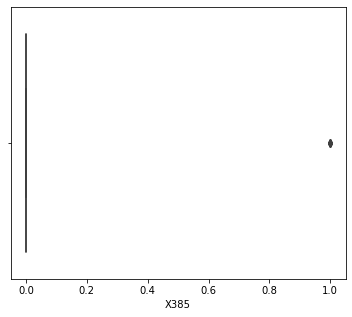

In [72]:
# Train data
for col in benz_train1.drop(['ID','y'],axis = 1).columns:
    if benz_train1[col].dtype != object:
        plt.figure(figsize=(6,5))
        sns.boxplot(x = benz_train1[col])
        plt.show()

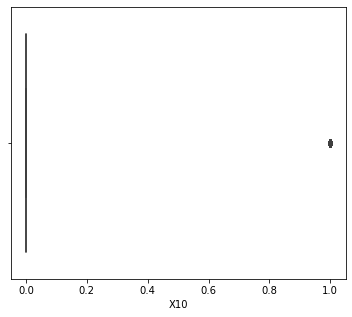

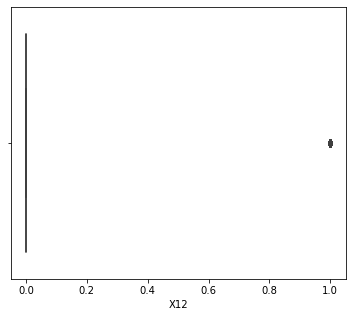

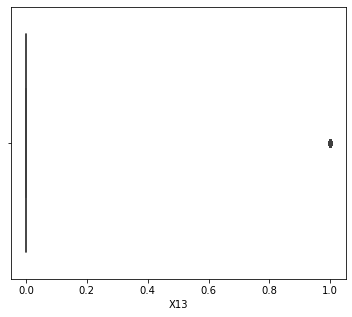

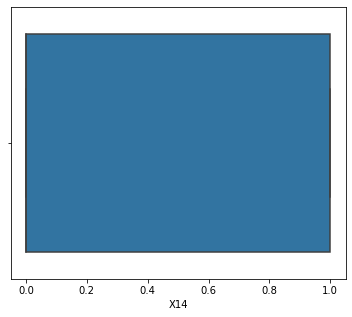

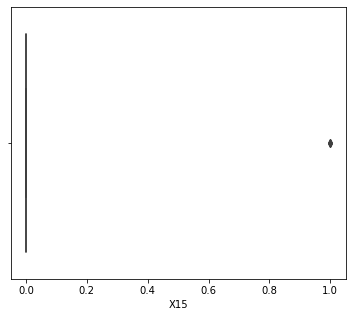

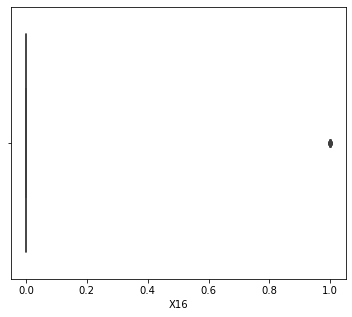

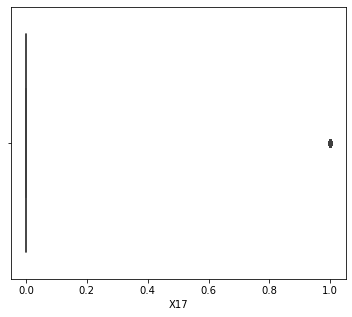

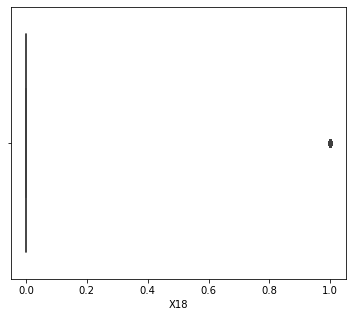

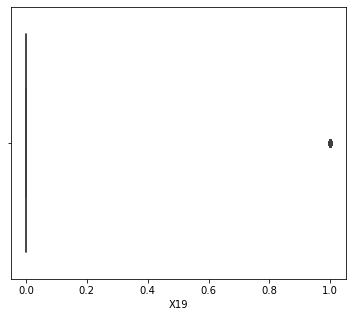

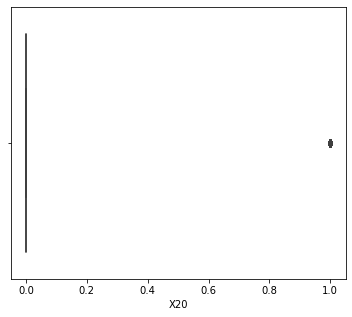

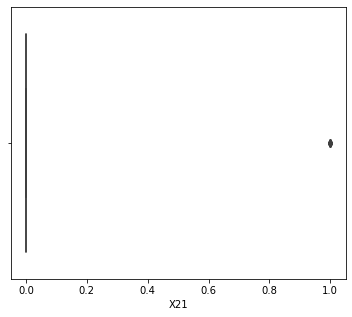

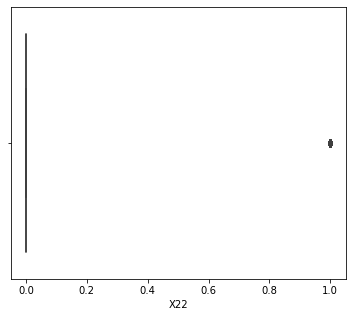

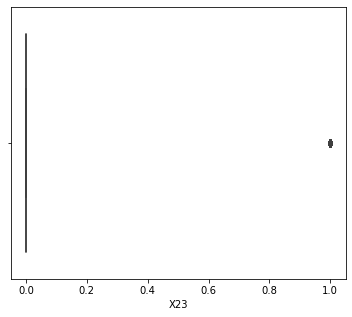

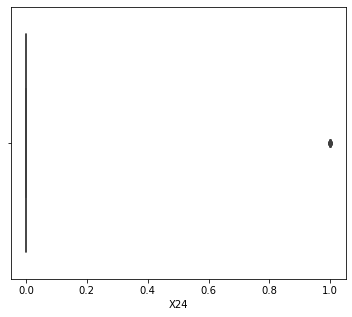

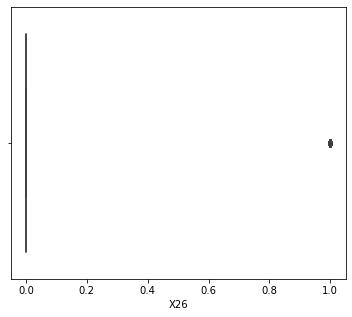

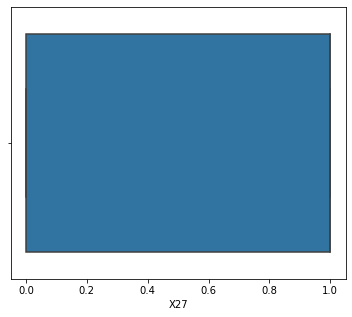

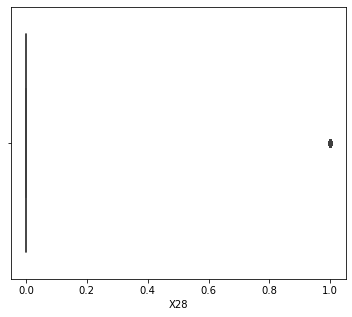

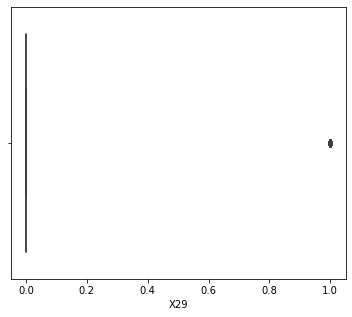

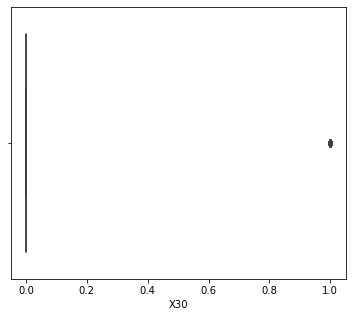

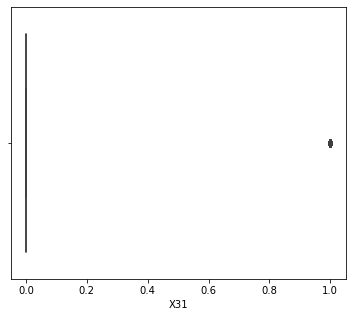

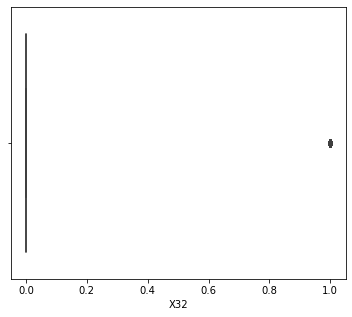

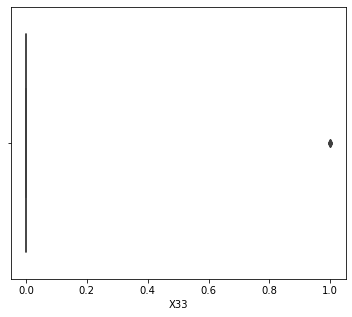

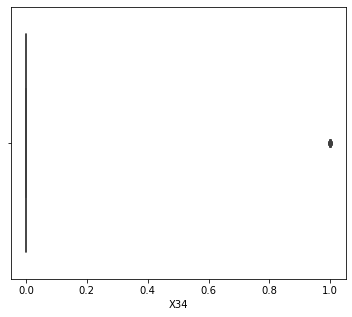

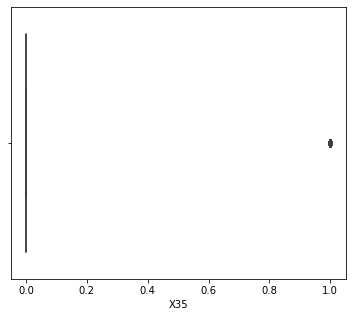

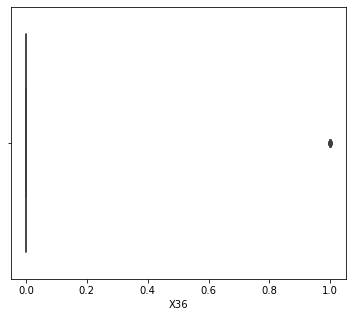

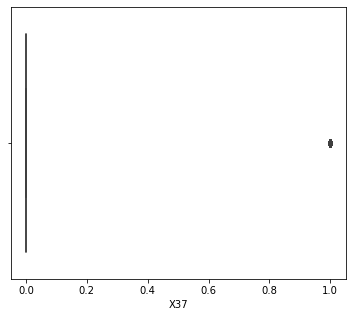

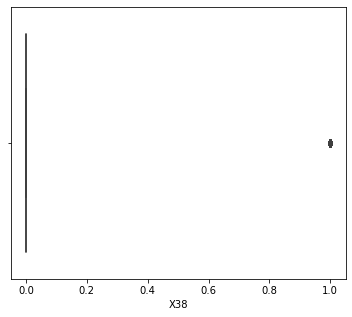

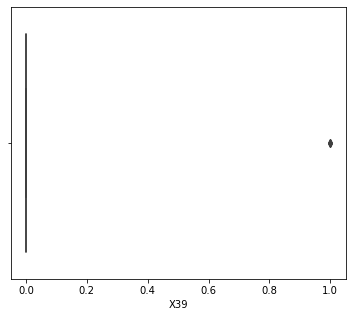

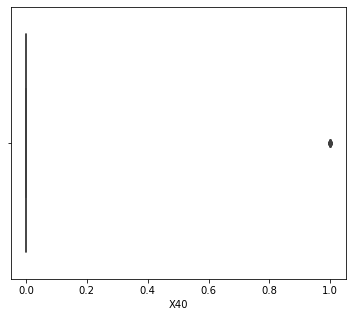

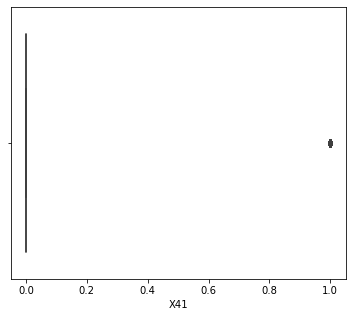

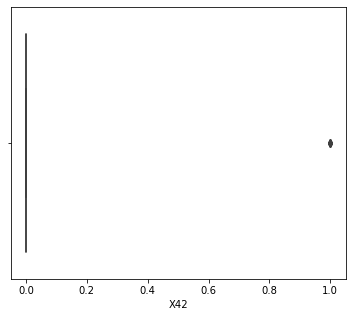

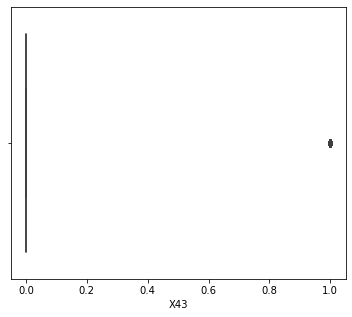

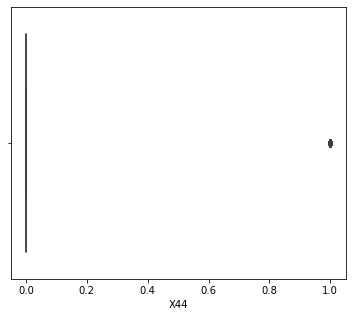

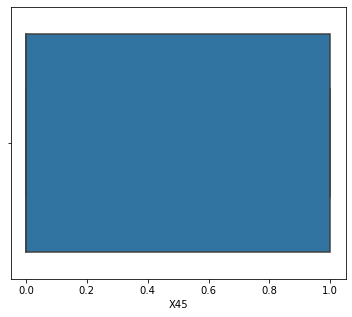

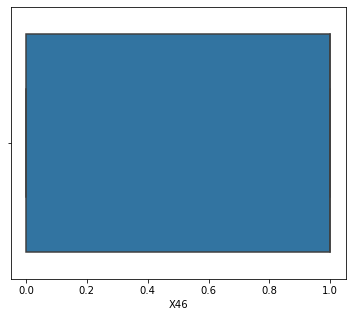

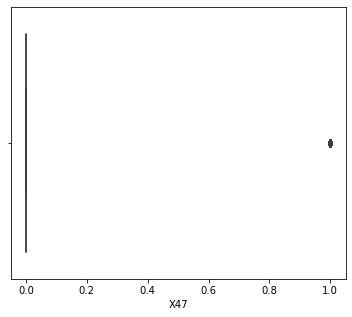

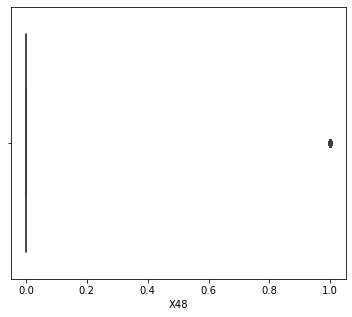

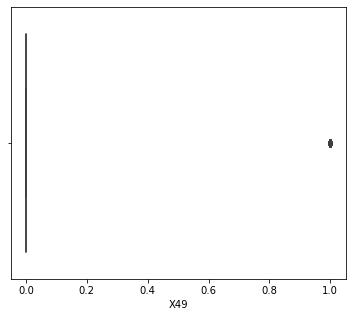

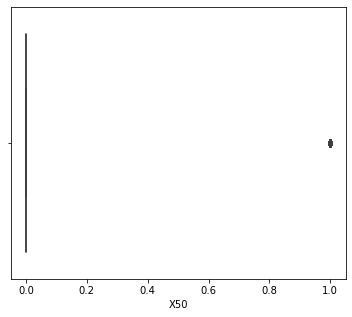

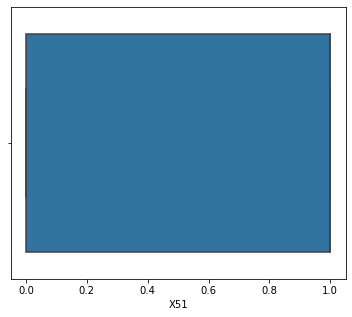

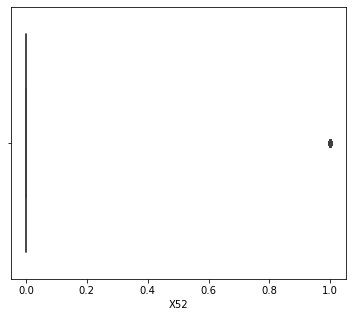

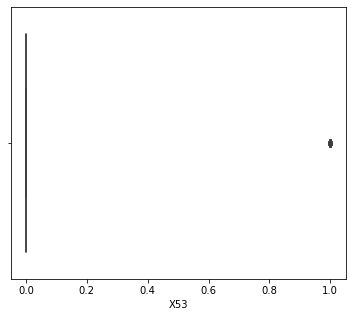

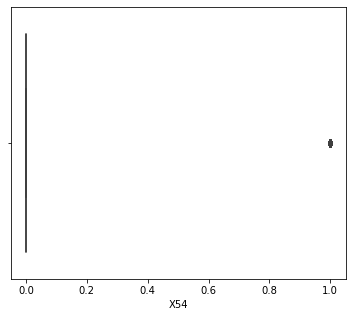

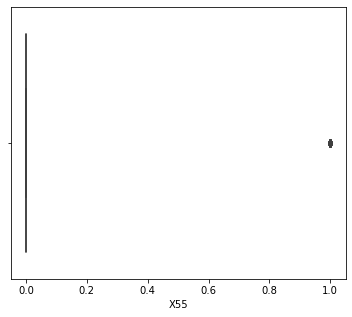

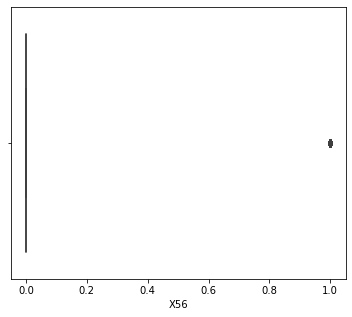

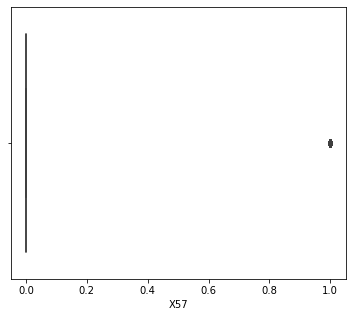

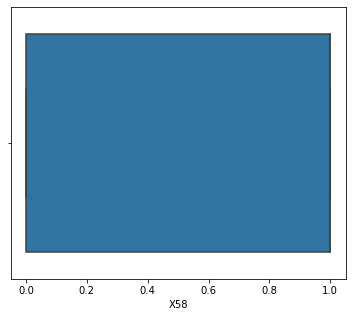

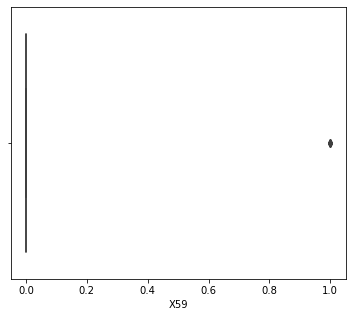

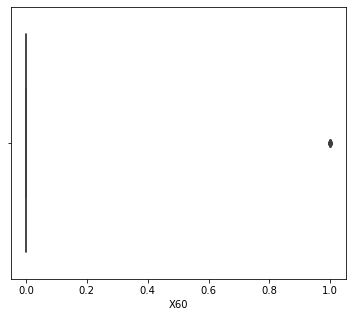

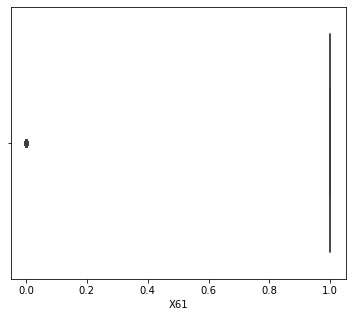

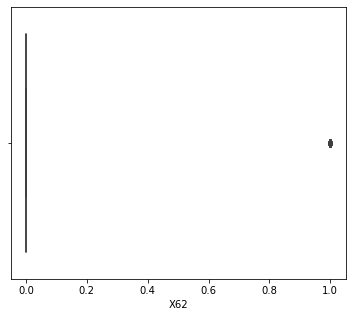

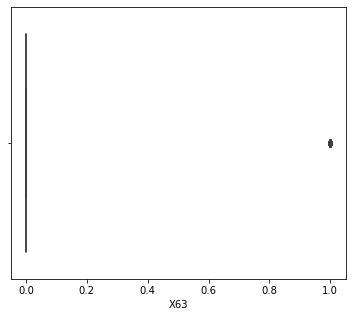

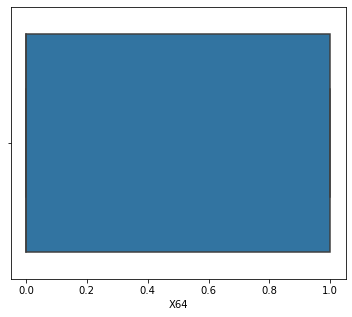

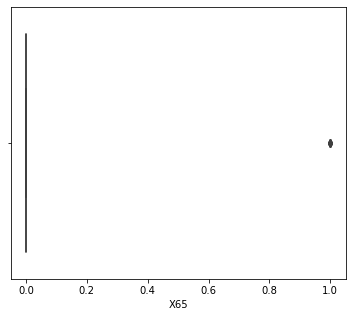

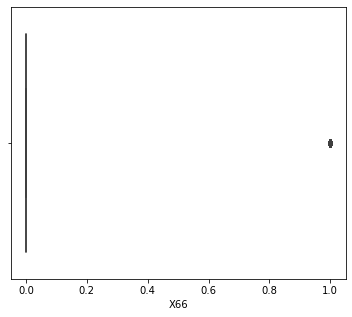

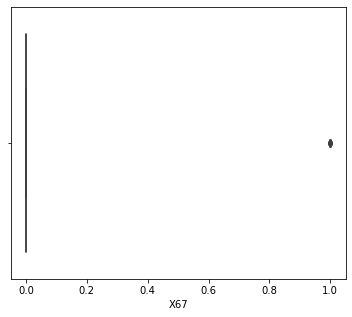

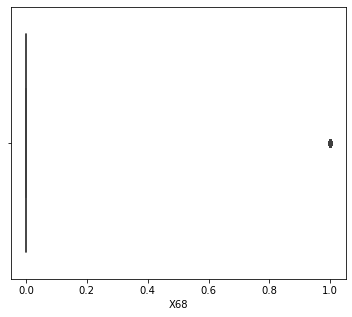

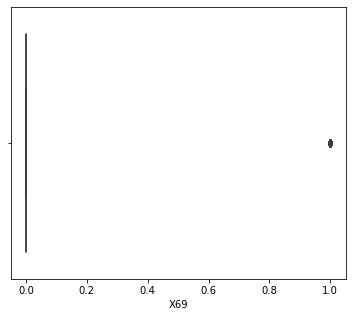

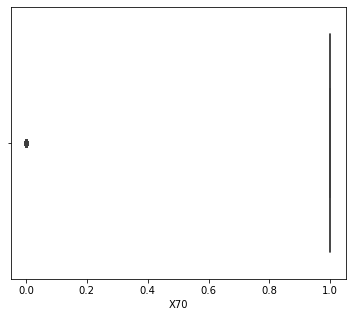

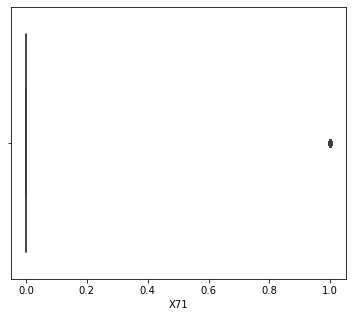

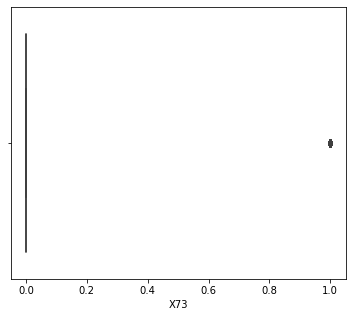

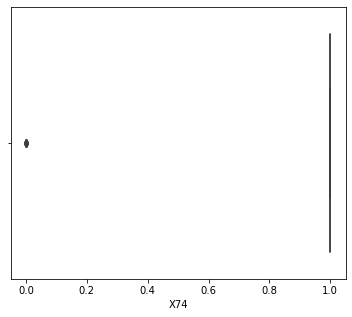

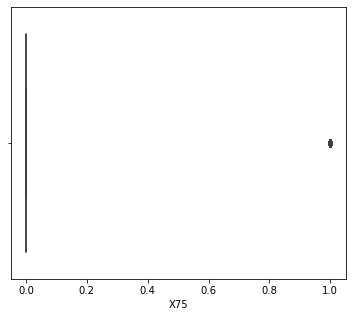

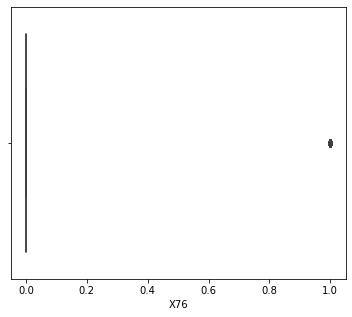

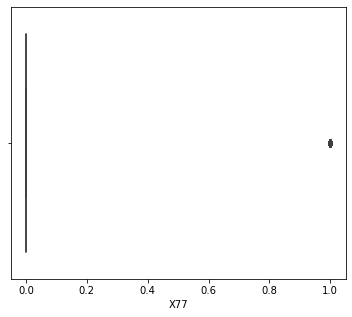

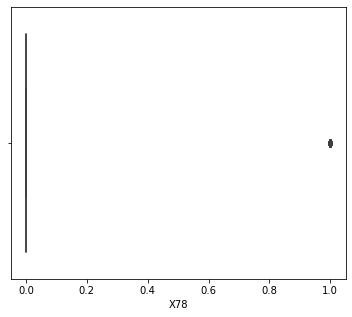

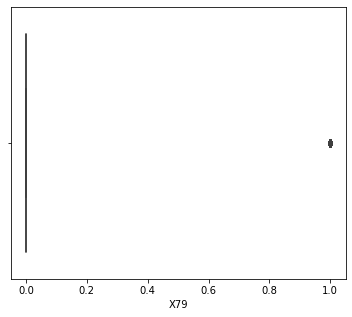

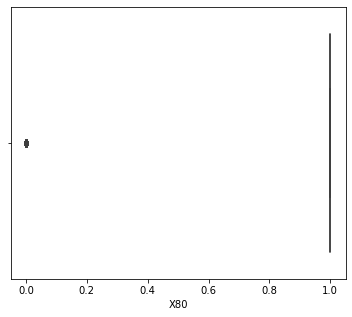

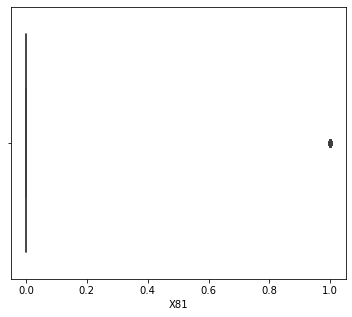

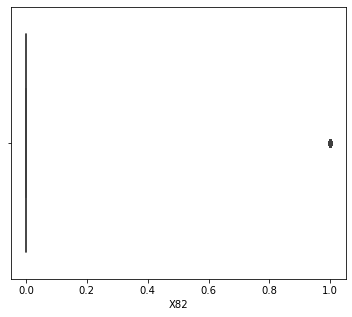

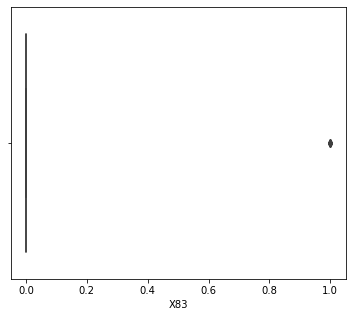

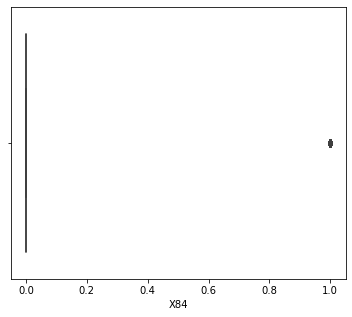

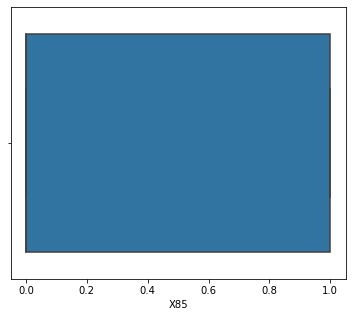

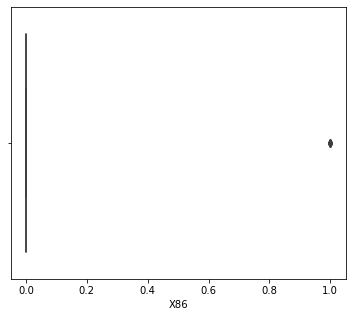

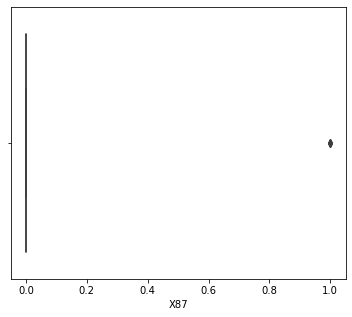

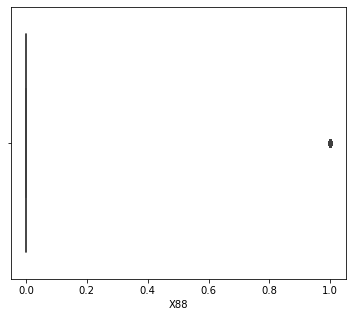

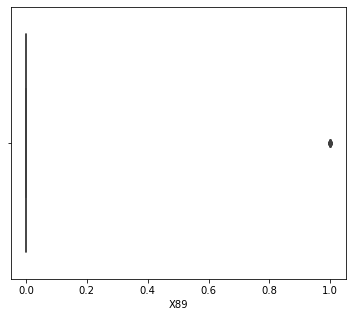

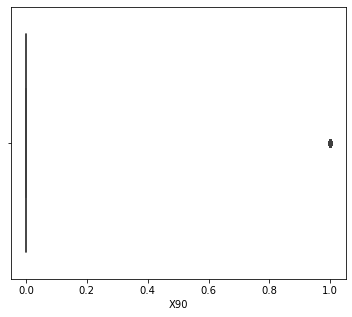

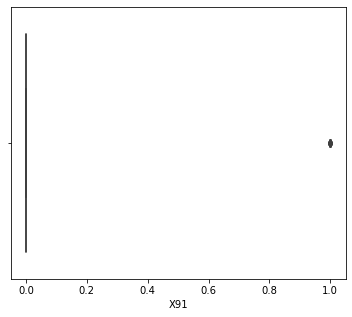

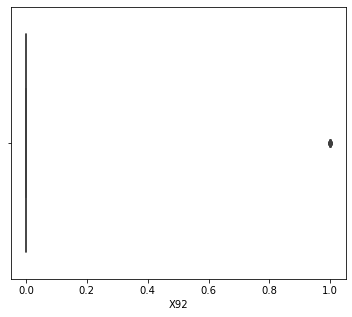

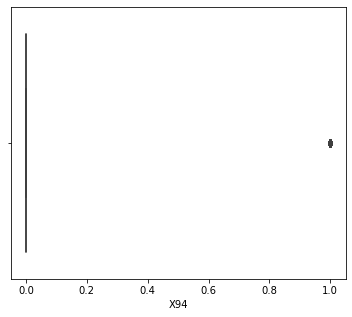

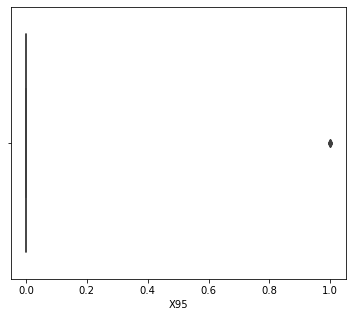

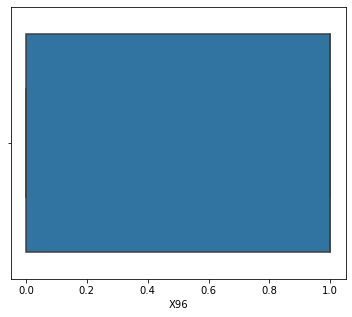

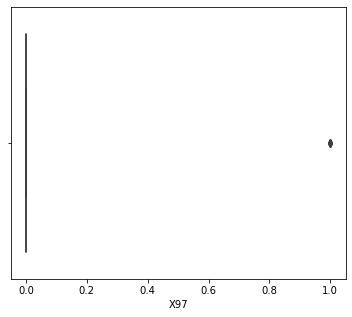

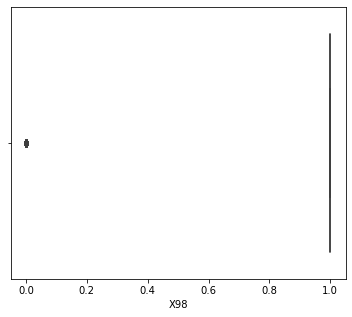

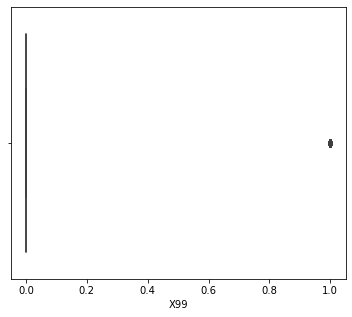

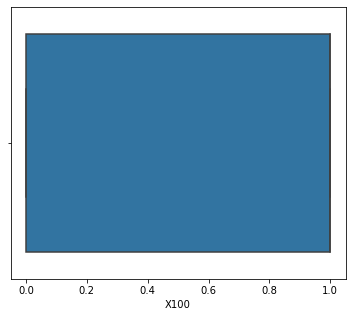

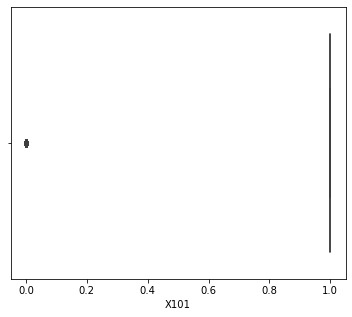

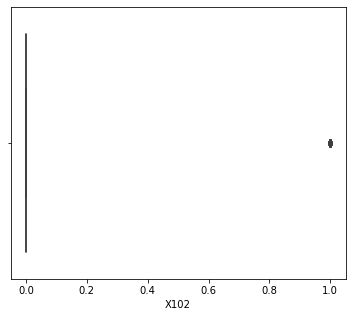

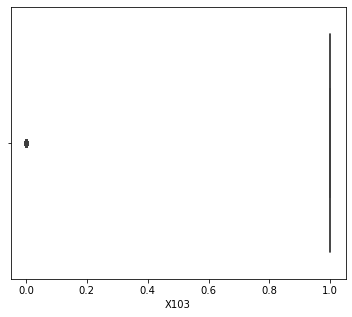

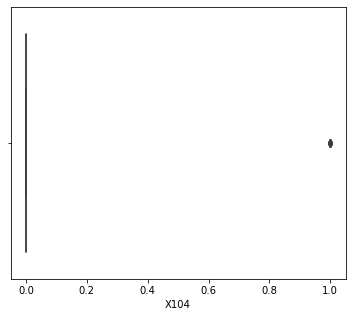

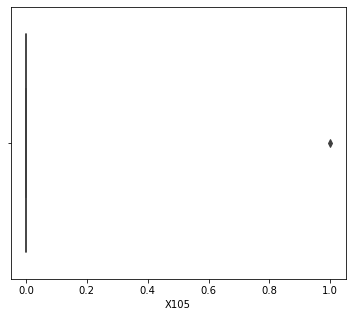

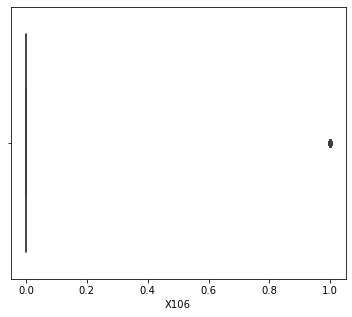

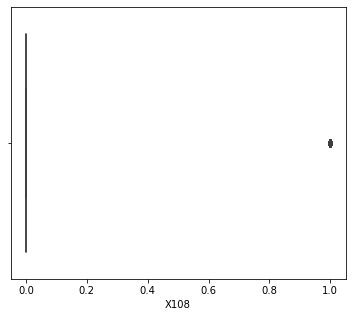

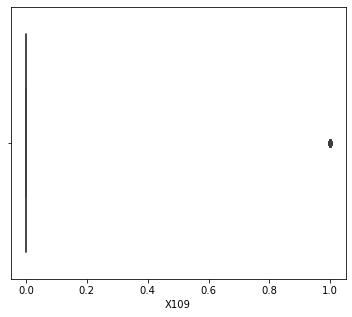

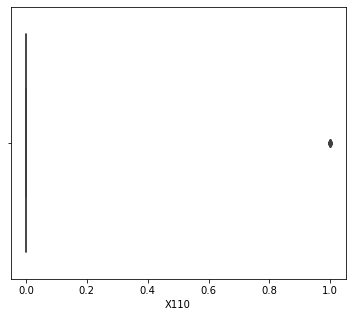

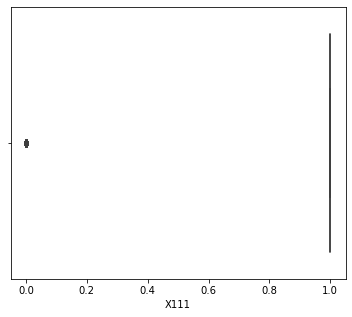

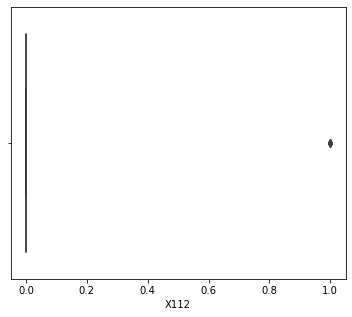

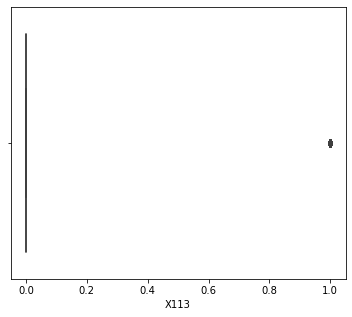

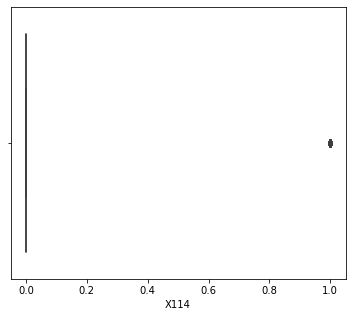

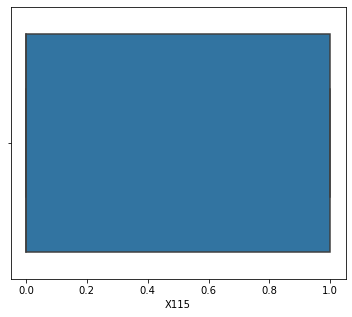

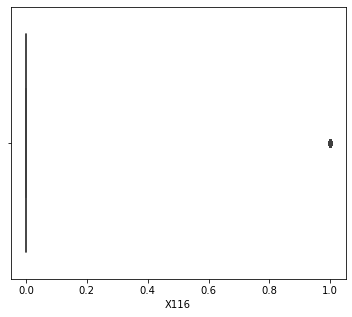

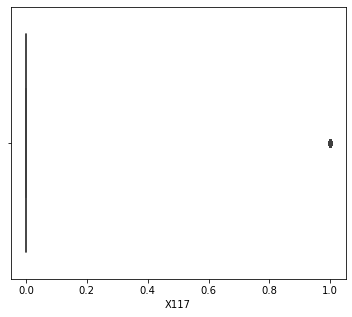

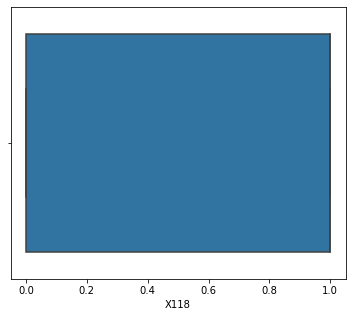

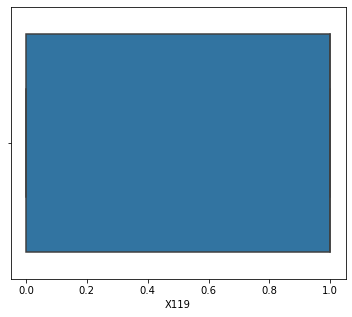

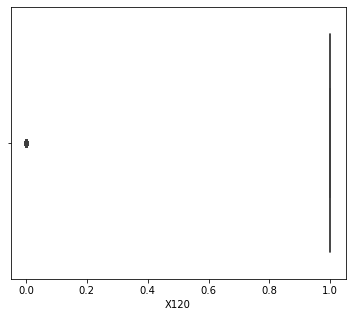

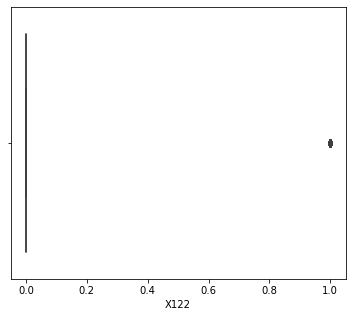

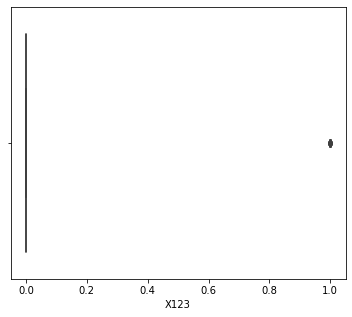

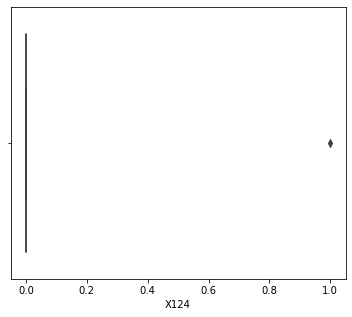

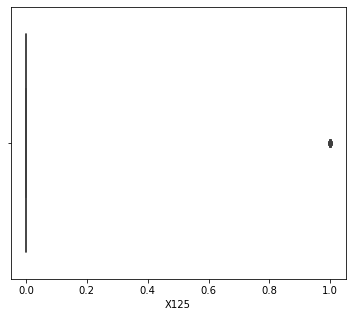

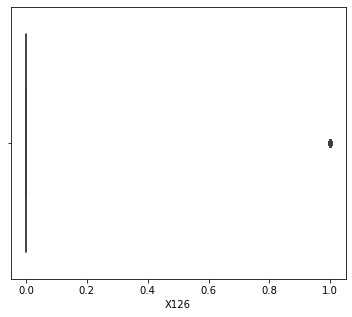

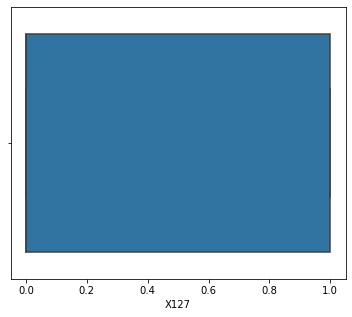

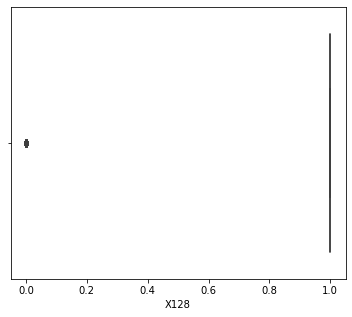

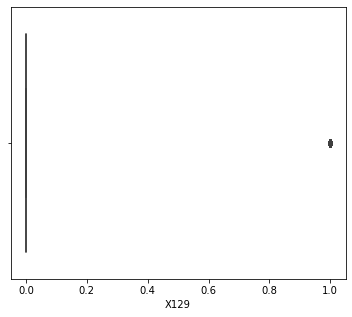

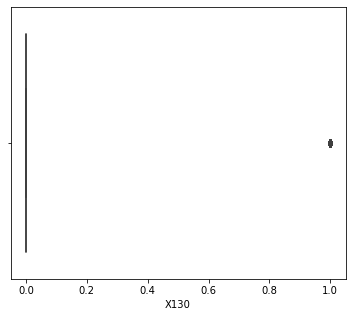

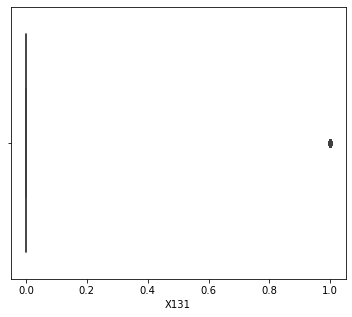

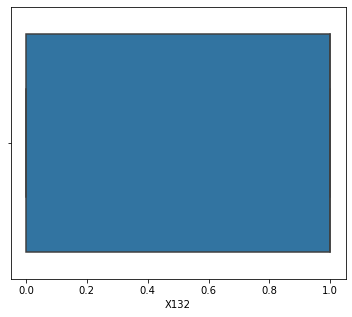

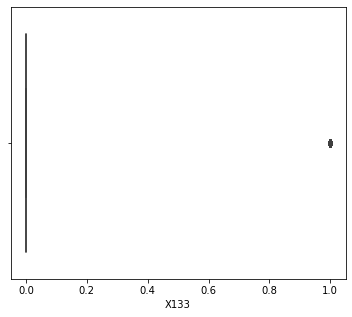

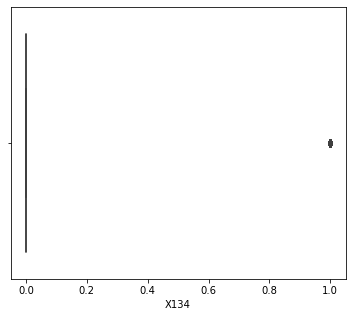

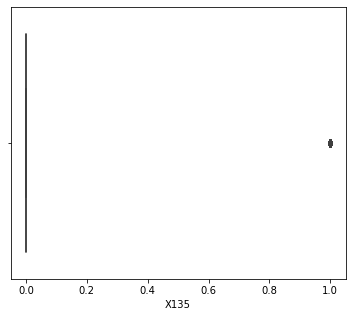

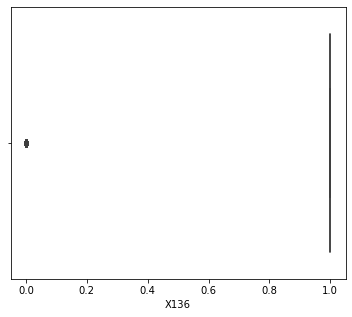

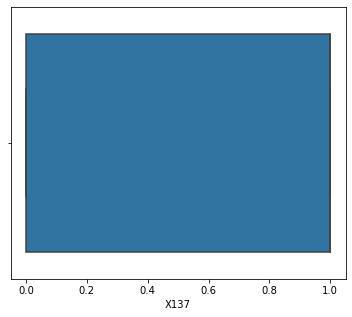

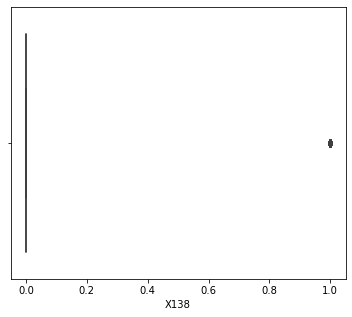

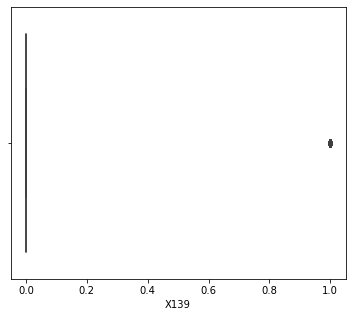

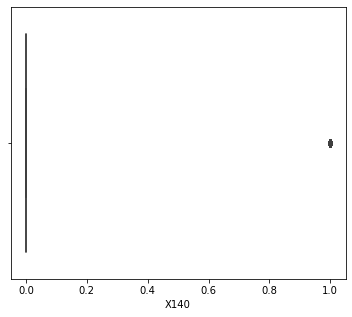

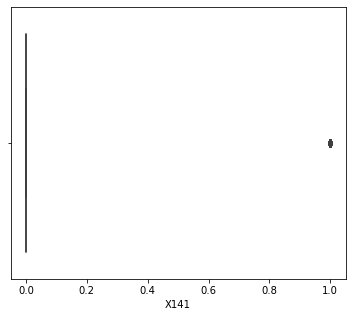

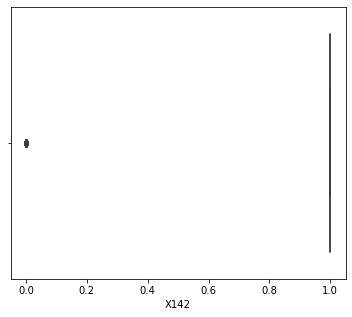

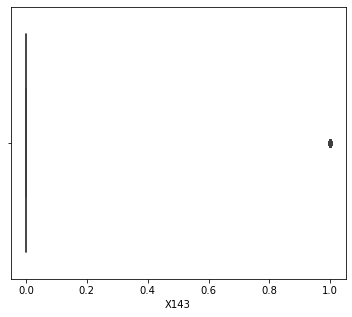

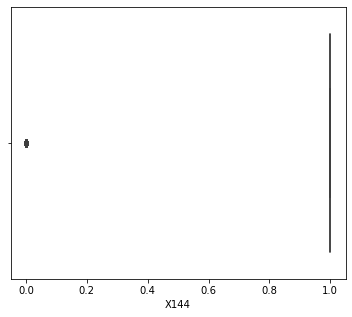

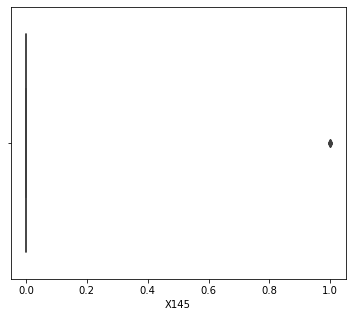

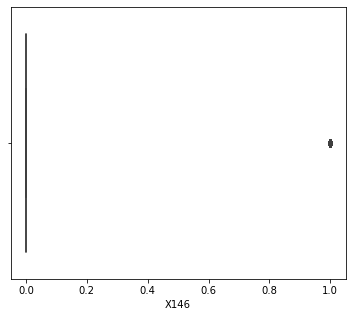

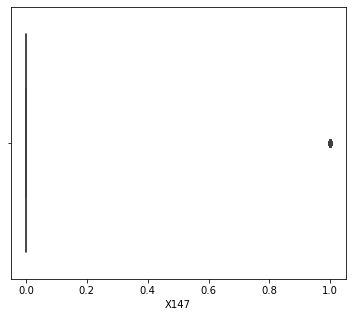

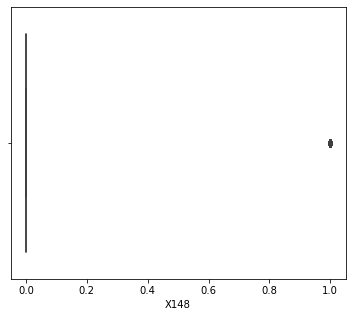

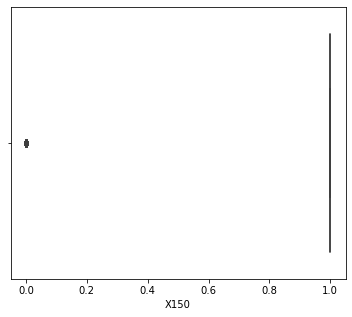

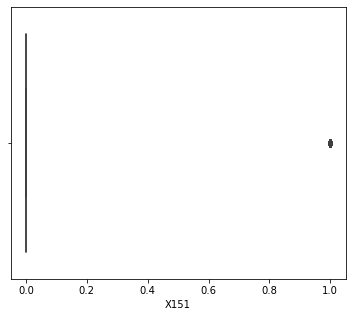

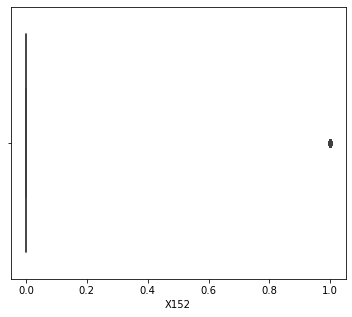

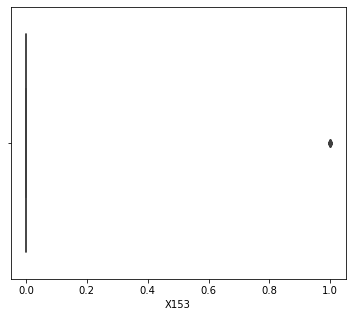

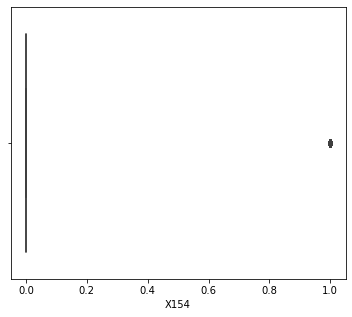

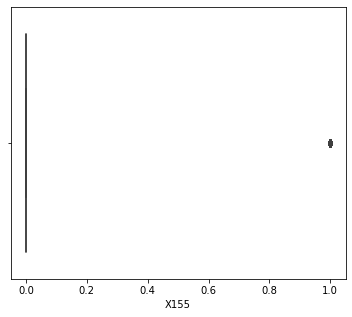

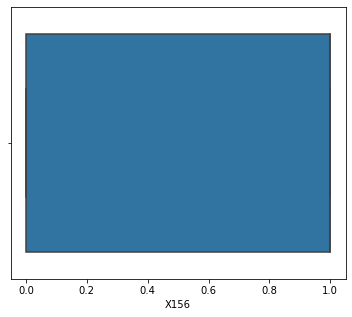

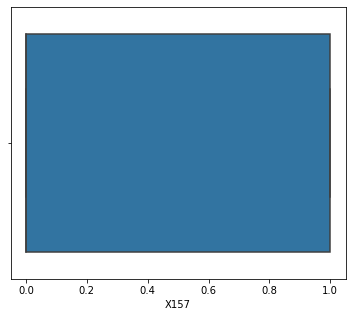

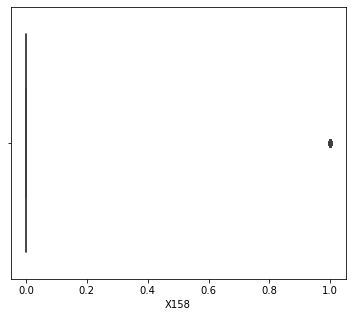

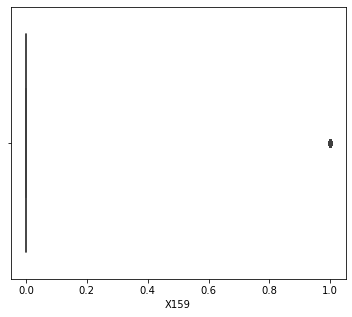

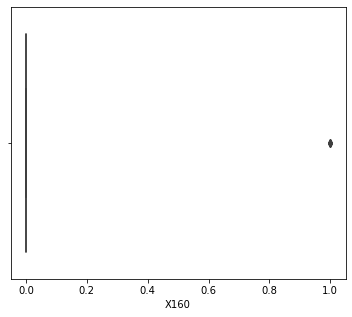

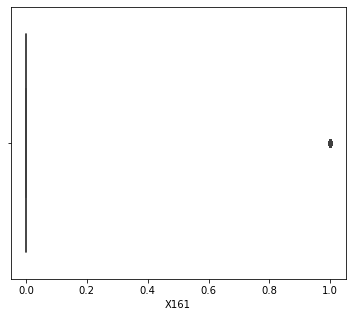

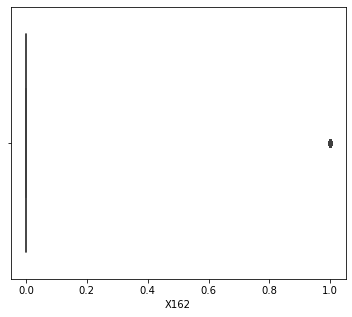

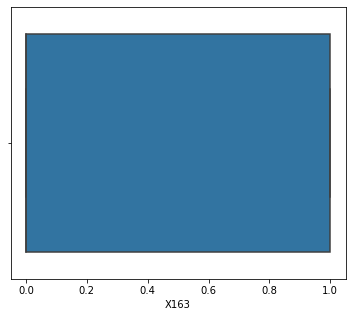

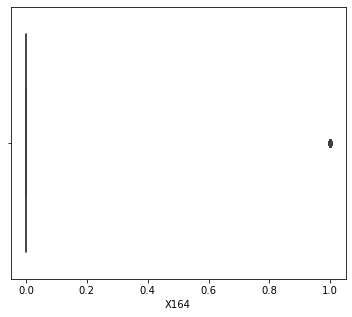

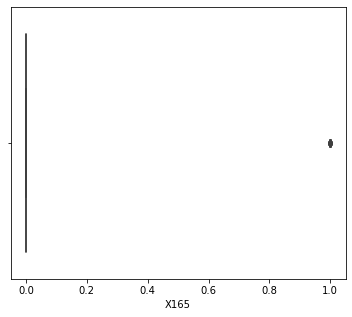

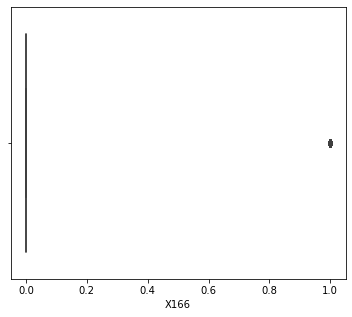

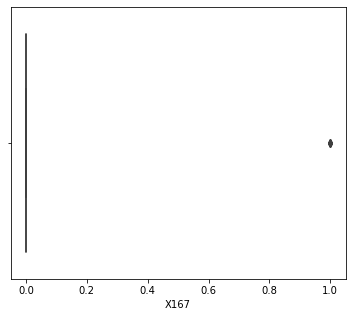

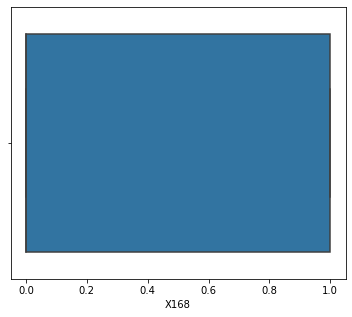

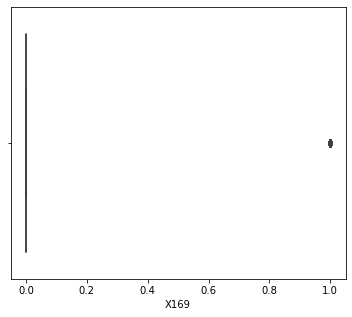

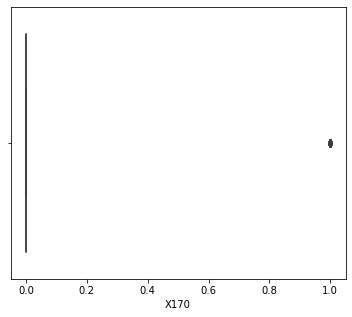

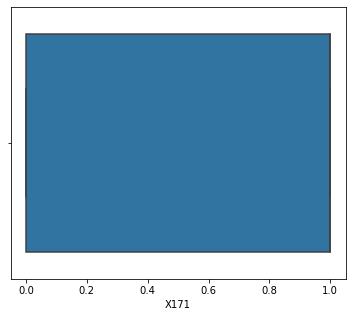

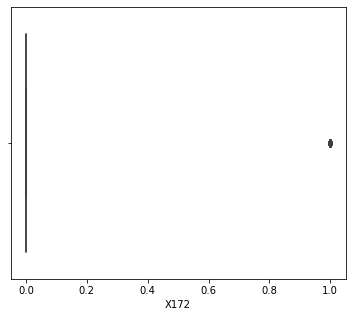

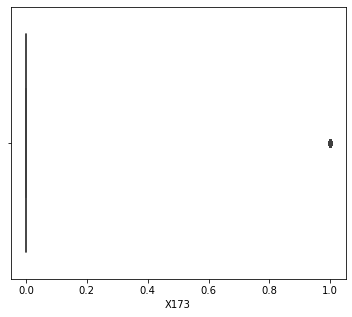

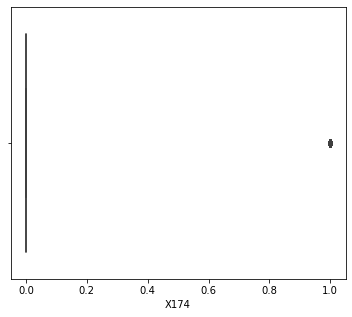

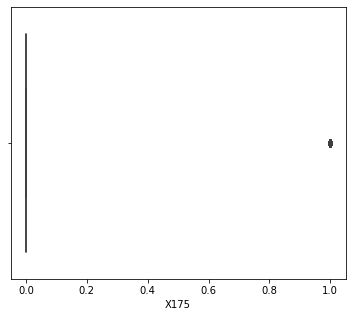

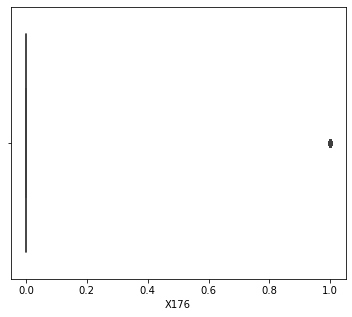

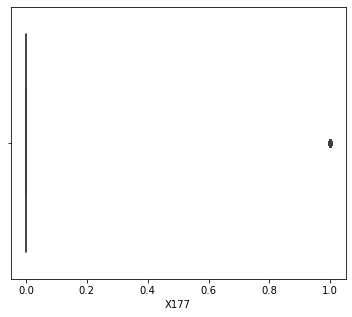

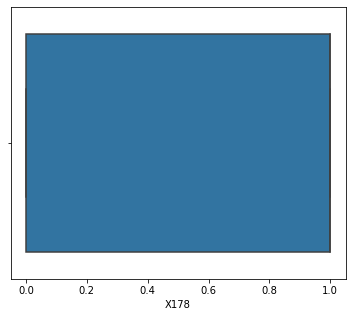

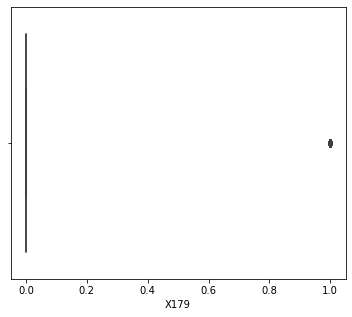

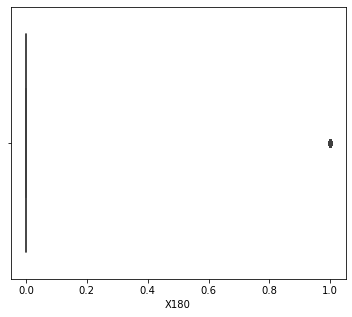

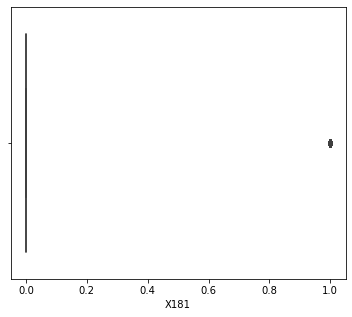

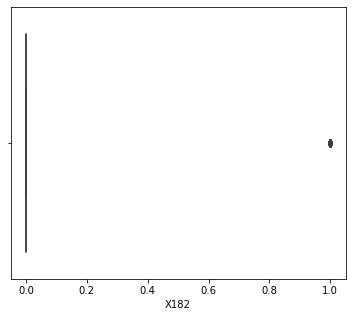

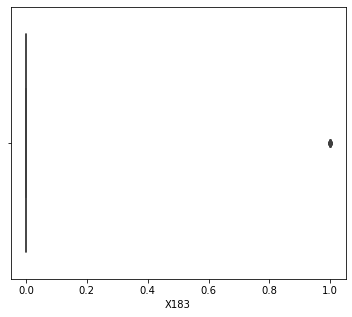

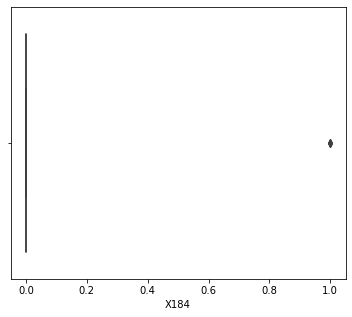

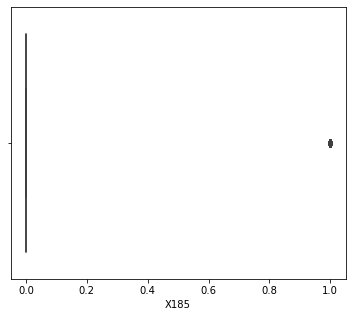

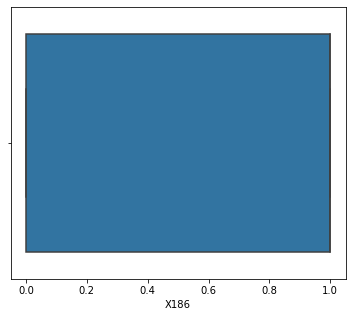

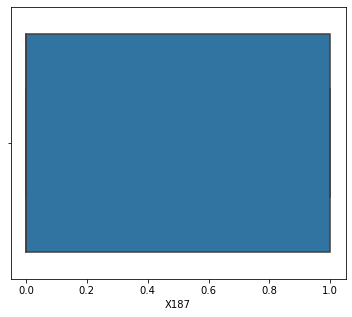

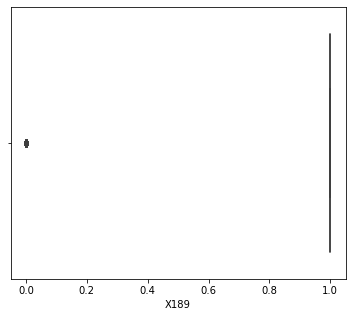

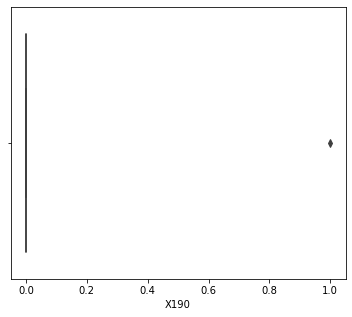

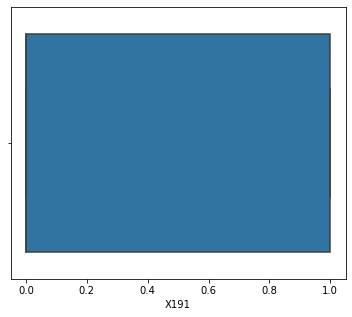

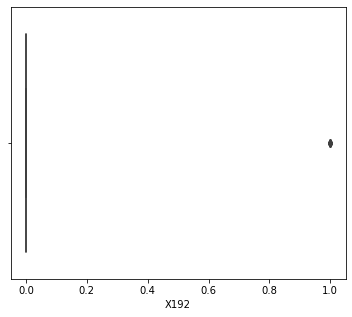

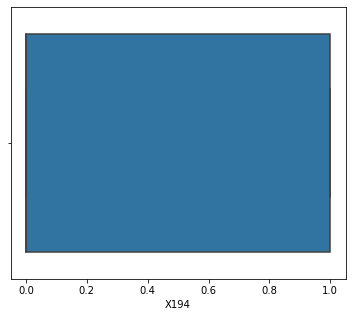

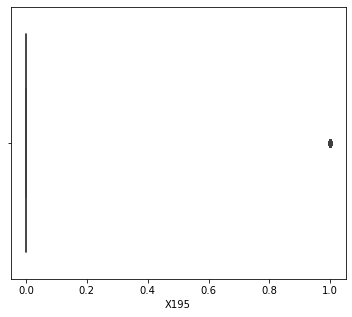

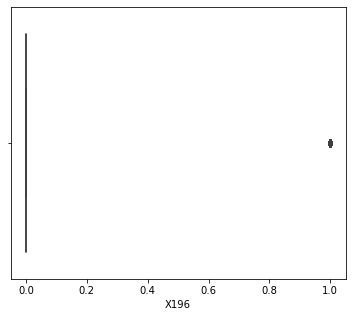

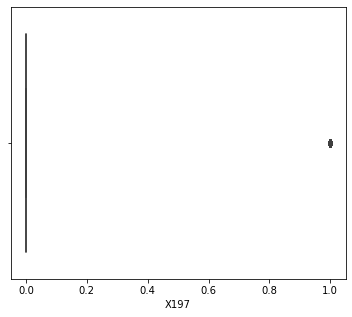

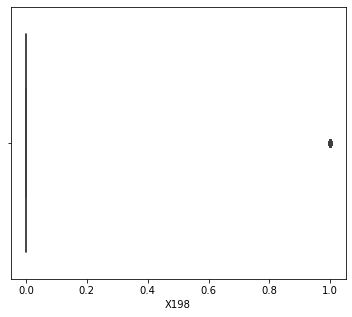

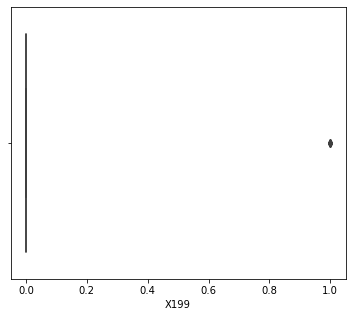

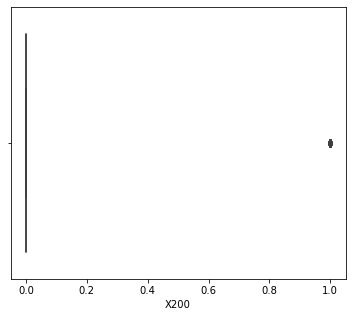

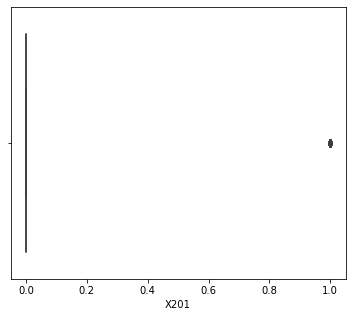

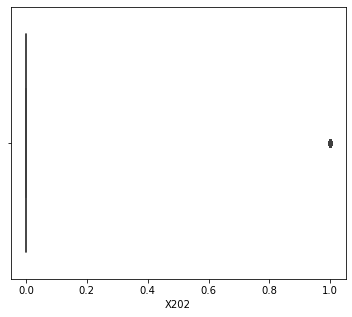

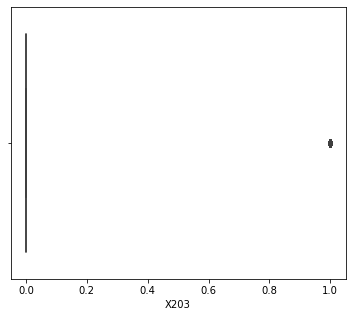

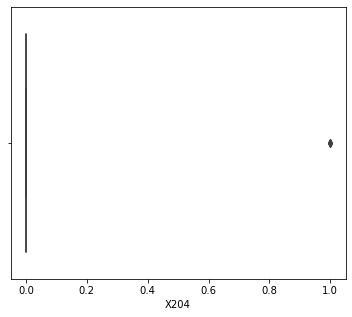

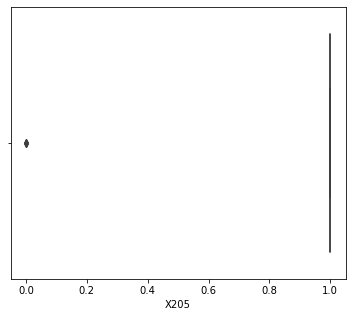

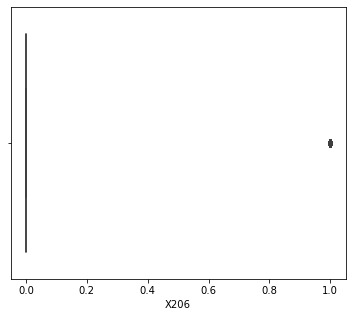

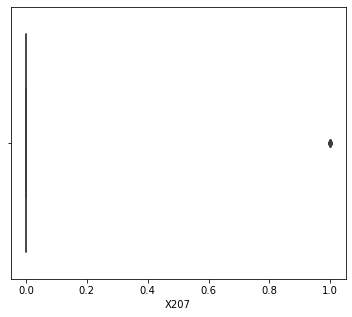

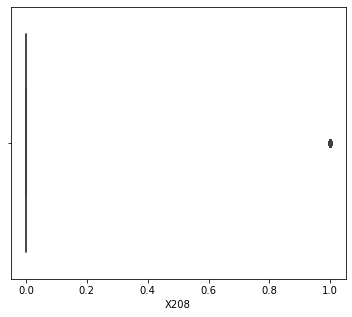

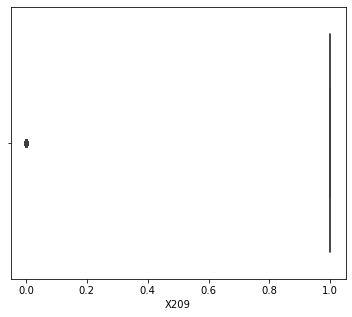

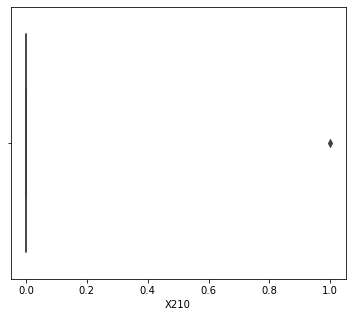

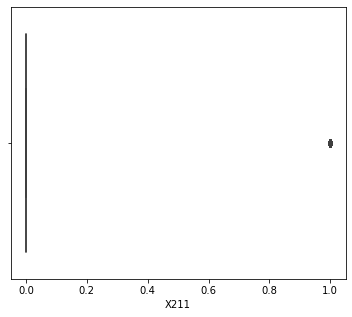

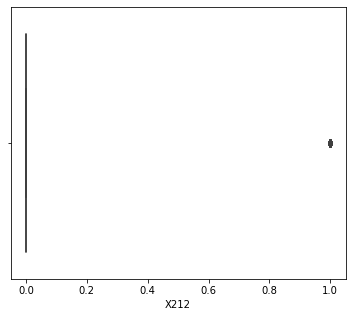

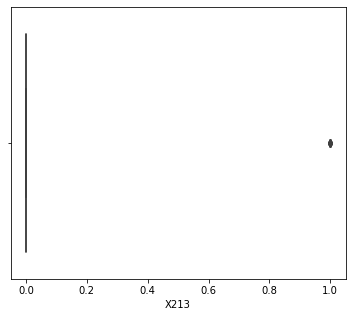

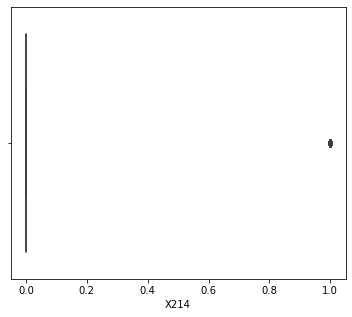

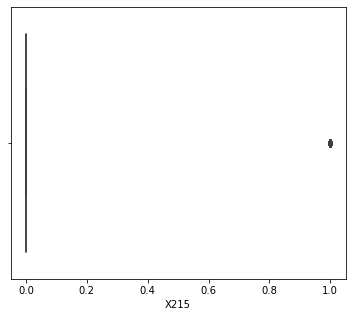

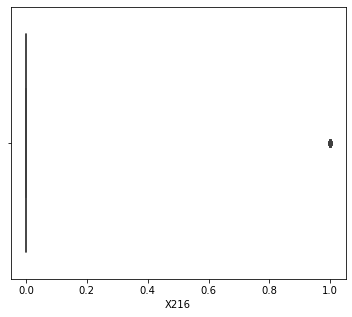

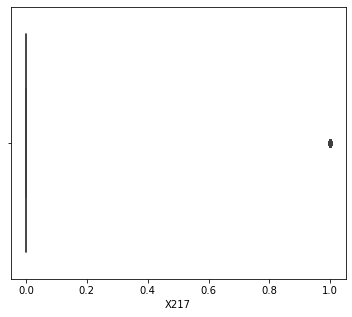

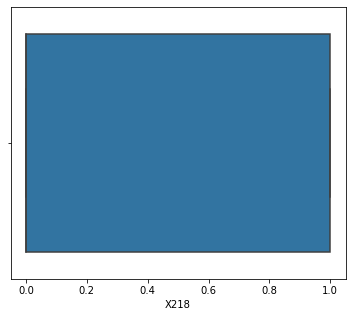

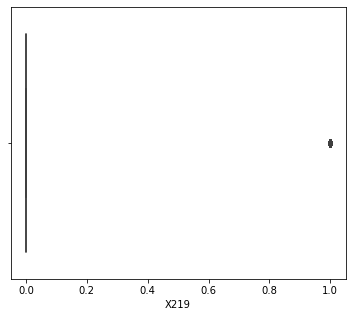

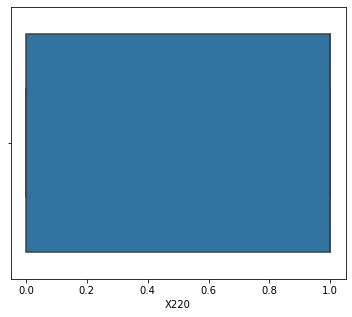

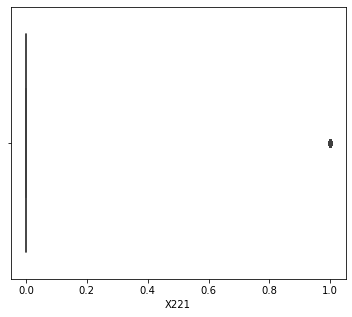

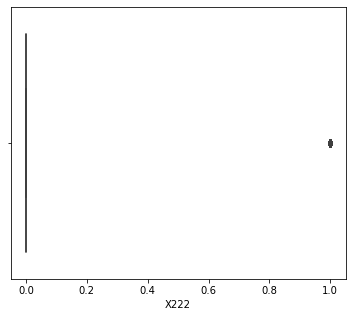

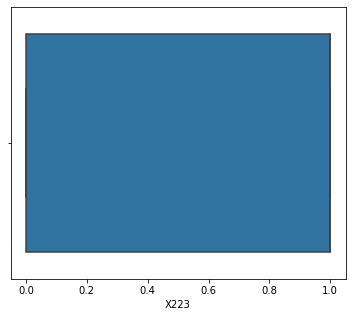

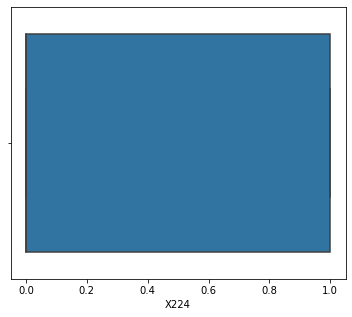

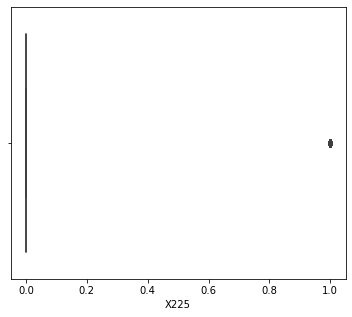

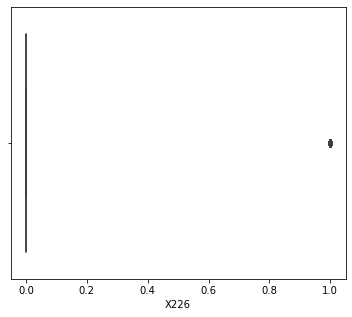

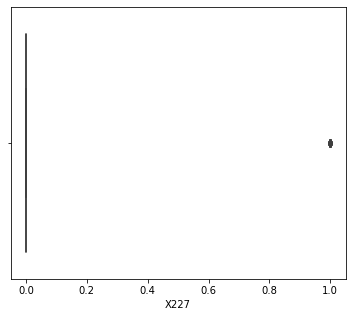

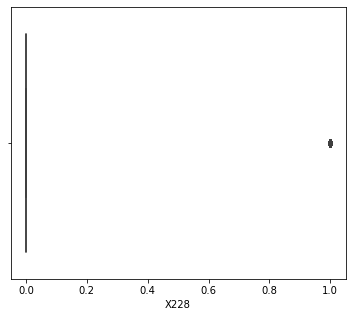

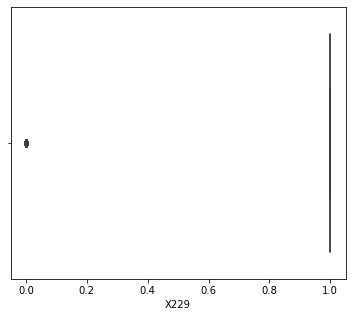

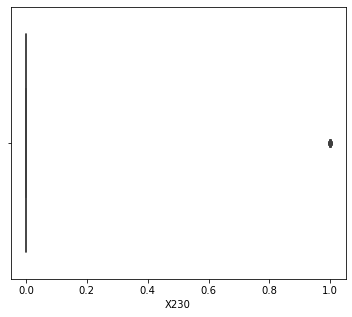

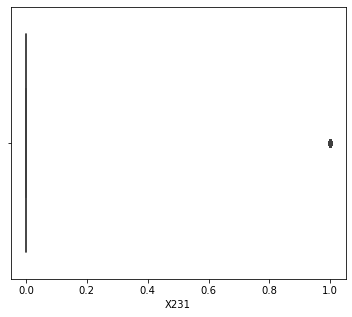

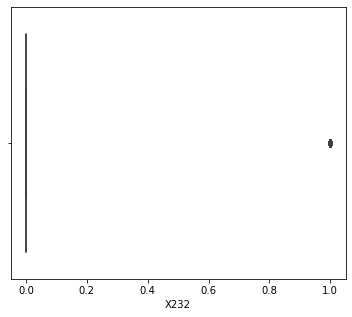

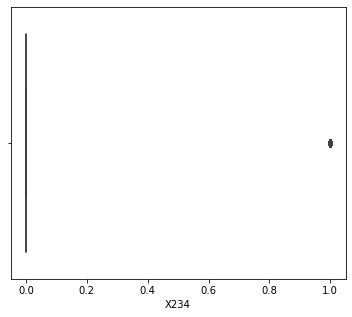

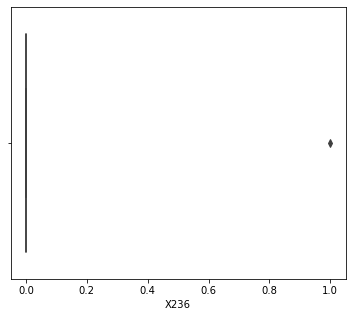

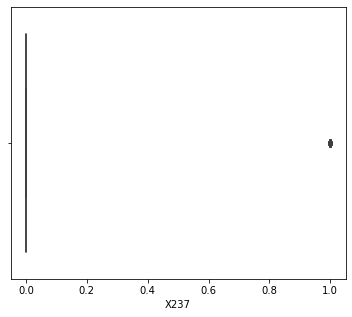

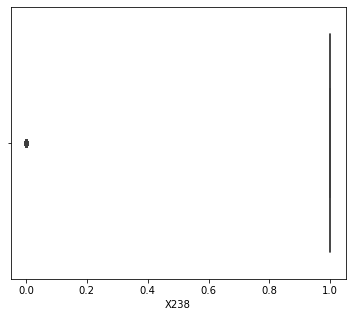

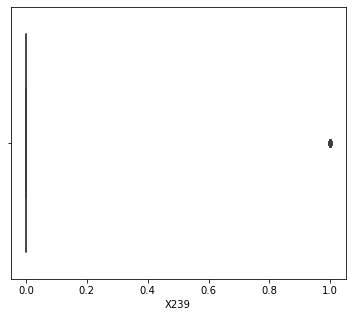

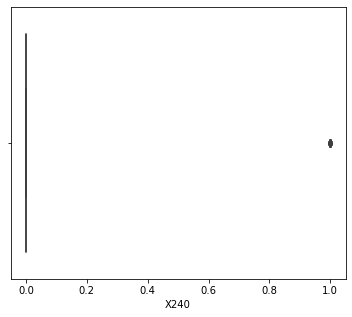

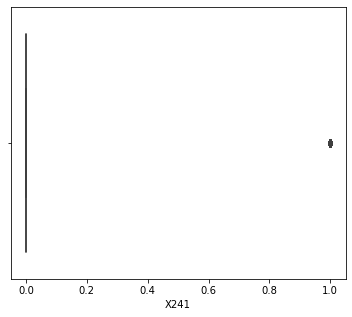

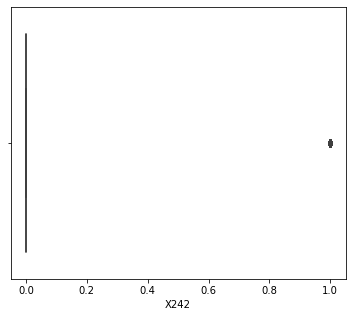

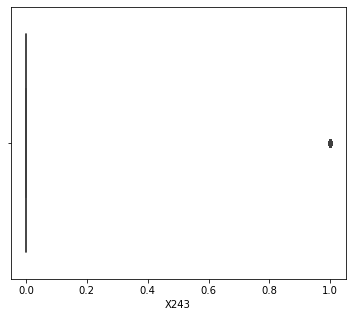

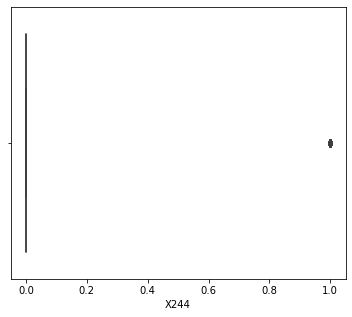

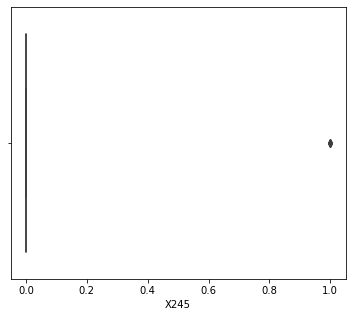

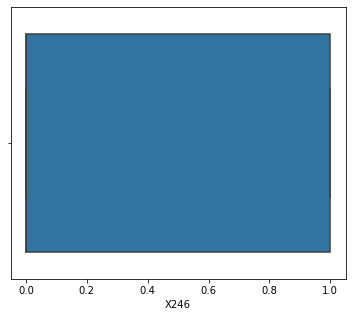

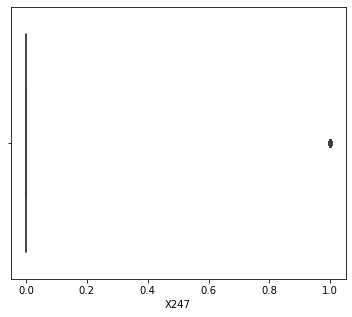

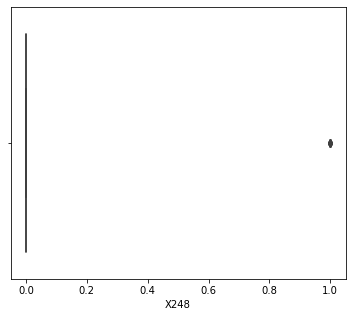

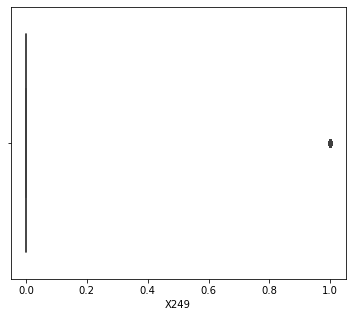

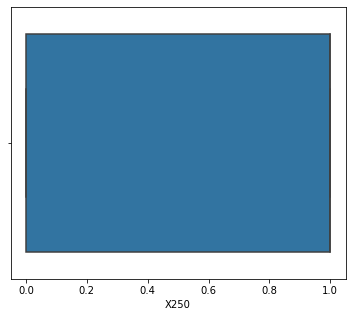

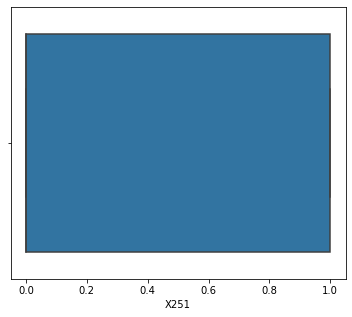

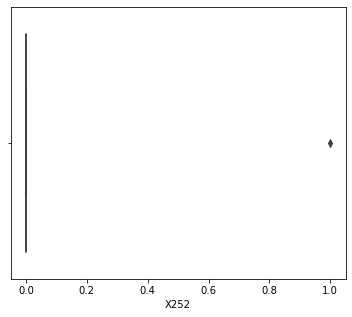

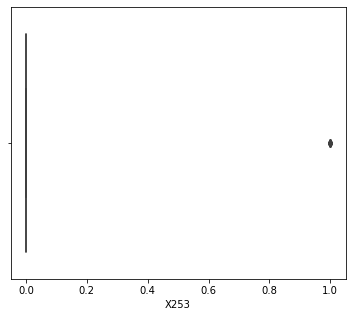

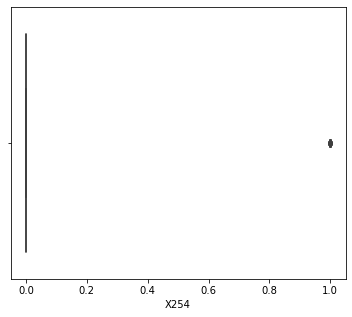

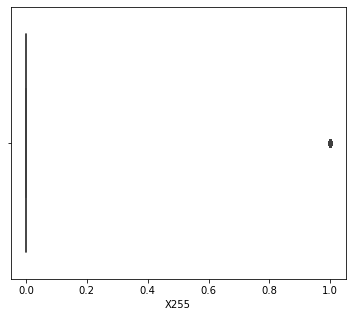

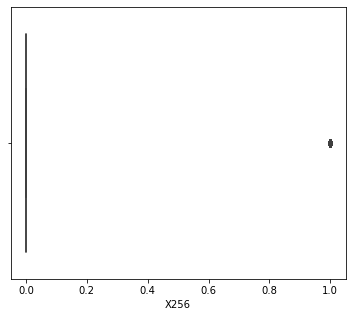

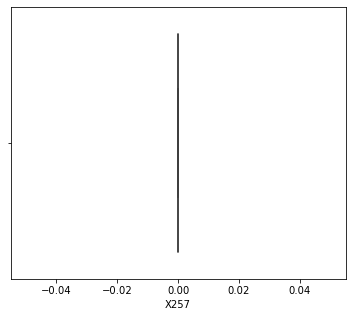

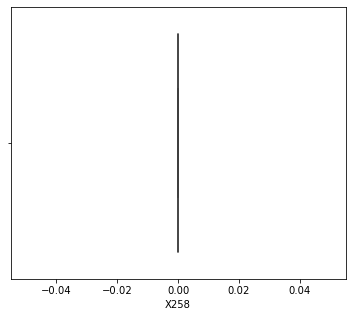

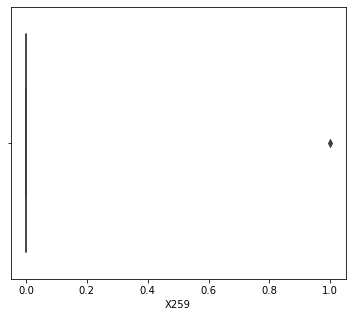

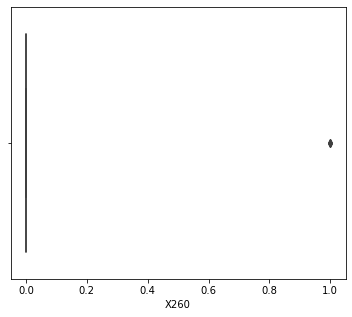

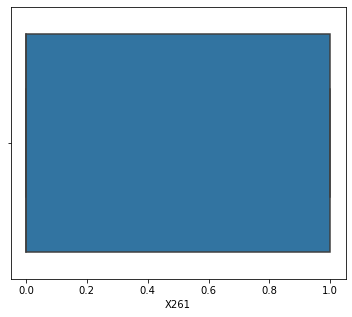

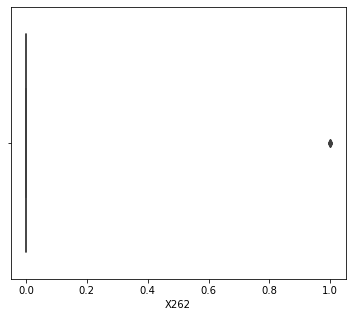

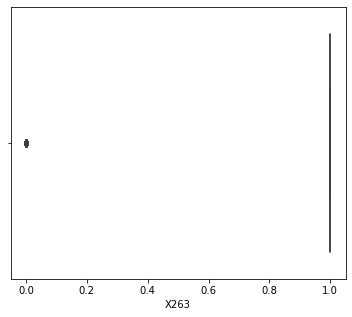

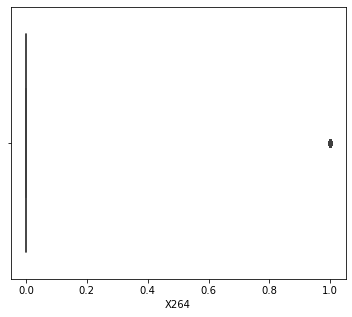

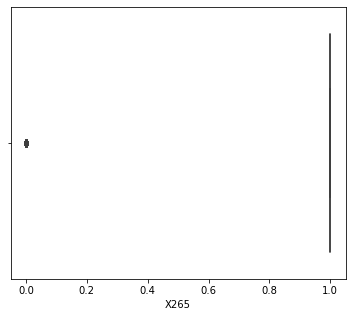

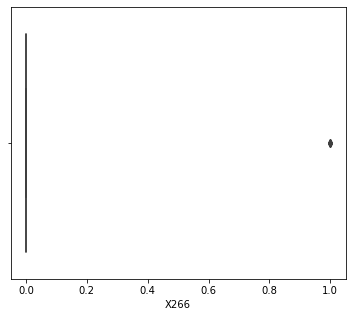

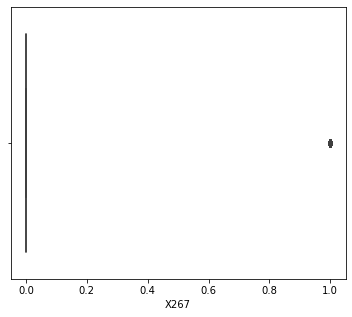

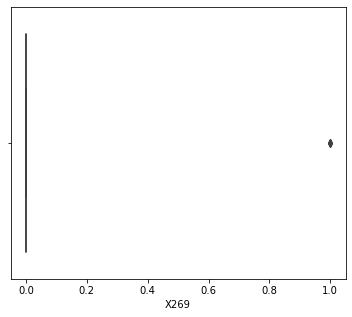

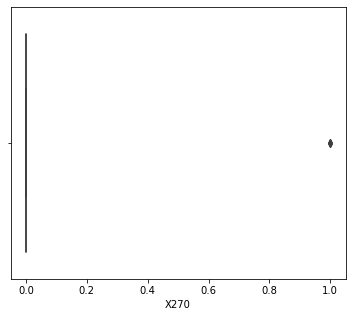

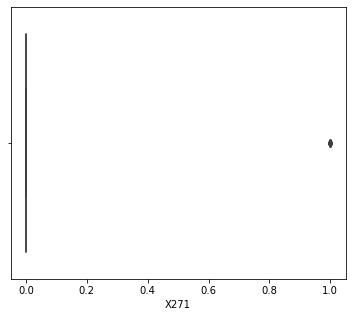

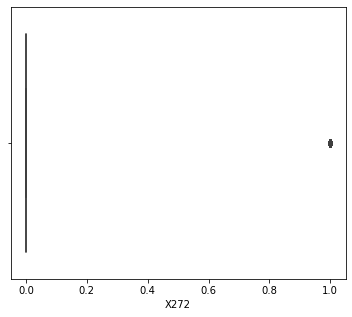

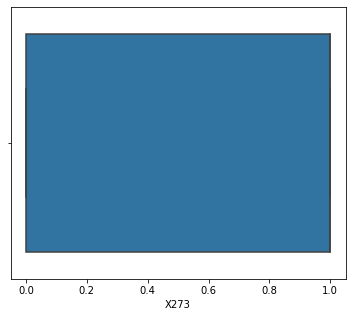

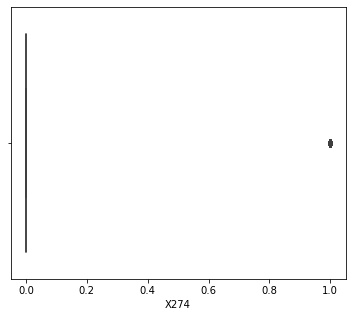

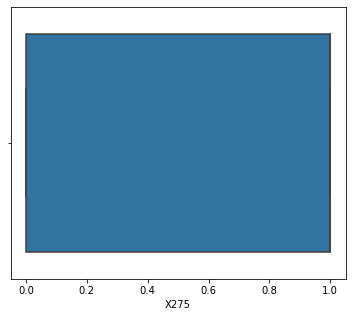

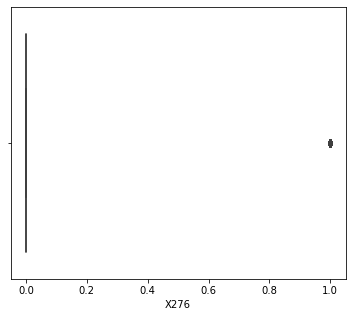

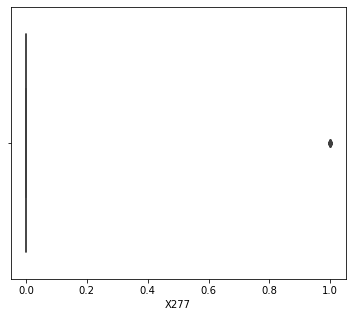

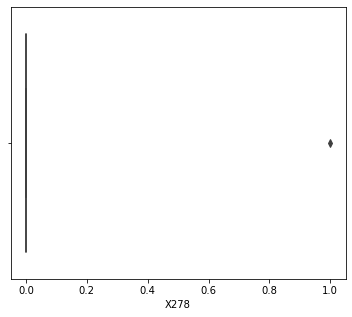

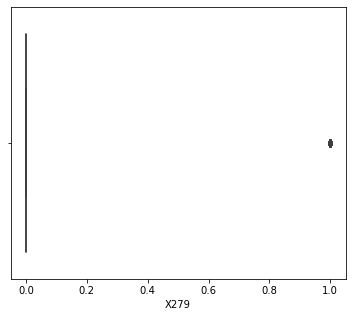

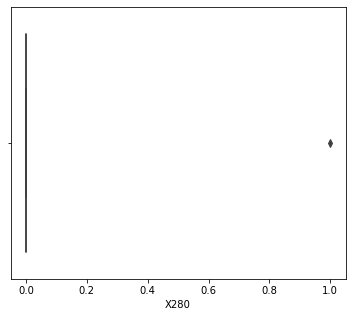

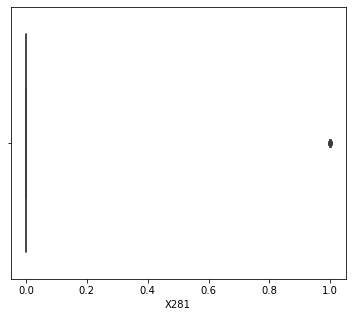

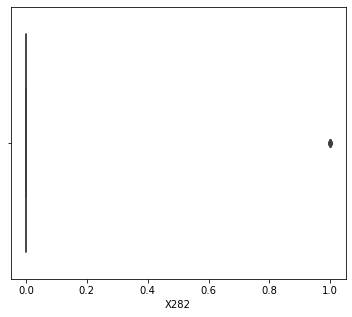

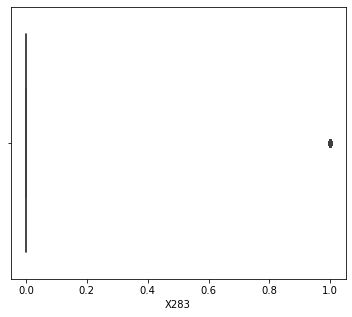

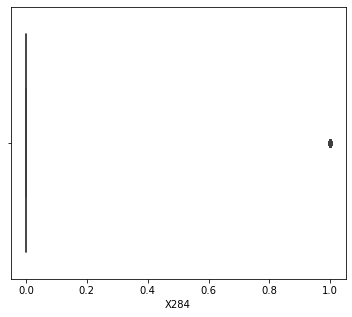

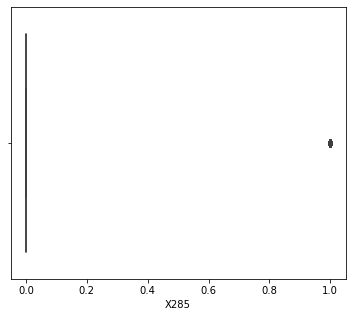

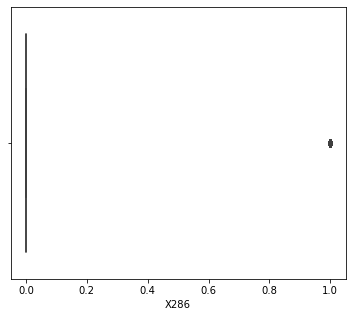

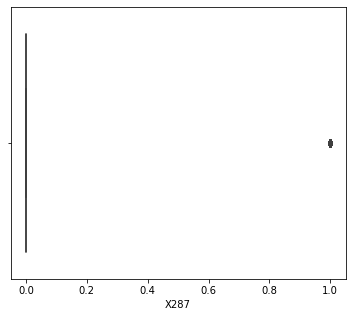

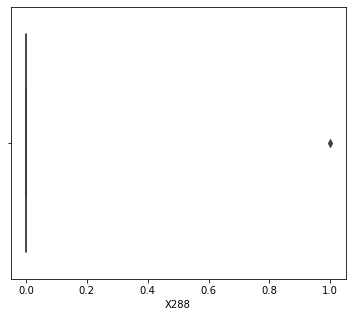

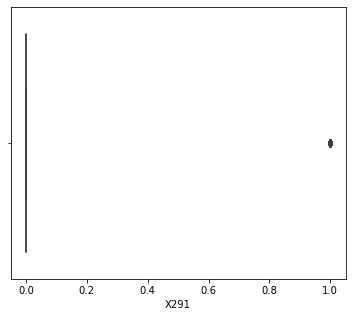

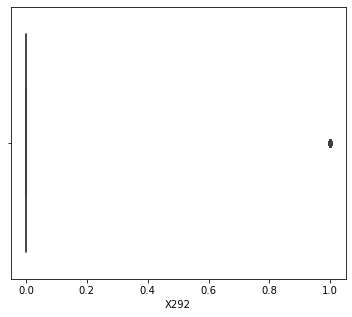

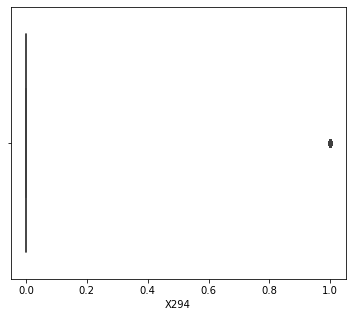

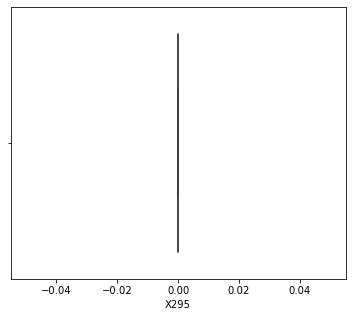

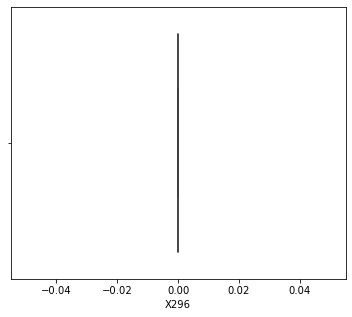

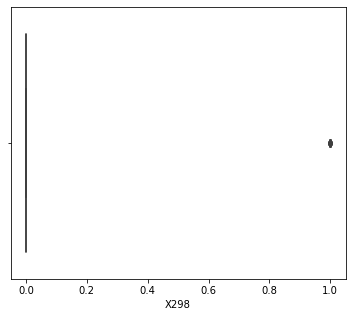

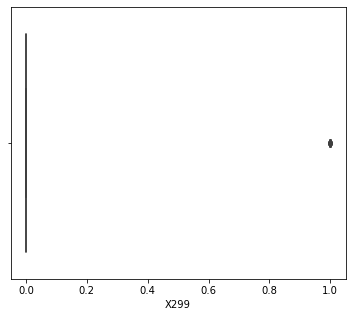

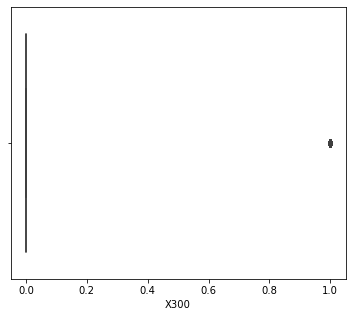

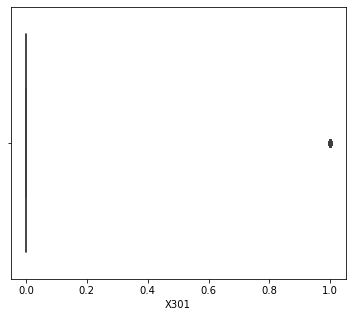

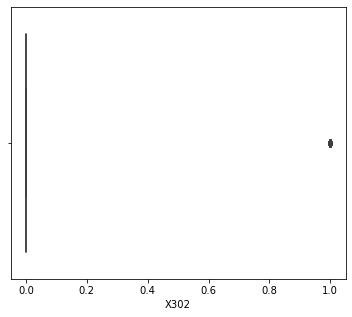

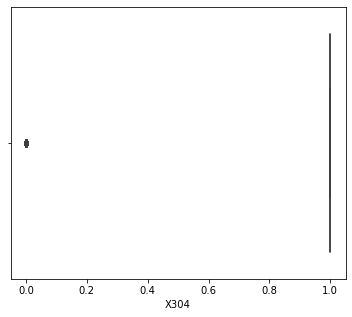

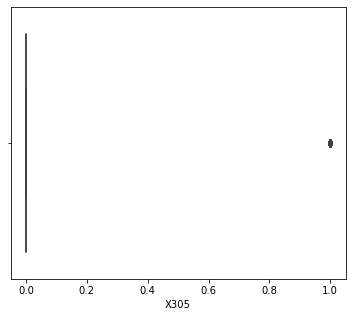

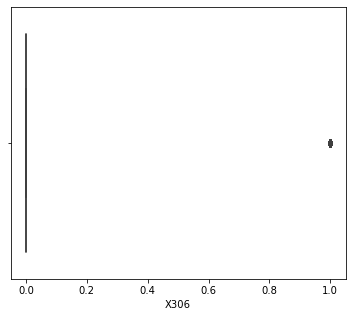

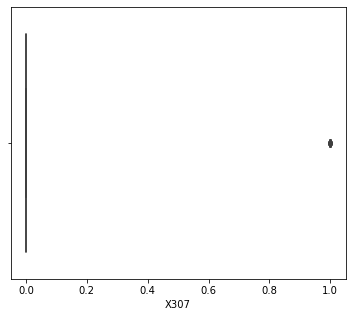

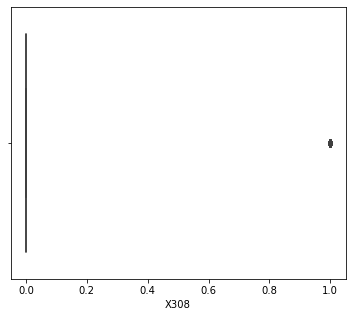

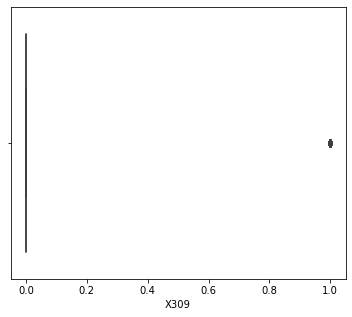

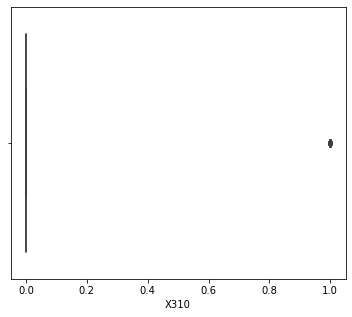

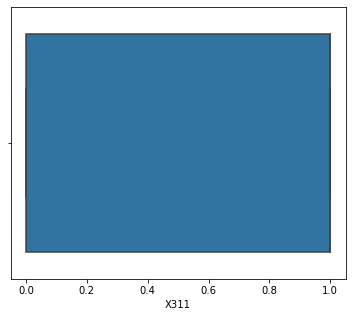

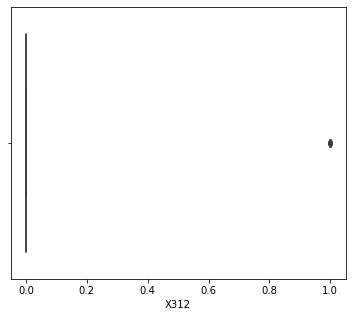

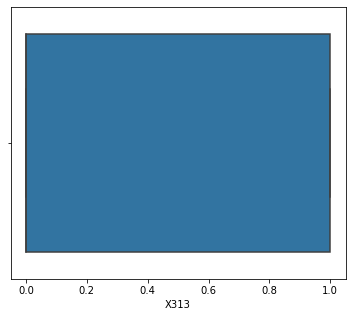

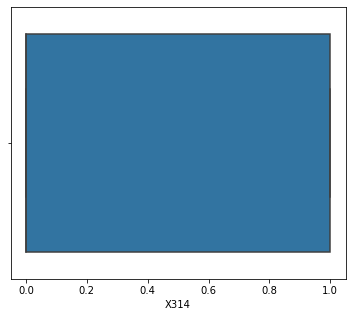

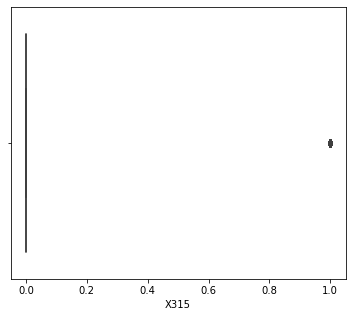

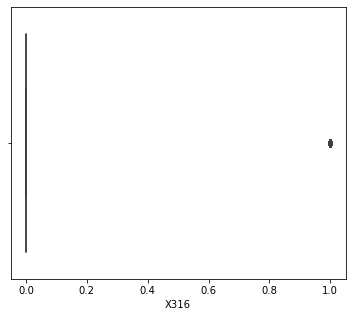

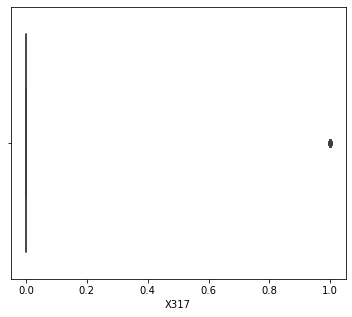

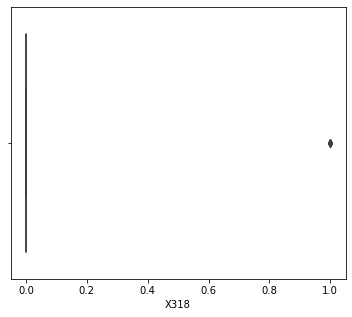

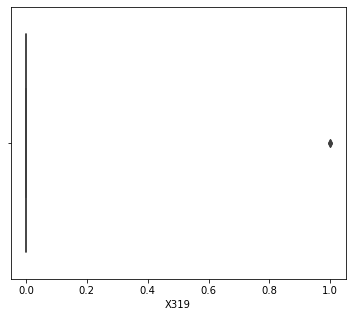

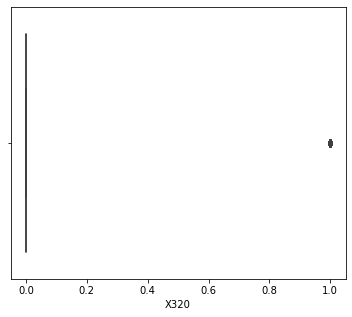

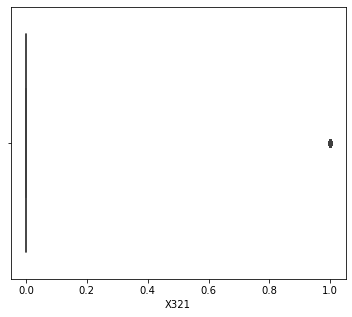

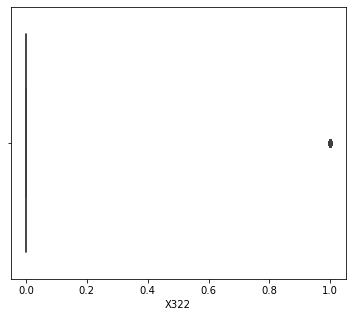

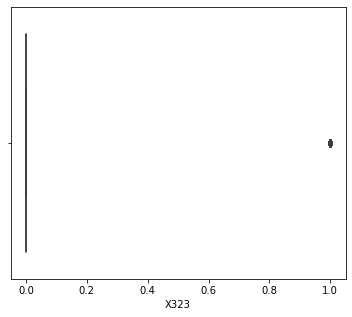

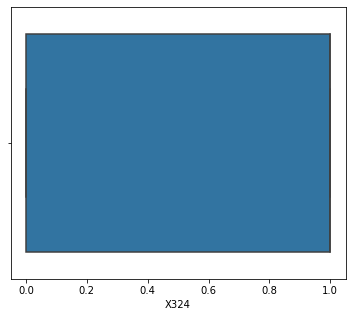

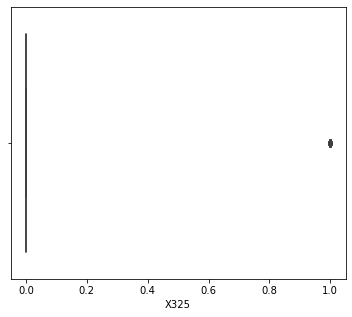

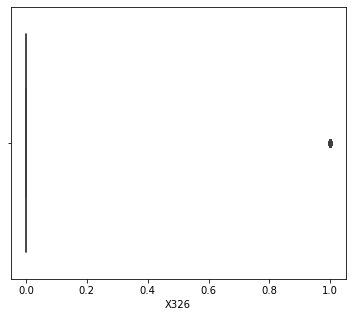

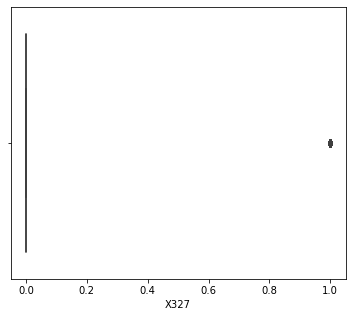

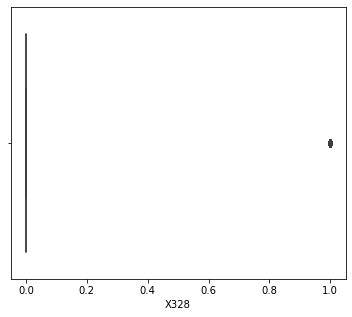

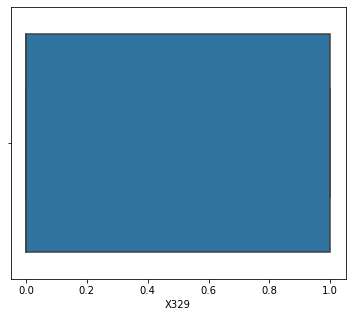

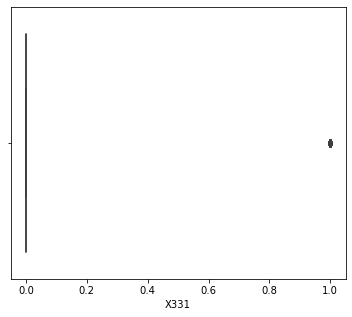

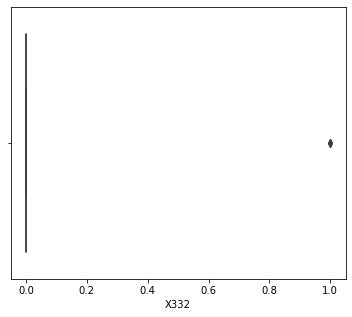

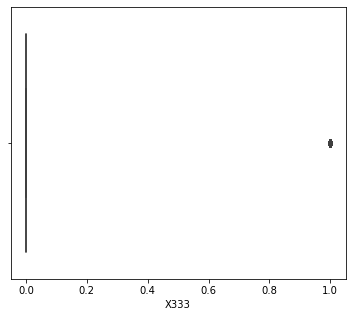

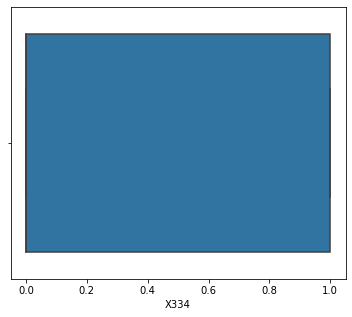

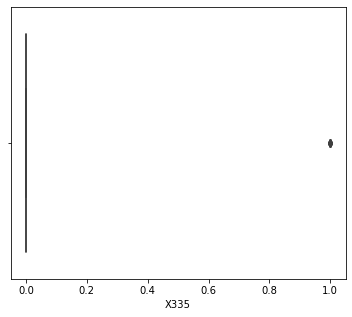

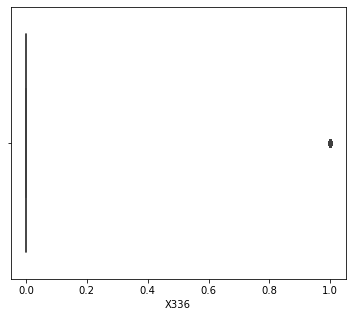

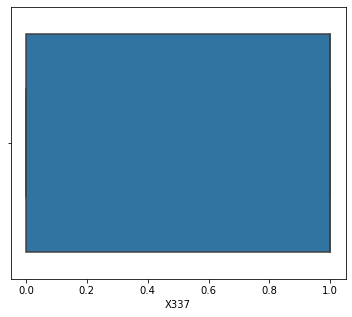

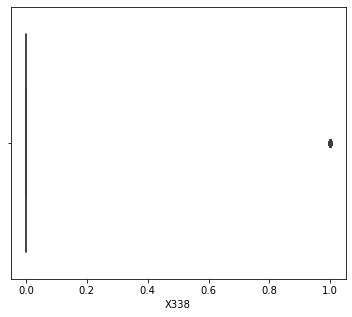

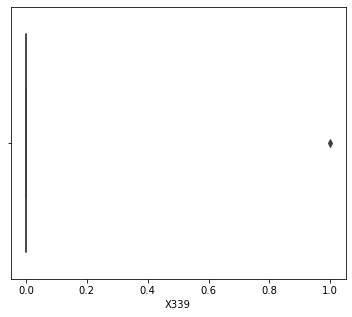

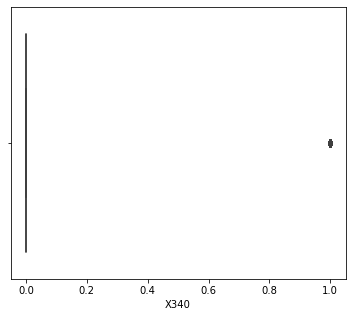

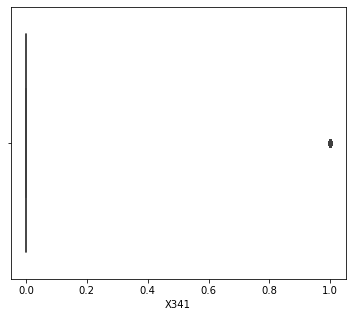

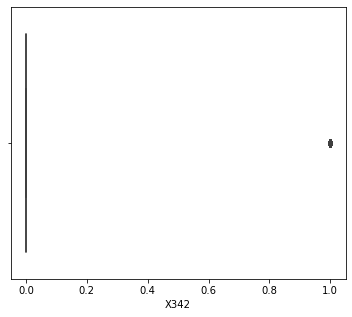

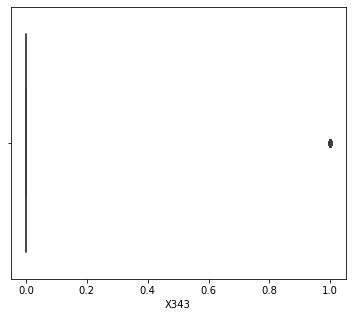

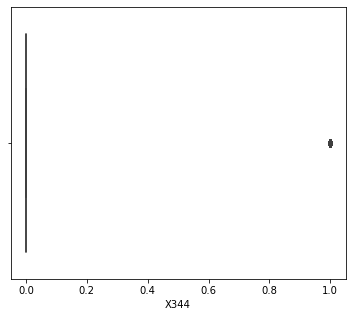

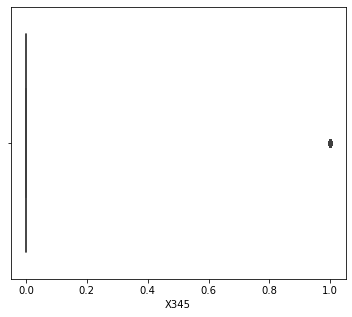

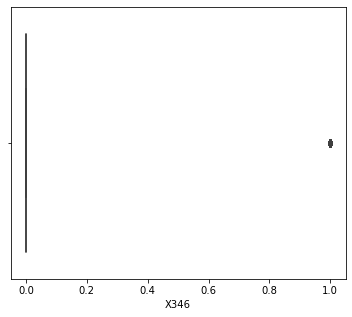

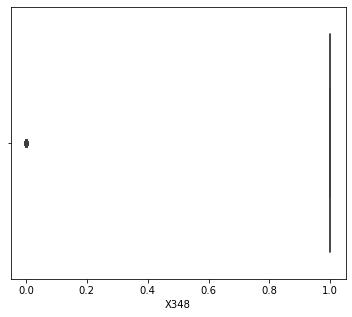

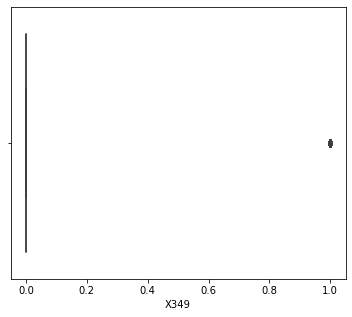

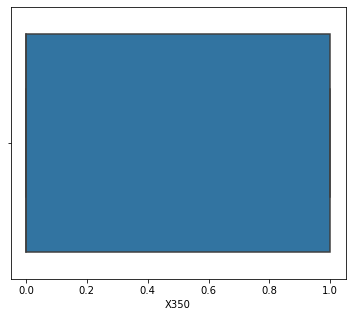

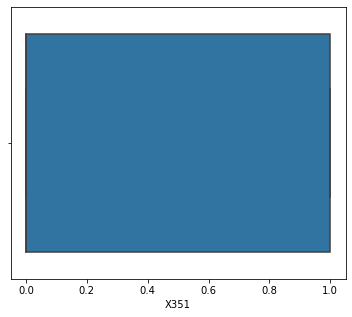

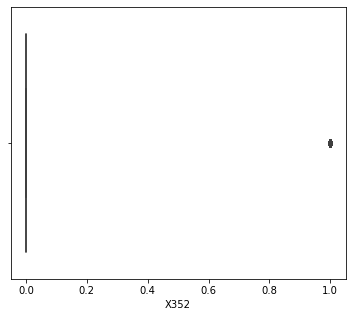

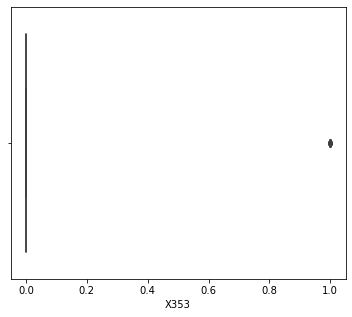

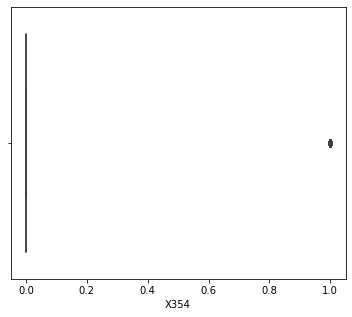

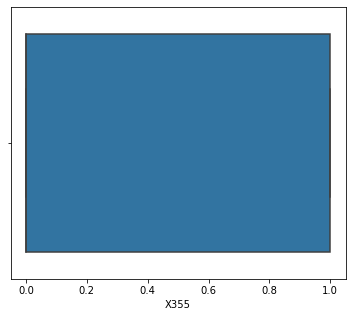

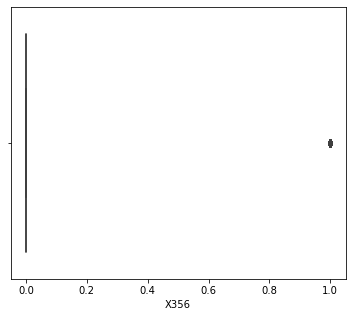

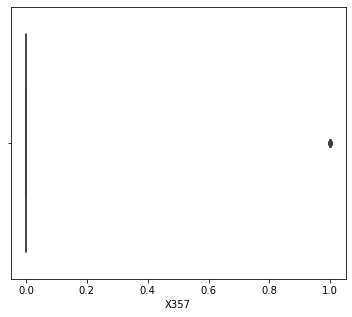

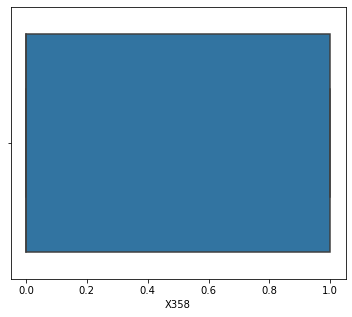

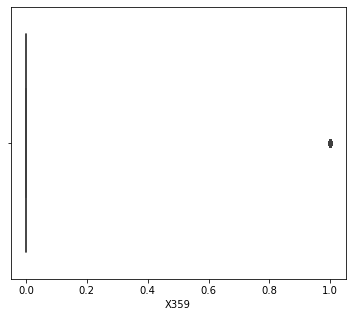

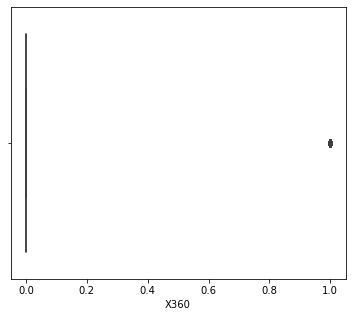

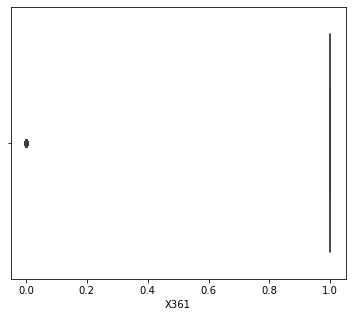

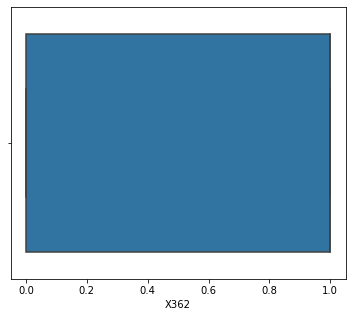

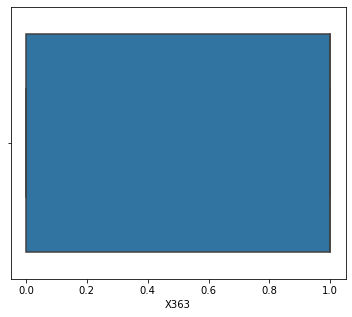

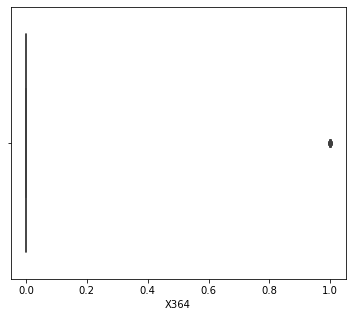

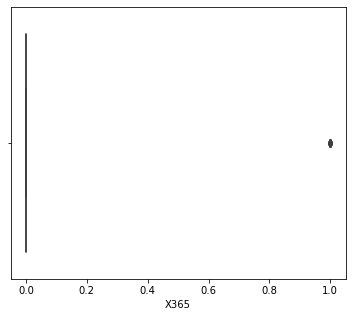

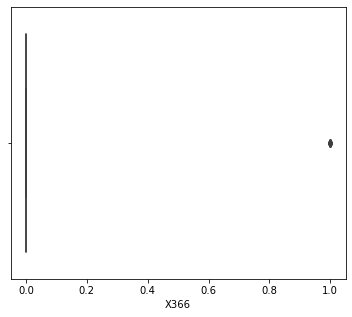

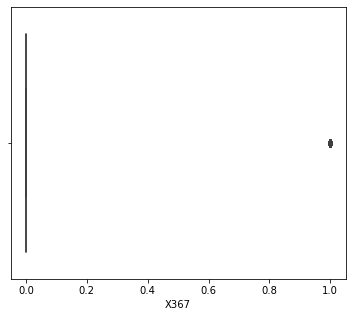

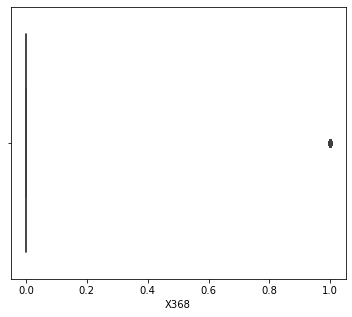

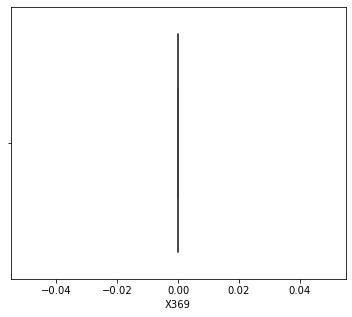

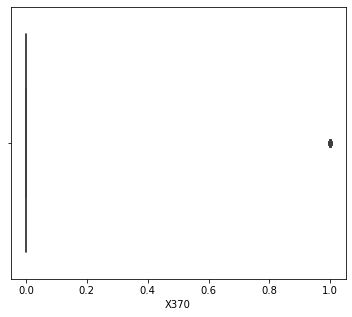

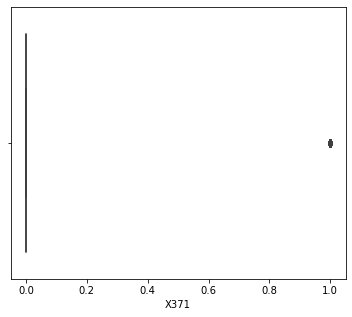

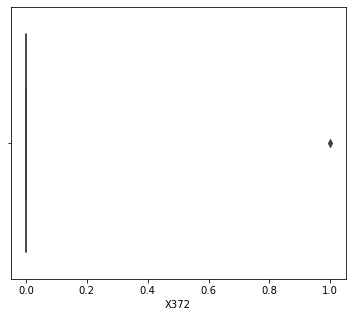

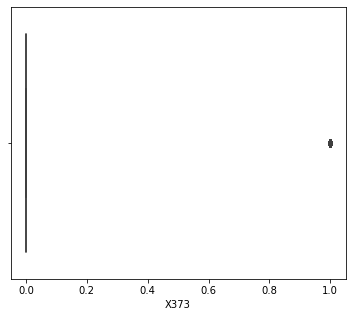

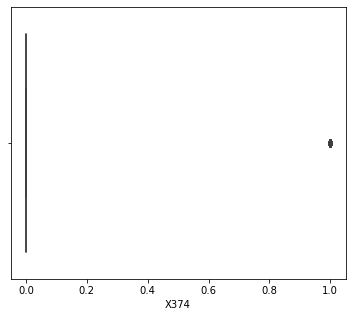

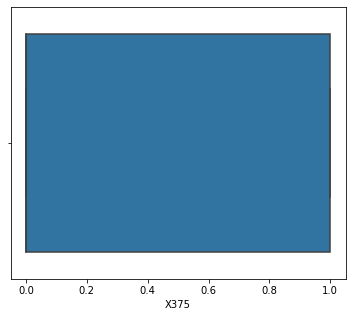

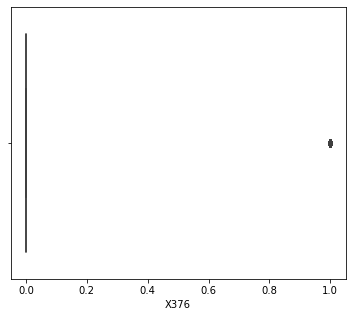

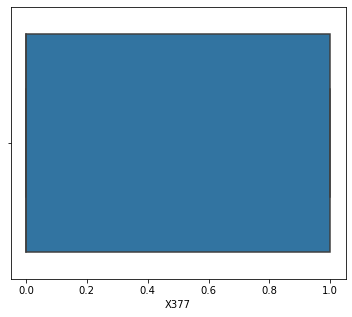

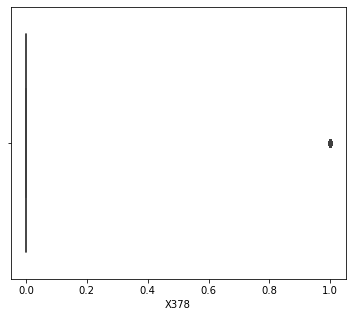

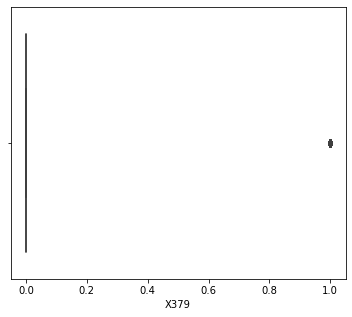

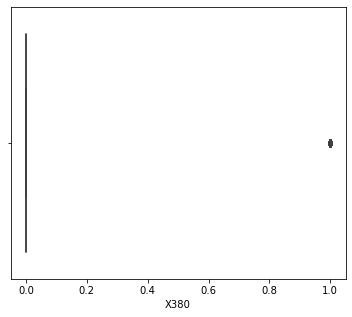

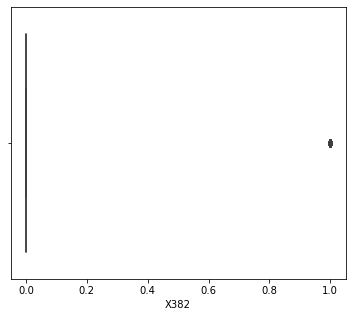

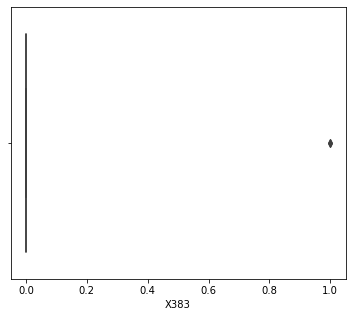

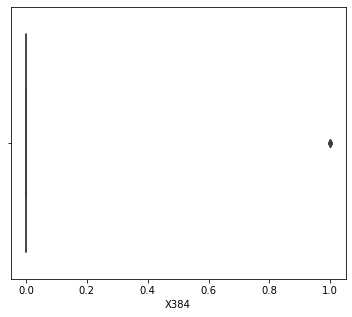

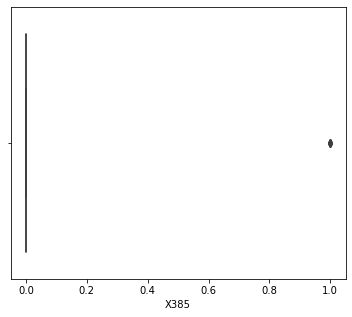

In [73]:
# test data
for col in benz_test1.drop(['ID'],axis = 1).columns:
    if benz_test1[col].dtype != object:
        plt.figure(figsize=(6,5))
        sns.boxplot(x = benz_test1[col])
        plt.show()

### No Outliers found in train and test data

# Task 3: Apply label encoder.


In [74]:
# Applying label encoder to train data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

benz_train2 = benz_train1.copy()

for col in benz_train2.columns:
    if benz_train2[col].dtype == object:
        benz_train2[col] = le.fit_transform(benz_train2[col])
    

benz_train2.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,0,32,23,17,0,3,24,9,14,0,...,0,1,0,0,0,0,0,0,0,130.81
1,6,32,21,19,4,3,28,11,14,0,...,0,0,0,0,0,0,0,0,0,88.53
2,7,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,1,0,0,0,76.26
3,9,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,80.62
4,13,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,78.02


In [75]:
# Applying label encoder to test data

benz_test2 = benz_test1.copy()

for col in benz_test2.columns:
    if benz_test2[col].dtype == object:
        benz_test2[col] = le.fit_transform(benz_test2[col])
    

benz_test2.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


# Task 4:Perform dimensionality reduction.



In [76]:
from sklearn.model_selection import train_test_split
# Train data
X_features = benz_train2.iloc[:,1:365]
y = benz_train2['y']
print(X_features.columns,'\n\n',X_features.shape,'\n') 
print(y.shape)
print(y.head())

# Test data fetures
X_test_features = benz_test2.iloc[:,1:365]
print(X_test_features.columns,'\n\n', X_test_features.shape,'\n')



Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X12',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=364) 

 (4209, 364) 

(4209,)
0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X12',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=364) 

 (4209, 364) 



In [77]:
# before dimensionality reduction all features to be scaled by standard scalar or minmaxscalar

from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()
mc = MinMaxScaler()

x_train_sc = sc.fit_transform(X_features)
x_test_sc = sc.transform(X_test_features)

x_train_mc = mc.fit_transform(X_features)
x_test_mc = mc.transform(X_test_features)

In [78]:
x_train_sc.shape, x_train_mc.shape

((4209, 364), (4209, 364))

In [79]:
# x_train.iloc[0]
X_features.iloc[0]

X0      32
X1      23
X2      17
X3       0
X4       3
        ..
X380     0
X382     0
X383     0
X384     0
X385     0
Name: 0, Length: 364, dtype: int64

In [80]:
x_train_sc[0]


array([ 1.63012094e-01,  1.39348787e+00, -2.81215524e-02, -1.67827006e+00,
        2.89381588e-02,  1.29211729e+00,  7.51787246e-01,  3.39444830e-01,
       -1.16121610e-01, -2.84905832e-01,  4.03112887e+00, -8.65245498e-01,
       -2.18036269e-02, -5.11888208e-02, -8.75271428e-02,  1.12492424e+01,
       -3.32496751e-01, -4.08135124e-01,  1.95355154e+01, -3.08606700e-01,
       -1.45279934e-01, -4.36383833e-02, -7.08119104e-02, -1.46644096e+00,
       -1.83424101e-01, -2.11979838e-01, -6.73394847e-02,  1.81760309e+00,
       -1.06266870e-01, -1.54156604e-02, -7.41249317e-02,  1.81760309e+00,
       -6.73394847e-02,  1.81760309e+00, -1.85489860e-01, -1.54156604e-02,
       -2.67070545e-02, -1.07404323e-01, -1.54156604e-02, -2.79014178e-01,
       -1.07404323e-01, -5.82379946e-01,  8.21111651e-01, -1.14001710e-01,
       -1.51139857e-01, -3.72970376e-01, -5.21890805e-01, -1.61070289e+00,
       -2.10137520e-01, -8.32934514e-02, -2.13200716e-01, -7.24869556e-02,
       -1.46975990e-01, -

In [81]:
x_test_sc[0]

array([-6.37762116e-01,  1.39348787e+00,  1.53170902e+00,  1.19577937e+00,
        2.89381588e-02,  1.53454587e+00, -2.33396990e+00,  1.47628453e+00,
       -1.16121610e-01, -2.84905832e-01, -2.48069469e-01, -8.65245498e-01,
       -2.18036269e-02, -5.11888208e-02, -8.75271428e-02, -8.88948753e-02,
       -3.32496751e-01, -4.08135124e-01, -5.11888208e-02, -3.08606700e-01,
       -1.45279934e-01, -4.36383833e-02, -7.08119104e-02,  6.81923122e-01,
        5.45184627e+00,  4.71742977e+00, -6.73394847e-02,  1.81760309e+00,
       -1.06266870e-01, -1.54156604e-02, -7.41249317e-02,  1.81760309e+00,
       -6.73394847e-02,  1.81760309e+00, -1.85489860e-01, -1.54156604e-02,
       -2.67070545e-02, -1.07404323e-01, -1.54156604e-02,  3.58404726e+00,
       -1.07404323e-01, -5.82379946e-01,  8.21111651e-01, -1.14001710e-01,
       -1.51139857e-01, -3.72970376e-01, -5.21890805e-01, -1.61070289e+00,
       -2.10137520e-01, -8.32934514e-02,  4.69041576e+00, -7.24869556e-02,
       -1.46975990e-01, -

In [82]:
x_train_mc[0]

array([0.69565217, 0.88461538, 0.39534884, 0.        , 1.        ,
       0.85714286, 0.81818182, 0.58333333, 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [83]:
x_test_mc[0]

array([0.45652174, 0.88461538, 0.79069767, 0.83333333, 1.        ,
       0.92857143, 0.        , 0.91666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.     

In [84]:
y_array = np.array(y)
y_array[:5]

array([130.81,  88.53,  76.26,  80.62,  78.02])

In [85]:
# applying PCA on train & test data

from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)


x_train_data = pca.fit_transform(x_train_mc)
x_test_data = pca.transform(x_test_mc)

In [86]:
# x_train_sc.shape,x_train1.shape,x_test1.shape
x_train_mc.shape,x_train_data.shape,x_test_mc.shape,x_test_data.shape

((4209, 364), (4209, 76), (4209, 364), (4209, 76))

In [87]:
# Explained variance ratio

explained_variance = pca.explained_variance_ratio_

print('Principle components:\n{} \nExplained variance: {}'.format(explained_variance*100,np.sum(explained_variance)*100))


Principle components:
[12.9716091   8.75219752  8.51861261  6.74793614  5.63760155  4.69589144
  3.76348056  3.24043891  2.77885014  2.47494414  2.30933465  1.94990002
  1.69562117  1.62851541  1.52257834  1.4645078   1.37548102  1.21162584
  1.03036452  1.01205056  0.95958318  0.88867393  0.87630241  0.83451186
  0.79097481  0.75524289  0.72126975  0.64769337  0.63837194  0.57495019
  0.52778654  0.50633068  0.47525939  0.46055142  0.43706612  0.4230794
  0.42028415  0.40312875  0.40092094  0.38454001  0.3594321   0.34371921
  0.34256426  0.33564073  0.33054012  0.31425536  0.30990729  0.29770643
  0.28915815  0.28195996  0.27035805  0.26011866  0.25791552  0.24418144
  0.23685938  0.2340411   0.22657988  0.21304958  0.20916047  0.20034343
  0.1979064   0.1943113   0.18377199  0.17841214  0.17256994  0.17034425
  0.16534601  0.16038396  0.15912118  0.15227208  0.1475019   0.14207104
  0.13886952  0.13781676  0.13410648  0.13034487] 
Explained variance: 95.03070409802703


In [88]:
# x_train_data[0]

# Task 5: Predict your test_df values using XGBoost.

In [89]:
from sklearn import model_selection
from xgboost import XGBRegressor


In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [91]:

def evaluation_metrics(y_test, y_pred):
    '''y_test= testing data output, else train data output
    y_pred = predicted value'''
    print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
    print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
    print('Root Mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

In [92]:
xgb_r =XGBRegressor(objective='reg:linear',n_estimators=10, random_state = 7)
xgb_r.fit(x_train_data,y_array)
pred = xgb_r.predict(x_test_data)
print('Predictions:\n',pred[:5], '\n') 


[13:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
Predictions:
 [ 76.87282  91.94125  72.88333  75.37744 107.396  ] 



In [93]:
evaluation_metrics(y_array,y_pred=pred)

Mean_absolute_error:  11.989420831398887
Mean_squared_error:  245.67491626628612
Root Mean_squared_error:  15.67402042445671


In [94]:
#  predicting x_test df with other Reggresser
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [98]:
# def model_regression(x,xt,y):
#     model.fit(x, y)
#     predictions = model.predict(xt)
#     print('Predictions:\n',predictions[:5], '\n') 

In [100]:
model.fit(x_train_data, y_array)
predictions = model.predict(x_test_data)
print('Predictions:\n',predictions[:5], '\n') 
evaluation_metrics(y_array,predictions)

Predictions:
 [ 79.9247958   95.5089493   80.27036274  79.02143104 109.83010662] 

Mean_absolute_error:  12.347946551222854
Mean_squared_error:  250.05750588419446
Root Mean_squared_error:  15.813206692008881


In [102]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(x_train_data, y_array)
predictions = model.predict(x_test_data)
print('Predictions:\n',predictions[:5], '\n')

evaluation_metrics(y_array,predictions)

Predictions:
 [ 77.99   90.078  76.714  77.37  116.818] 

Mean_absolute_error:  12.435369921596578
Mean_squared_error:  254.5905302827275
Root Mean_squared_error:  15.955893277492411


In [103]:
# svr
from sklearn.svm import SVR

model = SVR()
model.fit(x_train_data, y_array)
predictions = model.predict(x_test_data)
print('Predictions:\n',predictions[:5], '\n') 

evaluation_metrics(y_array,predictions)

Predictions:
 [ 79.05404618  91.7175088   80.58173861  77.85484302 109.21082027] 

Mean_absolute_error:  11.897961012619573
Mean_squared_error:  237.24143602499285
Root Mean_squared_error:  15.402643799847896


In [104]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train_data, y_array)
predictions = model.predict(x_test_data)
print('Predictions:\n',predictions[:5], '\n') 

evaluation_metrics(y_array,predictions)

Predictions:
 [ 87.31  90.04  76.64  77.77 114.47] 

Mean_absolute_error:  13.938797176873441
Mean_squared_error:  333.1439253647373
Root Mean_squared_error:  18.25223069558177


In [105]:
# Random forest classifier
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train_data, y_array)
predictions = model.predict(x_test_data)
print('Predictions:\n',predictions[:5], '\n') 

evaluation_metrics(y_array,predictions)

Predictions:
 [ 80.4536      92.8677      77.66739667  78.72227333 117.01996667] 

Mean_absolute_error:  12.380736455959466
Mean_squared_error:  252.61557759784594
Root Mean_squared_error:  15.893884912061177
